In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from tqdm import tqdm
import umap
import seaborn as sns
import sklearn
import glob
from typing import List, Dict, Tuple
from copy import deepcopy
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import FeatureAgglomeration, KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFwe
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier, kneighbors_graph
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import adjusted_rand_score, silhouette_score, mean_absolute_error, explained_variance_score, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import f1_score

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from yellowbrick.cluster import KElbowVisualizer
from collections import OrderedDict


/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path1 = "/Users/SamihaMahin/Desktop/brack_lab/ISR_cellpainting/"
path2 = "/Objects_Population - Nuclei.csv"

cell_painting_data_path_3_22 = path1 + "cell_painting_3_22_24_MuSCs" + path2
cell_painting_data_path_3_24 = path1 + "cell_painting_3_24_24_MuSCs" + path2
cell_painting_data_path_9_11 = path1 + "cell_painting_9_11_24_MuSCs" + path2
cell_painting_data_path_9_12 = path1 + "cell_painting_9_12_24_MuSCs" + path2
cell_painting_data_path_9_18 = path1 + "cell_painting_9_18_24_MuSCs" + path2
cell_painting_data_path_9_19 = path1 + "cell_painting_9_19_24_MuSCs" + path2

# TODO: ADD FILE PATH FOR NEW DATA FILES

data_df_3_22_raw = pd.read_csv(cell_painting_data_path_3_22)
data_df_3_24_raw = pd.read_csv(cell_painting_data_path_3_24)
data_df_9_11_raw = pd.read_csv(cell_painting_data_path_9_11)
data_df_9_12_raw = pd.read_csv(cell_painting_data_path_9_12)
data_df_9_18_raw = pd.read_csv(cell_painting_data_path_9_18)
data_df_9_19_raw = pd.read_csv(cell_painting_data_path_9_19)

# TODO: READ NEW DATA



In [3]:
age_color_map = {
    "Adult": 'maroon',
    "Aged": 'darkgray'
}

sample_map = {
    "Adult": 'S1',
    "Aged": 'S2'   
}

batch_norm_map = {
    "S1": 'Adult',
    "S2": 'Aged'
}

# age_experiment_map = {
#     "All groups": ['Adult', 'Aged']
#     #"Adult vs Aged": ['Ad', 'Ag'],
#     #"Aged vs Aged+Sal": ['Ag', 'AgS']
# }

## Data cleanup and preprocessing

In [4]:
relevant_columns = [
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum',
    'Nuclei - Cell Area [µm²]',
    'Nuclei - Cell Roundness',
    'Nuclei - Cell Width [µm]',
    'Nuclei - Cell Length [µm]',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum',
]
print(len(relevant_columns))

73


In [39]:
#TODO: if we want to add more features, add them/uncomment to the feature_mapping

feature_mapping = {
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean': 'DAPI nucleus intensity mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum': 'DAPI nucleus intensity sum',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean': 'DAPI cyto intensity mean',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum': 'DAPI cyto intensity sum',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean': 'DAPI cell intensity mean',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum': 'DAPI cell intensity sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px': 'Actin texture spot',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px': 'Actin texture hole',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px': 'Actin texture edge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px': 'Actin texture ridge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px': 'Actin texture valley',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px': 'Actin texture saddle',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px': 'Actin texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px': 'Mito texture spot',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px': 'Mito texture hole',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px': 'Mito texture edge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px': 'Mito texture ridge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px': 'Mito texture valley',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px': 'Mito texture saddle',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px': 'Mito texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px': 'Mito texture dark',
    # 'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin nucleus intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cyto intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cyto intensity sum',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cell intensity mean',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cell intensity sum',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean': 'Mito nucleus intensity mean',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum': 'Mito nucleus intensity sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean': 'Mito cyto intensity mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum': 'Mito cyto intensity sum',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean': 'Mito cell intensity mean',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum': 'Mito cell intensity sum',
    'Nuclei - Cell Area [µm²]': 'Cell area',
    'Nuclei - Cell Roundness': 'Cell roundness',
    'Nuclei - Cell Width [µm]': 'Cell width',
    'Nuclei - Cell Length [µm]': 'Cell length',
   
}

relevant_features = [feature_mapping[col] for col in relevant_columns if col in feature_mapping]



In [6]:
def process_data(data_df_raw, well_group, curr_exp, batch_normalize=True):
    data_df_clean = data_df_raw.loc[:, [i for i in relevant_columns if i in feature_mapping]]
    data_df_clean.columns = [feature_mapping[col] for col in data_df_clean.columns]
    data_df_clean.insert(0, 'Exp', [curr_exp]*len(data_df_clean))
    data_df_clean.insert(1, 'Well ID', [i for i in zip(data_df_raw['Row'], data_df_raw['Column'])])
    data_df_clean.insert(2, 'Field', data_df_raw['Field'])
    data_df_clean.insert(3, 'Age', data_df_raw['Group'])

    unique_wells = np.unique(data_df_clean['Well ID'])
    max_cols = {}
    dict_well = {}
    for well in unique_wells:
        group = well_group[well[0]]
        dict_well[well] = group  
        if group in max_cols:
            max_cols[group] = max(max_cols[group], well[1])
        else:
            max_cols[group] = well[1]
    for well in dict_well:
        suffix = 'S1' if well[1] < max_cols[dict_well[well]] else 'S2'
        dict_well[well] = f'{curr_exp} {dict_well[well]} {suffix}'
    print(dict_well)

    data_df_clean.insert(4, 'Sample', data_df_clean['Well ID'].map(dict_well))
    
    data_df_clean.insert(5, 'Type', [curr_exp + " " + sample_map[i] for i in data_df_raw['Group']])
    data_df_clean = data_df_clean.replace([np.inf, -np.inf], np.nan)
    data_df_clean = data_df_clean.dropna(axis=0, how='any', subset=None, inplace=False)
    print(f"Dropped {len(data_df_raw)-len(data_df_clean)} rows")

    if batch_normalize:
        data_df_normalized = pd.DataFrame()
        for sample in np.unique(data_df_clean.Type):
            normalizer = RobustScaler()
            normalized_group = data_df_clean.loc[data_df_clean.Type==sample]
            train_set = normalized_group.loc[normalized_group.Age==batch_norm_map[sample.split()[-1]]]
            normalizer.fit(train_set.loc[:, relevant_features])
            normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transform(normalizer.transform)
            data_df_normalized = pd.concat([data_df_normalized, normalized_group])
        return data_df_normalized

    return data_df_clean


In [7]:
data_df_9_18_raw = data_df_9_18_raw.drop(data_df_9_18_raw[data_df_9_18_raw['Group'] == 'Aged ISRIB'].index)
data_df_9_19_raw = data_df_9_19_raw.drop(data_df_9_19_raw[data_df_9_19_raw['Group'] == 'Aged ISRIB'].index)

In [8]:
data_df_3_22_raw = data_df_3_22_raw.drop(data_df_3_22_raw[data_df_3_22_raw['Group'] == 'Aged Sal'].index)
data_df_3_24_raw = data_df_3_24_raw.drop(data_df_3_24_raw[data_df_3_24_raw['Group'] == 'Aged Sal'].index)
data_df_9_11_raw = data_df_9_11_raw.drop(data_df_9_11_raw[data_df_9_11_raw['Group'] == 'Aged Sal'].index)
data_df_9_12_raw = data_df_9_12_raw.drop(data_df_9_12_raw[data_df_9_12_raw['Group'] == 'Aged Sal'].index)
data_df_9_18_raw = data_df_9_18_raw.drop(data_df_9_18_raw[data_df_9_18_raw['Group'] == 'Aged Sal'].index)
data_df_9_19_raw = data_df_9_19_raw.drop(data_df_9_19_raw[data_df_9_19_raw['Group'] == 'Aged Sal'].index)

In [9]:
#TODO: for any new experiments do process_data and add to data_df_combined
data_df_3_22 = process_data(data_df_raw=data_df_3_22_raw, well_group = {2:"Adult", 3:"Aged"}, curr_exp="3_22", batch_normalize=True)
data_df_3_24 = process_data(data_df_raw=data_df_3_24_raw, well_group = {2:"Adult", 3:"Aged"}, curr_exp="3_24", batch_normalize=True)
data_df_9_11 = process_data(data_df_raw=data_df_9_11_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_11", batch_normalize=True)

data_df_9_18 = process_data(data_df_raw=data_df_9_18_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_18", batch_normalize=True)
data_df_9_19 = process_data(data_df_raw=data_df_9_19_raw,  well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_19", batch_normalize=True)

data_df_combined = pd.concat([data_df_3_22, data_df_3_24, data_df_9_11,
                              data_df_9_18, data_df_9_19], ignore_index=True)

{(2, 2): '3_22 Adult S1', (2, 3): '3_22 Adult S2', (3, 2): '3_22 Aged S1', (3, 3): '3_22 Aged S2'}
Dropped 8 rows
{(2, 2): '3_24 Adult S1', (2, 3): '3_24 Adult S2', (3, 2): '3_24 Aged S1', (3, 3): '3_24 Aged S2'}
Dropped 20 rows
{(3, 3): '9_11 Adult S1', (3, 4): '9_11 Adult S2', (4, 3): '9_11 Aged S1', (4, 4): '9_11 Aged S2'}
Dropped 181 rows
{(3, 3): '9_18 Adult S1', (3, 4): '9_18 Adult S2', (4, 3): '9_18 Aged S1', (4, 4): '9_18 Aged S2'}
Dropped 191 rows
{(3, 3): '9_19 Adult S1', (3, 4): '9_19 Adult S2', (4, 3): '9_19 Aged S1', (4, 4): '9_19 Aged S2'}
Dropped 72 rows


/var/folders/77/x6qg0ssj59b1b0t1ph730np40000gn/T/ipykernel_65444/199512089.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4.60380441 -0.65452449  0.10293551 ...  0.43070912  0.59792075
  0.06078016]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transform(normalizer.transform)
/var/folders/77/x6qg0ssj59b1b0t1ph730np40000gn/T/ipykernel_65444/199512089.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 3.08508345 -0.4793585   0.79524071 ... -0.52756305  2.764206
  0.05065099]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transfor

In [10]:
data_df_combined.head()


Exp Well ID  Field    Age         Sample     Type  \
0  3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1  3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2  3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3  3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4  3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   

   DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                    -0.551728                    4.603804   
1                    -0.653592                   -0.654524   
2                    -0.800411                    0.102936   
3                    -0.065392                    0.356169   
4                     0.414287                    0.322815   

   Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0           -0.659380           -0.410470  ...            -0.253857   
1            1.644321            0.815784  ...             1.078635   
2            0.597449            0.429114  ...             0.145450   
3           -0.104486           -0.021137  ...             1.194069   
4           -0.673020           -0.564213  ...             0.077728   

   Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0          -0.253574                   1.761702                  3.085083   
1           0.986686                  -0.409930                 -0.479359   
2           0.127086                   1.168038                  0.795241   
3           0.558204                   0.450016                 -0.309129   
4           0.143658                   1.044714                 -0.038483   

   Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                  1.718117                 3.183574   1.476258   
1                 -0.674686                -0.560473  -0.245810   
2                  0.633632                 0.519892   0.243556   
3                  0.297146                -0.289947  -0.351467   
4                  0.128350                -0.287763  -0.366523   

   Cell roundness  Cell width  Cell length  
0        0.201627    2.404475     0.745939  
1       -0.585833   -0.064754    -0.283561  
2       -0.083841    0.731946     0.216657  
3       -0.181066   -1.318243    -0.007548  
4        0.246888   -1.053280    -0.112852  

[5 rows x 31 columns]

In [14]:
data_df_3_22_f = process_data(data_df_raw=data_df_3_22_raw, well_group = {2:"Adult", 3:"Aged"}, curr_exp="3_22", batch_normalize=False)
data_df_3_24_f = process_data(data_df_raw=data_df_3_24_raw, well_group = {2:"Adult", 3:"Aged"}, curr_exp="3_24", batch_normalize=False)
data_df_9_11_f = process_data(data_df_raw=data_df_9_11_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_11", batch_normalize=False)
data_df_9_12_f = process_data(data_df_raw=data_df_9_12_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_12", batch_normalize=False)
data_df_9_18_f = process_data(data_df_raw=data_df_9_18_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_18", batch_normalize=False)
data_df_9_19_f = process_data(data_df_raw=data_df_9_19_raw, well_group = {3:"Adult", 4:"Aged"}, curr_exp="9_19", batch_normalize=False)

data_df_combined_f = pd.concat([data_df_3_22_f, data_df_3_24_f, data_df_9_11_f, data_df_9_12_f,
                              data_df_9_18_f, data_df_9_19_f], ignore_index=True)

{(2, 2): '3_22 Adult S1', (2, 3): '3_22 Adult S2', (3, 2): '3_22 Aged S1', (3, 3): '3_22 Aged S2'}
Dropped 8 rows
{(2, 2): '3_24 Adult S1', (2, 3): '3_24 Adult S2', (3, 2): '3_24 Aged S1', (3, 3): '3_24 Aged S2'}
Dropped 20 rows
{(3, 3): '9_11 Adult S1', (3, 4): '9_11 Adult S2', (4, 3): '9_11 Aged S1', (4, 4): '9_11 Aged S2'}
Dropped 181 rows
{(3, 3): '9_12 Adult S1', (3, 4): '9_12 Adult S2', (4, 3): '9_12 Aged S1', (4, 4): '9_12 Aged S2'}
Dropped 628 rows
{(3, 3): '9_18 Adult S1', (3, 4): '9_18 Adult S2', (4, 3): '9_18 Aged S1', (4, 4): '9_18 Aged S2'}
Dropped 191 rows
{(3, 3): '9_19 Adult S1', (3, 4): '9_19 Adult S2', (4, 3): '9_19 Aged S1', (4, 4): '9_19 Aged S2'}
Dropped 72 rows


In [76]:
data_df_combined_f.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop(['Well ID', "Type", "Field"], axis=1).to_csv("raw_data_combined.csv")

In [22]:
well_df = data_df_combined_f.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index()
well_df = well_df[well_df['Exp'] != '3_24']
well_df

Exp Well ID    Age         Sample     Type      Field  \
0   3_22  (2, 2)  Adult  3_22 Adult S1  3_22 S1  72.204493   
1   3_22  (2, 3)  Adult  3_22 Adult S2  3_22 S1  63.231964   
2   3_22  (3, 2)   Aged   3_22 Aged S1  3_22 S2  52.374765   
3   3_22  (3, 3)   Aged   3_22 Aged S2  3_22 S2  64.880483   
8   9_11  (3, 3)  Adult  9_11 Adult S1  9_11 S1  72.386434   
9   9_11  (3, 4)  Adult  9_11 Adult S2  9_11 S1  65.458880   
10  9_11  (4, 3)   Aged   9_11 Aged S1  9_11 S2  58.564536   
11  9_11  (4, 4)   Aged   9_11 Aged S2  9_11 S2  72.926641   
12  9_12  (3, 3)  Adult  9_12 Adult S1  9_12 S1  69.441126   
13  9_12  (3, 4)  Adult  9_12 Adult S2  9_12 S1  58.039526   
14  9_12  (4, 3)   Aged   9_12 Aged S1  9_12 S2  53.386115   
15  9_12  (4, 4)   Aged   9_12 Aged S2  9_12 S2  61.953204   
16  9_18  (3, 3)  Adult  9_18 Adult S1  9_18 S1  67.700000   
17  9_18  (3, 4)  Adult  9_18 Adult S2  9_18 S1  51.363229   
18  9_18  (4, 3)   Aged   9_18 Aged S1  9_18 S2  52.492455   
19  9_18  (4, 4)   Aged   9_18 Aged S2  9_18 S2  63.789298   
20  9_19  (3, 3)  Adult  9_19 Adult S1  9_19 S1  59.643491   
21  9_19  (3, 4)  Adult  9_19 Adult S2  9_19 S1  59.252427   
22  9_19  (4, 3)   Aged   9_19 Aged S1  9_19 S2  48.539554   
23  9_19  (4, 4)   Aged   9_19 Aged S2  9_19 S2  62.126829   

    DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                   4083.948559                5.020087e+06   
1                   3615.988834                5.405954e+06   
2                   3745.874192                5.328886e+06   
3                   3739.558578                5.074506e+06   
8                   2771.782972                4.432864e+06   
9                   1979.595715                2.706306e+06   
10                  1665.646629                2.142813e+06   
11                   387.989579                7.352905e+05   
12                   165.999550                3.587109e+05   
13                   336.466074                6.356964e+05   
14                   385.136814                6.737621e+05   
15                   699.695666                1.049691e+06   
16                  3056.630247                3.387374e+06   
17                  3568.539623                4.054915e+06   
18                  1608.992040                2.016116e+06   
19                  2577.685629                3.481510e+06   
20                  2438.651743                3.417339e+06   
21                  2353.698655                3.719494e+06   
22                  2568.829424                3.957081e+06   
23                  1908.381582                2.676781e+06   

    Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0             0.013191            0.010783  ...             0.033786   
1             0.012348            0.009318  ...             0.035918   
2             0.013215            0.010762  ...             0.033291   
3             0.012633            0.009439  ...             0.034749   
8             0.014007            0.011022  ...             0.027447   
9             0.016312            0.013779  ...             0.026361   
10            0.018172            0.015306  ...             0.025920   
11            0.020596            0.018480  ...             0.024269   
12            0.017826            0.016399  ...             0.028287   
13            0.018499            0.016936  ...             0.027541   
14            0.017934            0.016195  ...             0.027009   
15            0.017768            0.015315  ...             0.027083   
16            0.014942            0.012166  ...             0.027277   
17            0.014430            0.011282  ...             0.029430   
18            0.017782            0.015344  ...             0.028028   
19            0.016380            0.012995  ...             0.028279   
20            0.015621            0.013198  ...             0.028347   
21            0.015177            0.012373  ...             0.027853   
22        

In [23]:
well_df = well_df.drop(['Field', 'Exp','Well ID','Type', 'Age'], axis=1)

<Axes: xlabel='Sample', ylabel='Sample'>

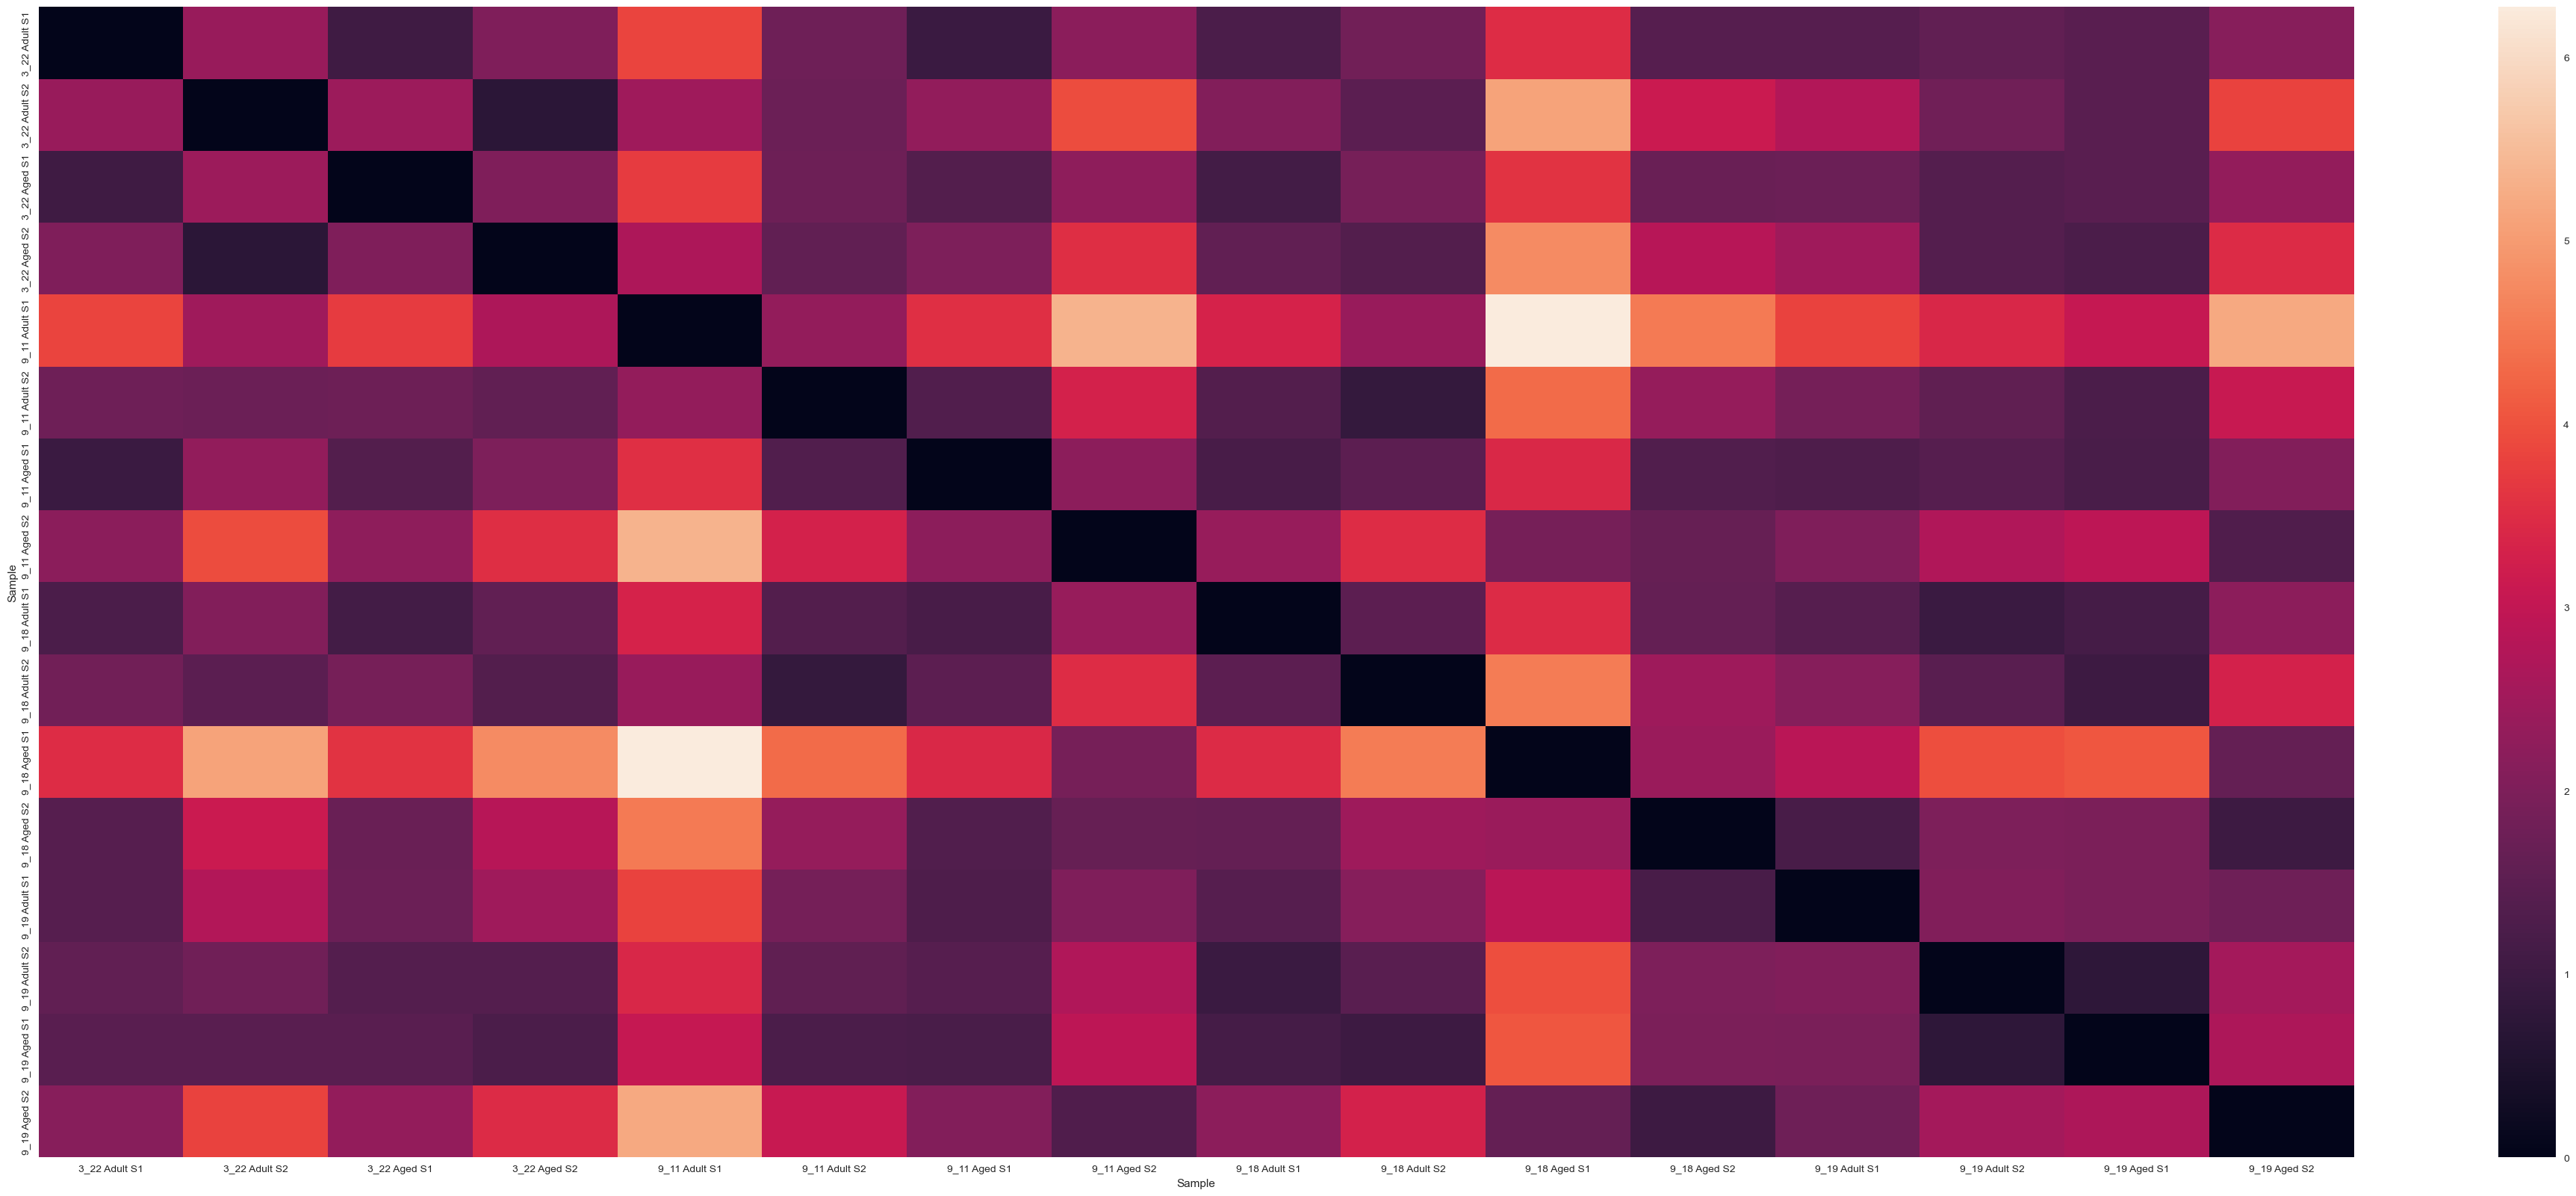

In [64]:
from scipy.spatial.distance import pdist, squareform

#well_df = data_df_combined_f.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop(['Field', 'Exp', 
                                                                                                #'Well ID','Type', 'Age'], axis=1)

well_df = data_combined_norm[data_combined_norm['Exp'] != '9_12']

well_df = well_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop(['Field', 'Exp', 
                                                                                                'Well ID','Type', 'Age'], axis=1)

well_df = well_df.set_index('Sample')

distance_matrix = squareform(pdist(well_df, metric='euclidean'))

distance_df = pd.DataFrame(distance_matrix, index=well_df.index, columns=well_df.index)

sns.heatmap(distance_df)

In [58]:
distance_df

Sample         3_22 Adult S1  3_22 Adult S2  3_22 Aged S1  3_22 Aged S2  \
Sample                                                                    
3_22 Adult S1       0.000000       2.398452      1.042332      2.026941   
3_22 Adult S2       2.398452       0.000000      2.431614      0.725176   
3_22 Aged S1        1.042332       2.431614      0.000000      2.016357   
3_22 Aged S2        2.026941       0.725176      2.016357      0.000000   
9_11 Adult S1       3.841173       2.475776      3.707715      2.674273   
9_11 Adult S2       1.787524       1.726299      1.756135      1.573667   
9_11 Aged S1        0.963350       2.287829      1.348683      1.997608   
9_11 Aged S2        2.195359       3.937698      2.241771      3.516964   
9_12 Adult S1       2.909346       3.166899      3.341601      3.128961   
9_12 Adult S2      41.821102      42.229839     42.147547     42.132428   
9_12 Aged S1       53.216503      53.589649     53.534218     53.495017   
9_12 Aged S2      126.904151     127.273135    127.227225    127.182090   
9_18 Adult S1       1.242953       2.076824      1.125969      1.590489   
9_18 Adult S2       1.821991       1.479635      1.902951      1.372016   
9_18 Aged S1        3.496879       5.109642      3.602363      4.765823   
9_18 Aged S2        1.404336       3.122660      1.702538      2.820477   
9_19 Adult S1       1.418411       2.766573      1.732172      2.496666   
9_19 Adult S2       1.578798       1.795897      1.375756      1.375548   
9_19 Aged S1        1.469937       1.459791      1.468102      1.231576   
9_19 Aged S2        2.134197       3.813410      2.307153      3.472233   

Sample         9_11 Adult S1  9_11 Adult S2  9_11 Aged S1  9_11 Aged S2  \
Sample                                                                    
3_22 Adult S1       3.841173       1.787524      0.963350      2.195359   
3_22 Adult S2       2.475776       1.726299      2.287829      3.937698   
3_22 Aged S1        3.707715       1.756135      1.348683      2.241771   
3_22 Aged S2        2.674273       1.573667      1.997608      3.516964   
9_11 Adult S1       0.000000       2.310797      3.549577      5.355057   
9_11 Adult S2       2.310797       0.000000      1.346785      3.306176   
9_11 Aged S1        3.549577       1.346785      0.000000      2.227870   
9_11 Aged S2        5.355057       3.306176      2.227870      0.000000   
9_12 Adult S1       3.463580       2.877878      3.117347      4.581900   
9_12 Adult S2      41.811647      42.092240     42.217186     42.888098   
9_12 Aged S1       53.123639      53.454792     53.608354     54.293396   
9_12 Aged S2      126.764610     127.139988    127.294376    127.949719   
9_18 Adult S1       3.311214       1.351982      1.182557      2.374577   
9_18 Adult S2       2.382625       0.859661      1.503472      3.491456   
9_18 Aged S1        6.274945       4.334673      3.412471      1.894231   
9_18 Aged S2        4.512077       2.349331      1.325128      1.652823   
9_19 Adult S1       3.805302       1.878551      1.275317      2.021770   
9_19 Adult S2       3.405283       1.568258      1.413172      2.728710   
9_19 Aged S1        3.054017       1.235766      1.217316      2.935708   
9_19 Aged S2        5.206173       3.072835      2.070922      1.306671   

Sample         9_12 Adult S1  9_12 Adult S2  9_12 Aged S1  9_12 Aged S2  \
Sample                                                                    
3_22 Adult S1       2.909346      41.821102     53.216503    126.904151   
3_22 Adult S2       3.166899      42.229839     53.589649    127.273135   
3_22 Aged S1        3.341601      42.147547     53.534218    127.227225   
3_22 Aged S2        3.128961      42.132428     53.495017    127.182090   
9_11 Adult S1       3.463580      41.811647     53.123639    126.764610   
9_11 Adult S2       2.877878      42.092240     53.454792    127.139988   
9_11 Aged S1        3.117347      42.217186     53.608354    127.294376   
9_11 Aged S2        4.5

In [30]:
! pip install --upgrade pycytominer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 29.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 33.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.4.54-cp310-cp310-macosx_11_0_arm64.whl size=1573076 sha256=019917539b4386f71fc63b023891d98e7b5a33d10944998d96b0e6b3fb563558
  Stored in directory: /Users/SamihaMahin/Library/Caches/pip/wheels/67/1e/e3/21b7fd749e112fdcd46ea531c749344394b2c07c0a39da8e3a
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.34
    Uninstalling SQLAlchemy-2.0.34:
      Successfully uninstalled SQLAlchemy-2.0.34
  Attempting uninstall: pycytominer
    Found existing installation: pycytominer 0.2.0
    Uninstalling pycytominer-0.2.0:
      Successfully uninstalled pycytominer-0.2.0


In [33]:
from pycytominer import normalize

In [ ]:
def pycyto_norm(data_df_combined, list_exp, relevant_features):
    # Initialize an empty DataFrame to store normalized data
    all_normalized_data = pd.DataFrame()
    
    for exp in list_exp:
        # Filter the data for the current experiment
        _df = data_df_combined[data_df_combined['Exp'] == exp]
        
        # Normalize the data
        _df_norm = normalize(_df, features=relevant_features, 
                             meta_features=["Exp", "Well ID", "Field", "Age", "Sample", "Type"],
                             method='mad_robustize')
        
        # Append the normalized data to the combined DataFrame
        all_normalized_data = pd.concat([all_normalized_data, _df_norm], ignore_index=True)
    
    # Return the combined DataFrame with all normalized data
    return all_normalized_data


In [59]:
def pycyto_norm(data_df_combined, list_exp):
  all_normalized_data = pd.DataFrame()
  for exp in list_exp:
    _df = data_df_combined[data_df_combined_f['Exp'] == exp]
    _df_norm = normalize(_df, features = relevant_features, 
                         meta_features = ["Exp","Well ID",	"Field"	, "Age", "Sample", "Type"],
                         method='standard')
    all_normalized_data = pd.concat([all_normalized_data, _df_norm], ignore_index=True)

  return all_normalized_data

In [54]:
data_combined_norm = pycyto_norm(data_df_combined_f, ['3_22', '9_11', '9_12', '9_18', '9_19'])
data_combined_norm

Exp Well ID  Field    Age         Sample     Type  \
0      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
...     ...     ...    ...    ...            ...      ...   
26750  9_19  (4, 4)    123   Aged   9_19 Aged S2  9_19 S2   
26751  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   
26752  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   
26753  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   
26754  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.730296                    6.057814   
1                        -0.873586                   -0.934532   
2                        -1.080115                    0.072712   
3                        -0.046177                    0.409454   
4                         0.628580                    0.365100   
...                            ...                         ...   
26750                     0.080954                    0.818542   
26751                     0.194129                    1.141110   
26752                     0.707053                    1.006078   
26753                     0.994465                    0.878516   
26754                     0.800996                    0.922599   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.954957           -0.595358  ...            -0.325388   
1                2.226309            1.130885  ...             1.499318   
2                0.780645            0.586555  ...             0.221421   
3               -0.188683           -0.047280  ...             1.657393   
4               -0.973793           -0.811788  ...             0.128682   
...                   ...                 ...  ...                  ...   
26750            1.560603            2.451597  ...            -0.492048   
26751            0.352790           -0.014742  ...             0.733169   
26752           -0.405790           -0.516347  ...             0.503949   
26753           -0.148498           -0.988250  ...             0.531812   
26754            0.614351            0.656883  ...            -0.302090   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.302000                   2.653814                  4.932052   
1               1.406371                  -0.549774                 -0.731678   
2               0.222332                   1.778042                  1.293600   
3               0.816167                   0.718817                 -0.461191   
4               0.245159                   1.596115                 -0.031147   
...                  ...                        ...                       ...   
26750          -0.310244                  -0.986335                 22.594029   
26751           0.658524                  -0.244531                  0.618356   
26752           0.108901                  -0.038038                 -0.419964   
26753           0.582305                   0.417685                 -0.750355   
26754          -0.346581                  -0.613258                  1.737550   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      2.553020                 5.094324   2.253174   
1                     -0.974535                -0.886801  -0.382570   
2                      0.954233                 0.839086   0.366439   
3                      0.458175                -0.454635  -0.544285   
4                      0.209329                -0.451145  -0.567329   
...                         ...                      ...        ...   
26750                 -0.758481                13.110075  35.884419   
26751                 -0.472392         

In [45]:
df_3_22 = data_df_combined_f[data_df_combined_f['Exp'] == '3_22']
df_3_22

Exp Well ID  Field    Age         Sample     Type  \
0      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
...     ...     ...    ...    ...            ...      ...   
12848  3_22  (3, 3)    121   Aged   3_22 Aged S2  3_22 S2   
12849  3_22  (3, 3)    121   Aged   3_22 Aged S2  3_22 S2   
12850  3_22  (3, 3)    121   Aged   3_22 Aged S2  3_22 S2   
12851  3_22  (3, 3)    121   Aged   3_22 Aged S2  3_22 S2   
12852  3_22  (3, 3)    121   Aged   3_22 Aged S2  3_22 S2   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                          2876.29                    10636500   
1                          2720.33                     4183860   
2                          2495.54                     5113360   
3                          3620.90                     5424110   
4                          4355.32                     5383180   
...                            ...                         ...   
12848                      4158.91                     4774430   
12849                      2972.36                     5050040   
12850                      9461.00                     4995410   
12851                      3532.40                     3719620   
12852                      1460.21                     2448770   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0                0.010935            0.008959  ...             0.031209   
1                0.016779            0.012086  ...             0.046891   
2                0.014123            0.011100  ...             0.035908   
3                0.012343            0.009952  ...             0.048249   
4                0.010901            0.008567  ...             0.035111   
...                   ...                 ...  ...                  ...   
12848            0.012625            0.011330  ...             0.029206   
12849            0.013346            0.011490  ...             0.036115   
12850            0.012493            0.007641  ...             0.033740   
12851            0.012311            0.011518  ...             0.024220   
12852            0.015078            0.013354  ...             0.021732   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0               0.029607                   2311.150                  15752800   
1               0.043625                    862.795                   1823950   
2               0.033910                   1915.210                   6804730   
3               0.038782                   1436.330                   2489160   
4               0.034097                   1832.960                   3546770   
...                  ...                        ...                       ...   
12848           0.028605                   1088.400                   9151280   
12849           0.030978                    810.576                   9237320   
12850           0.030258                   1945.980                   2126960   
12851           0.023479                    976.557                  10870100   
12852           0.021211                    543.220                    815917   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                       5752.65                 39210100   348.7470   
1                       1304.47                  2757640   121.1360   
2                       3736.61                 13276200   185.8170   
3                       3111.09                  5391510   107.1710   
4                       2797.30                  5412780   105.1810   
...                         ...                      ...        ...   
12848                   2757.83                 23187900   316.9700   
12849                   2203.57         

In [49]:
df_3_22_norm = normalize(df_3_22, features = relevant_features, 
          meta_features = ["Exp","Well ID",	"Field"	, "Age", "Sample", "Type"],
          method='mad_robustize')

In [79]:
data_combined_norm = data_combined_norm[data_combined_norm['Exp'] != '9_12']

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

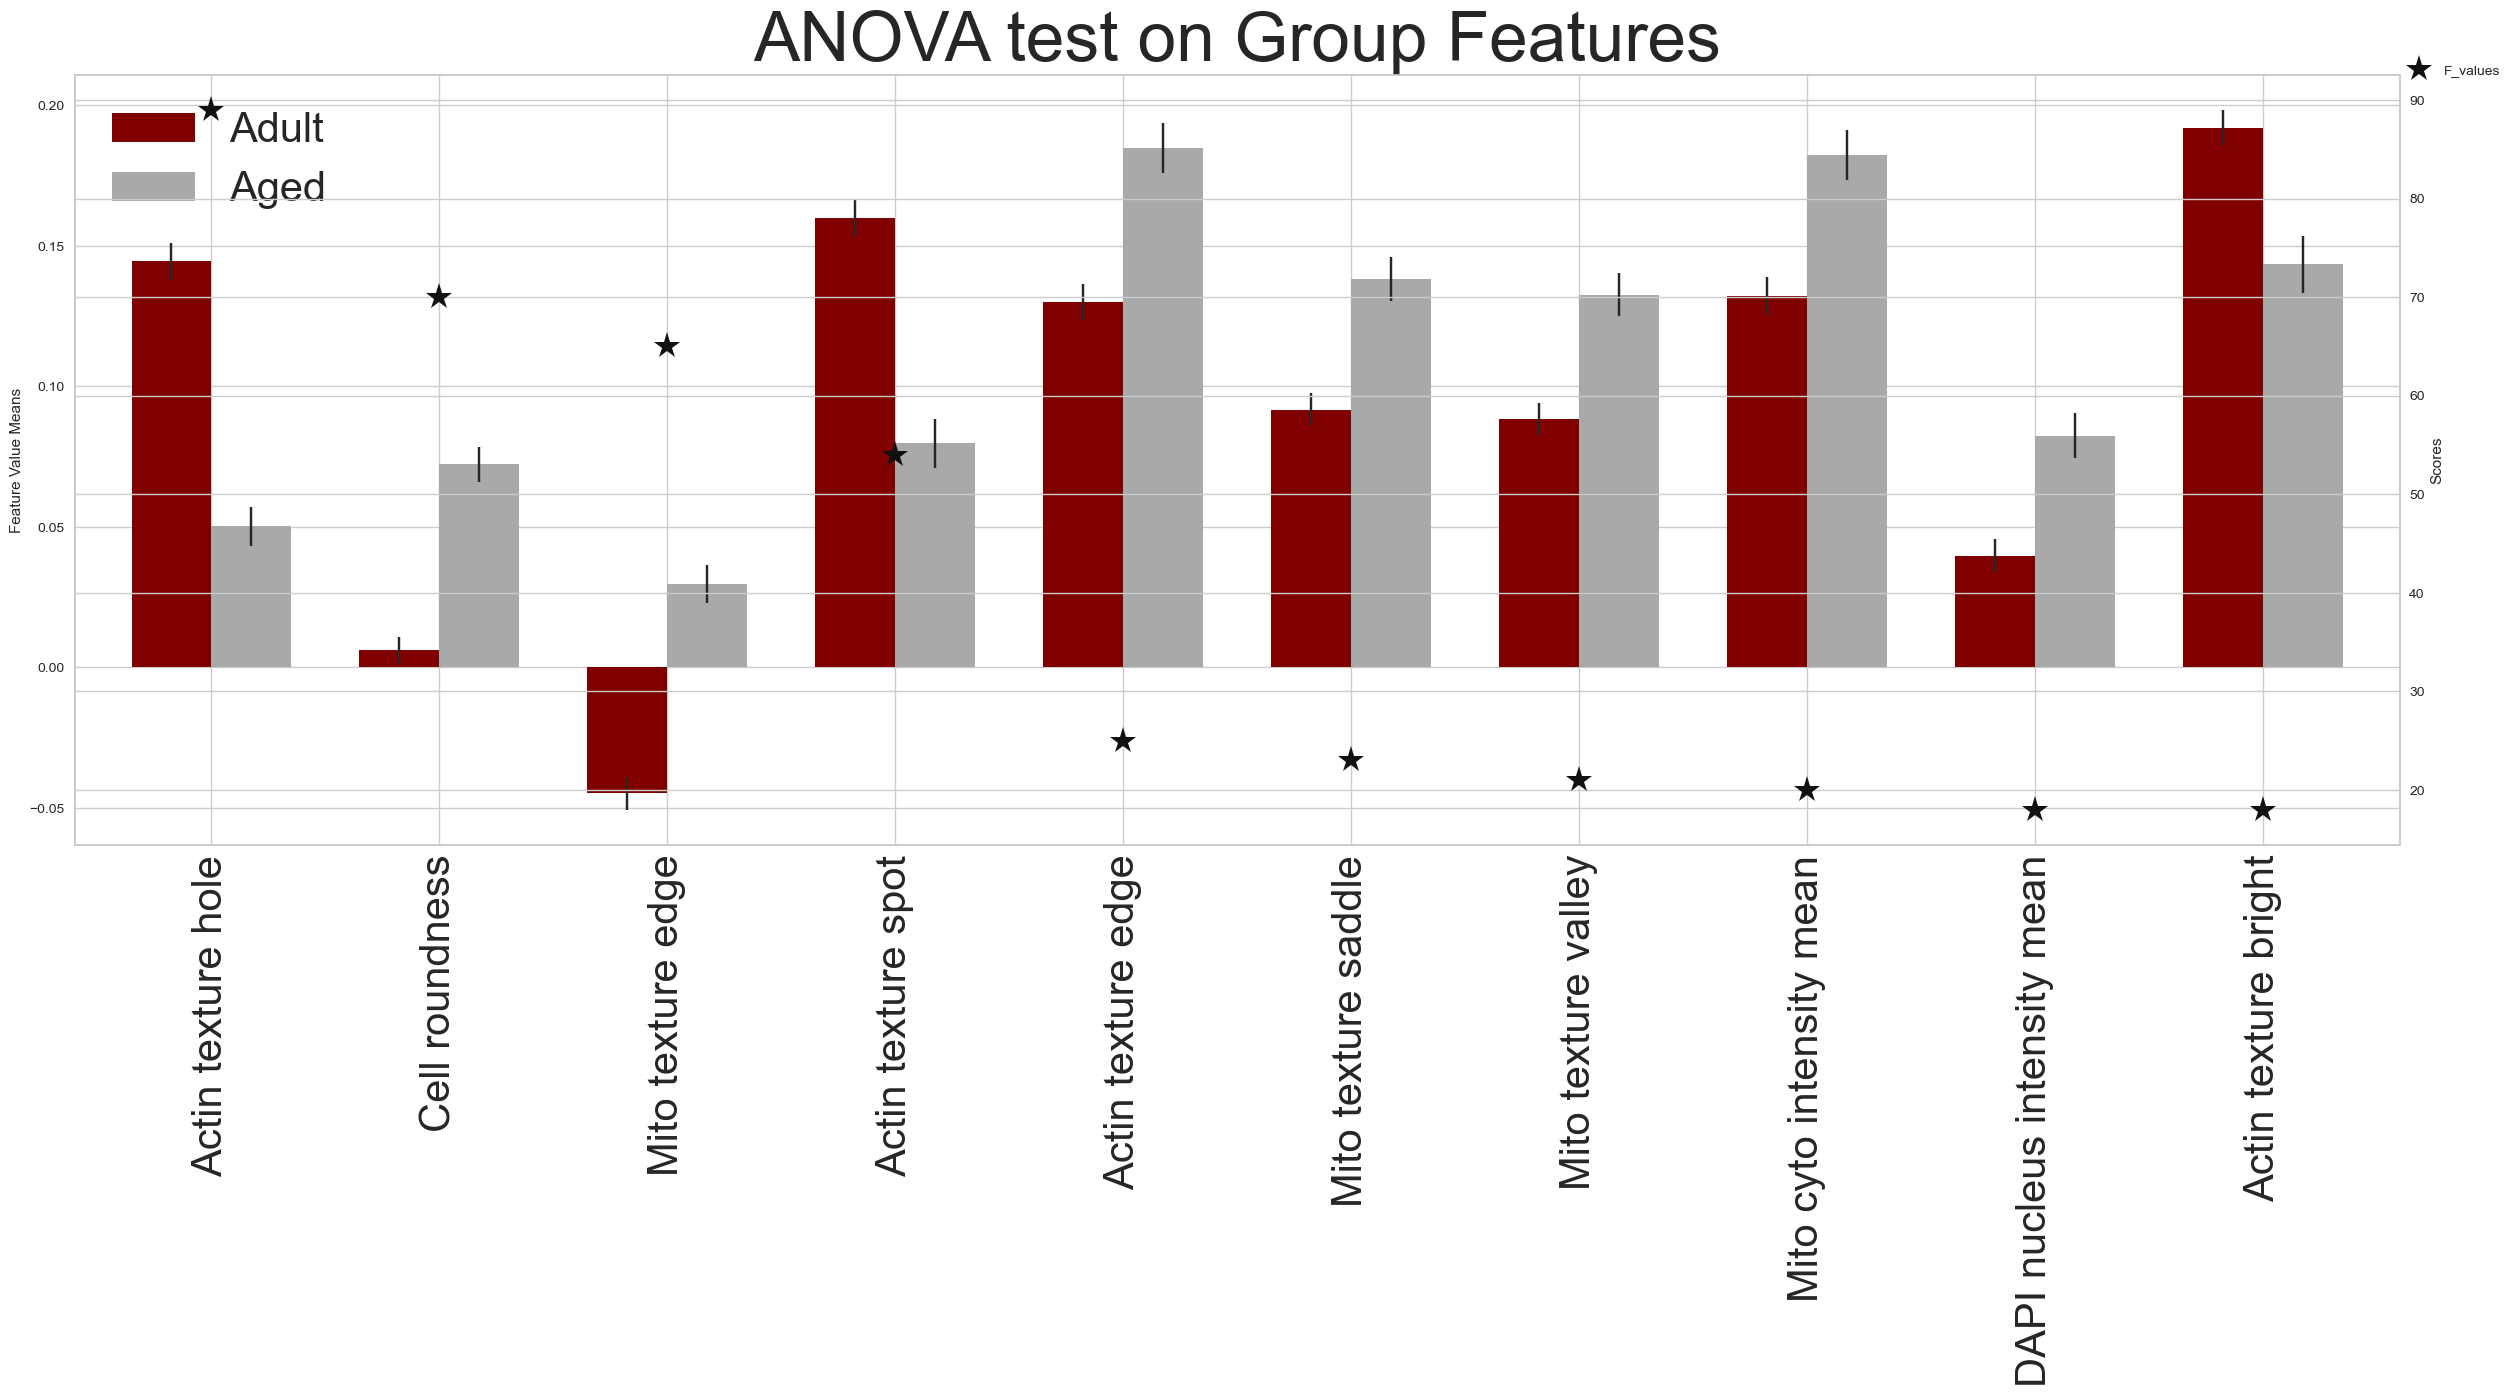

<Figure size 5000x2000 with 0 Axes>

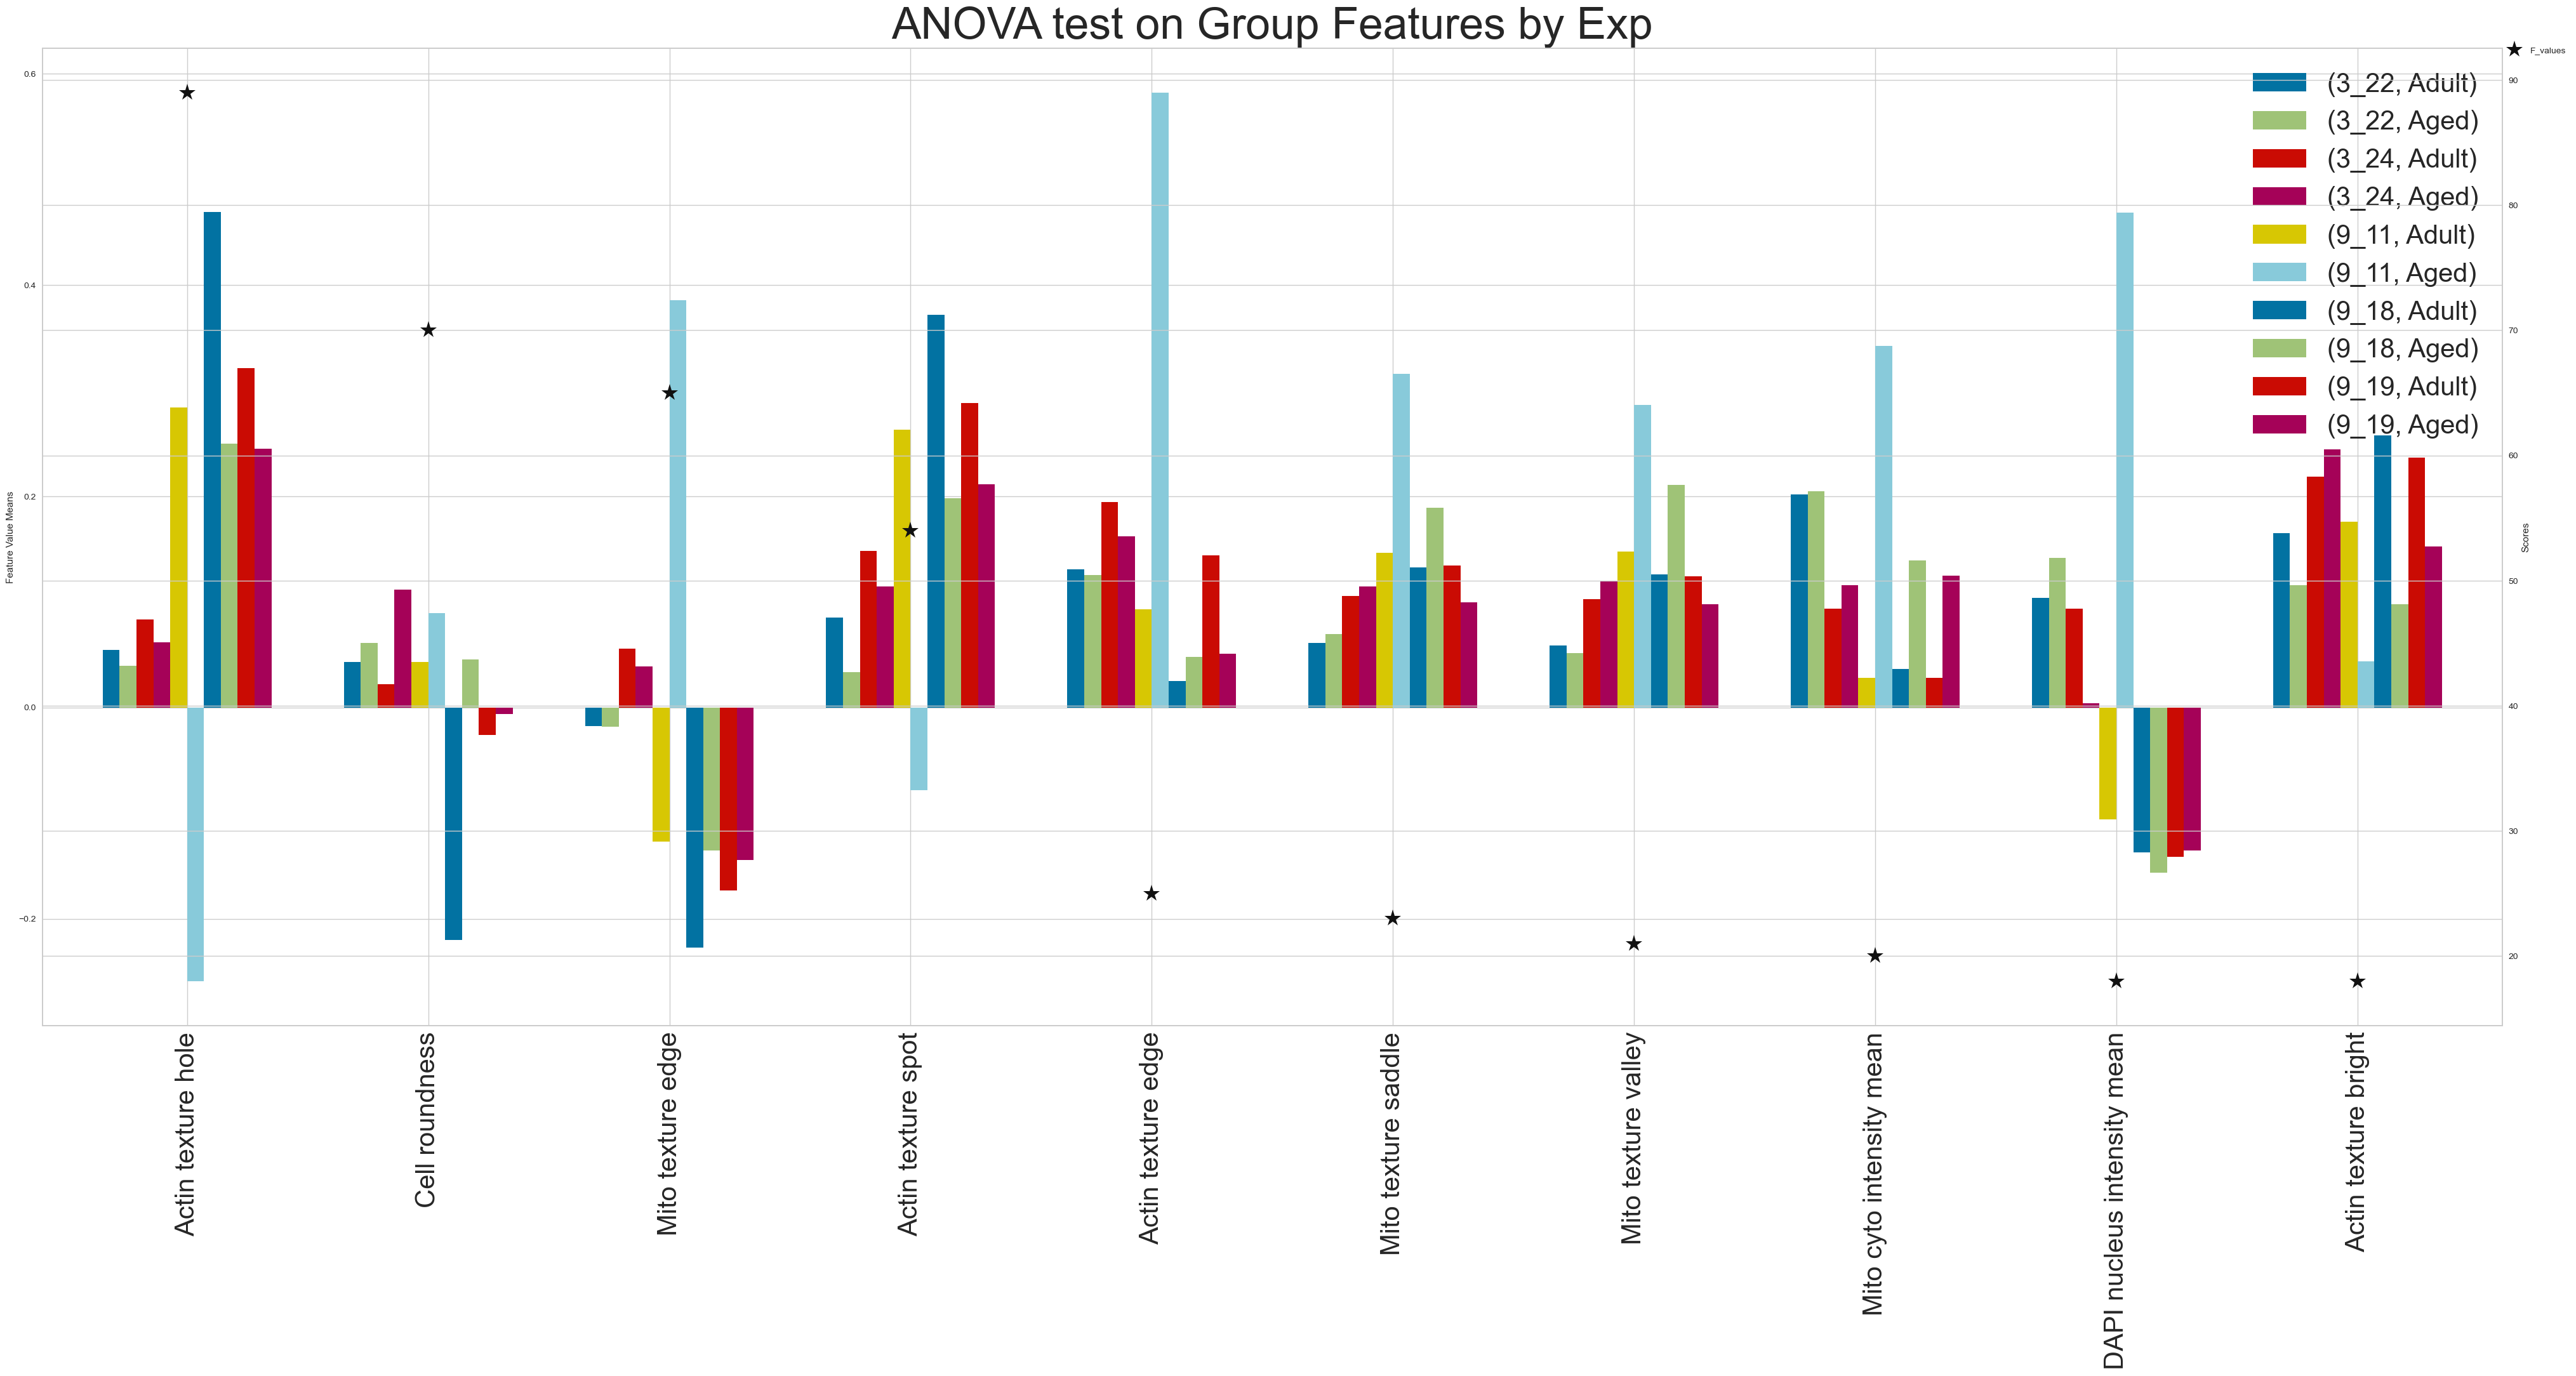

In [81]:
viz_df, selected_features = ANOVA_feat_ranking(data_df_combined, num_features=20)
viz_ANOVA_feat_ranking_group(viz_df, selected_features, "ANOVA test on Group Features")
viz_ANOVA_feat_ranking_exp(data_df_combined, viz_df, selected_features, "ANOVA test on Group Features by Exp")

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

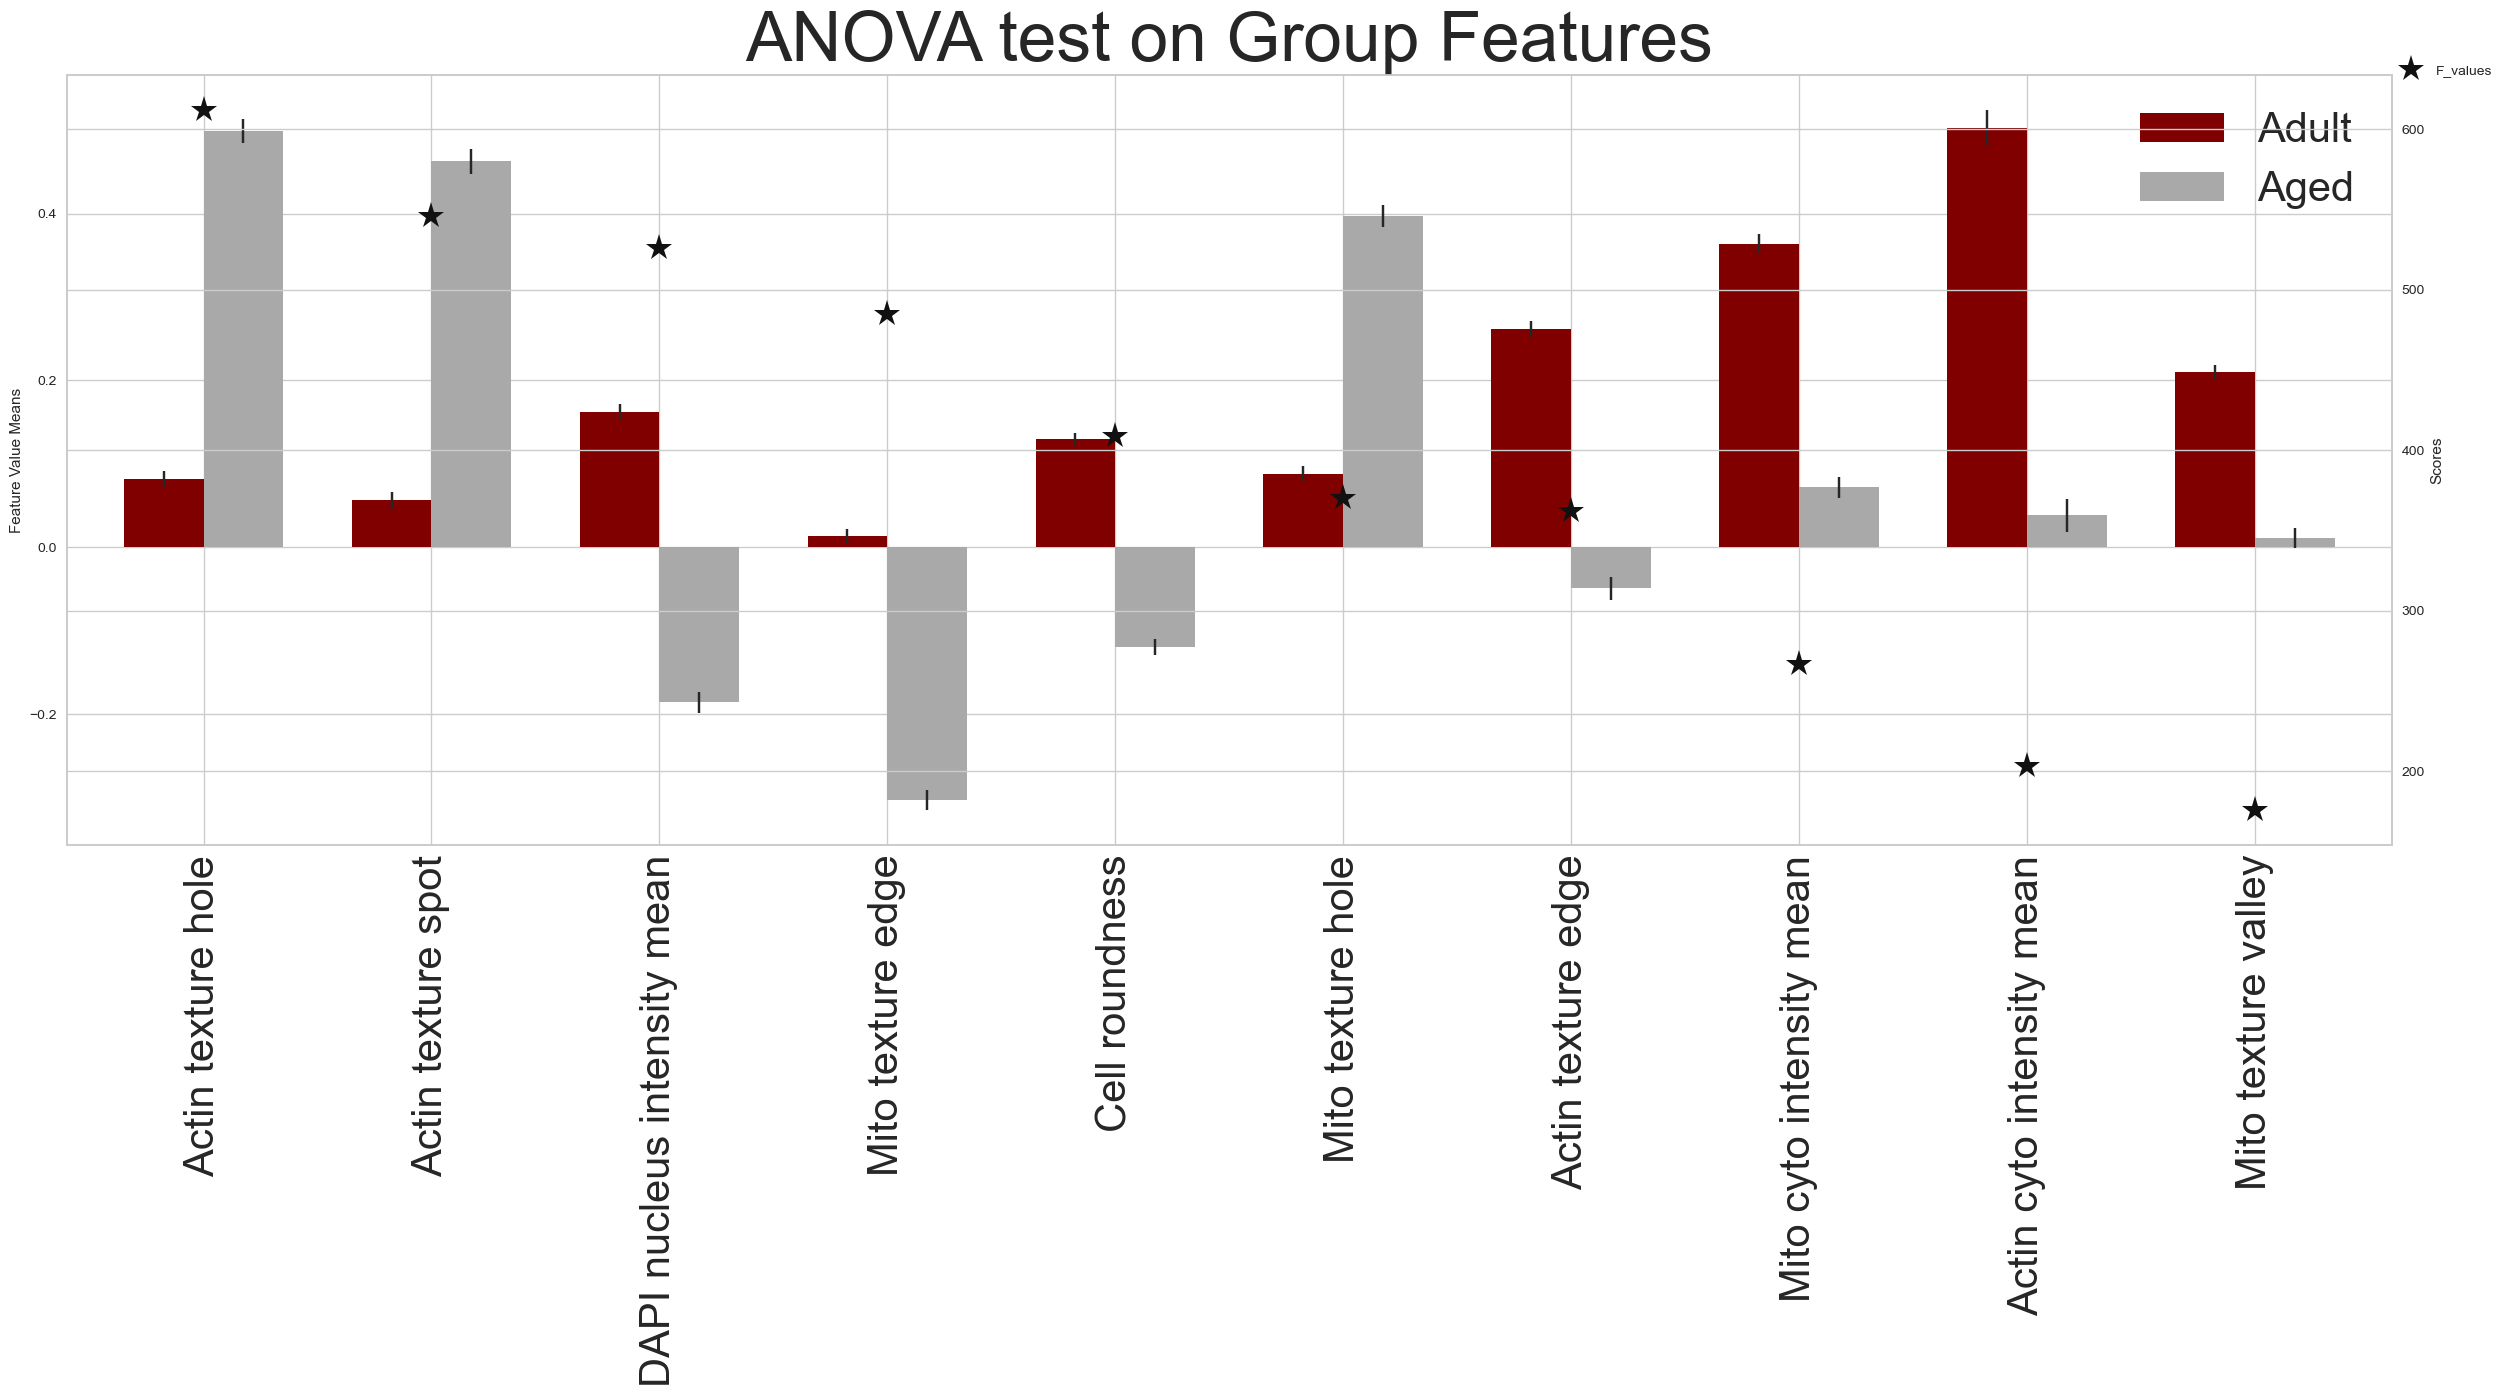

<Figure size 5000x2000 with 0 Axes>

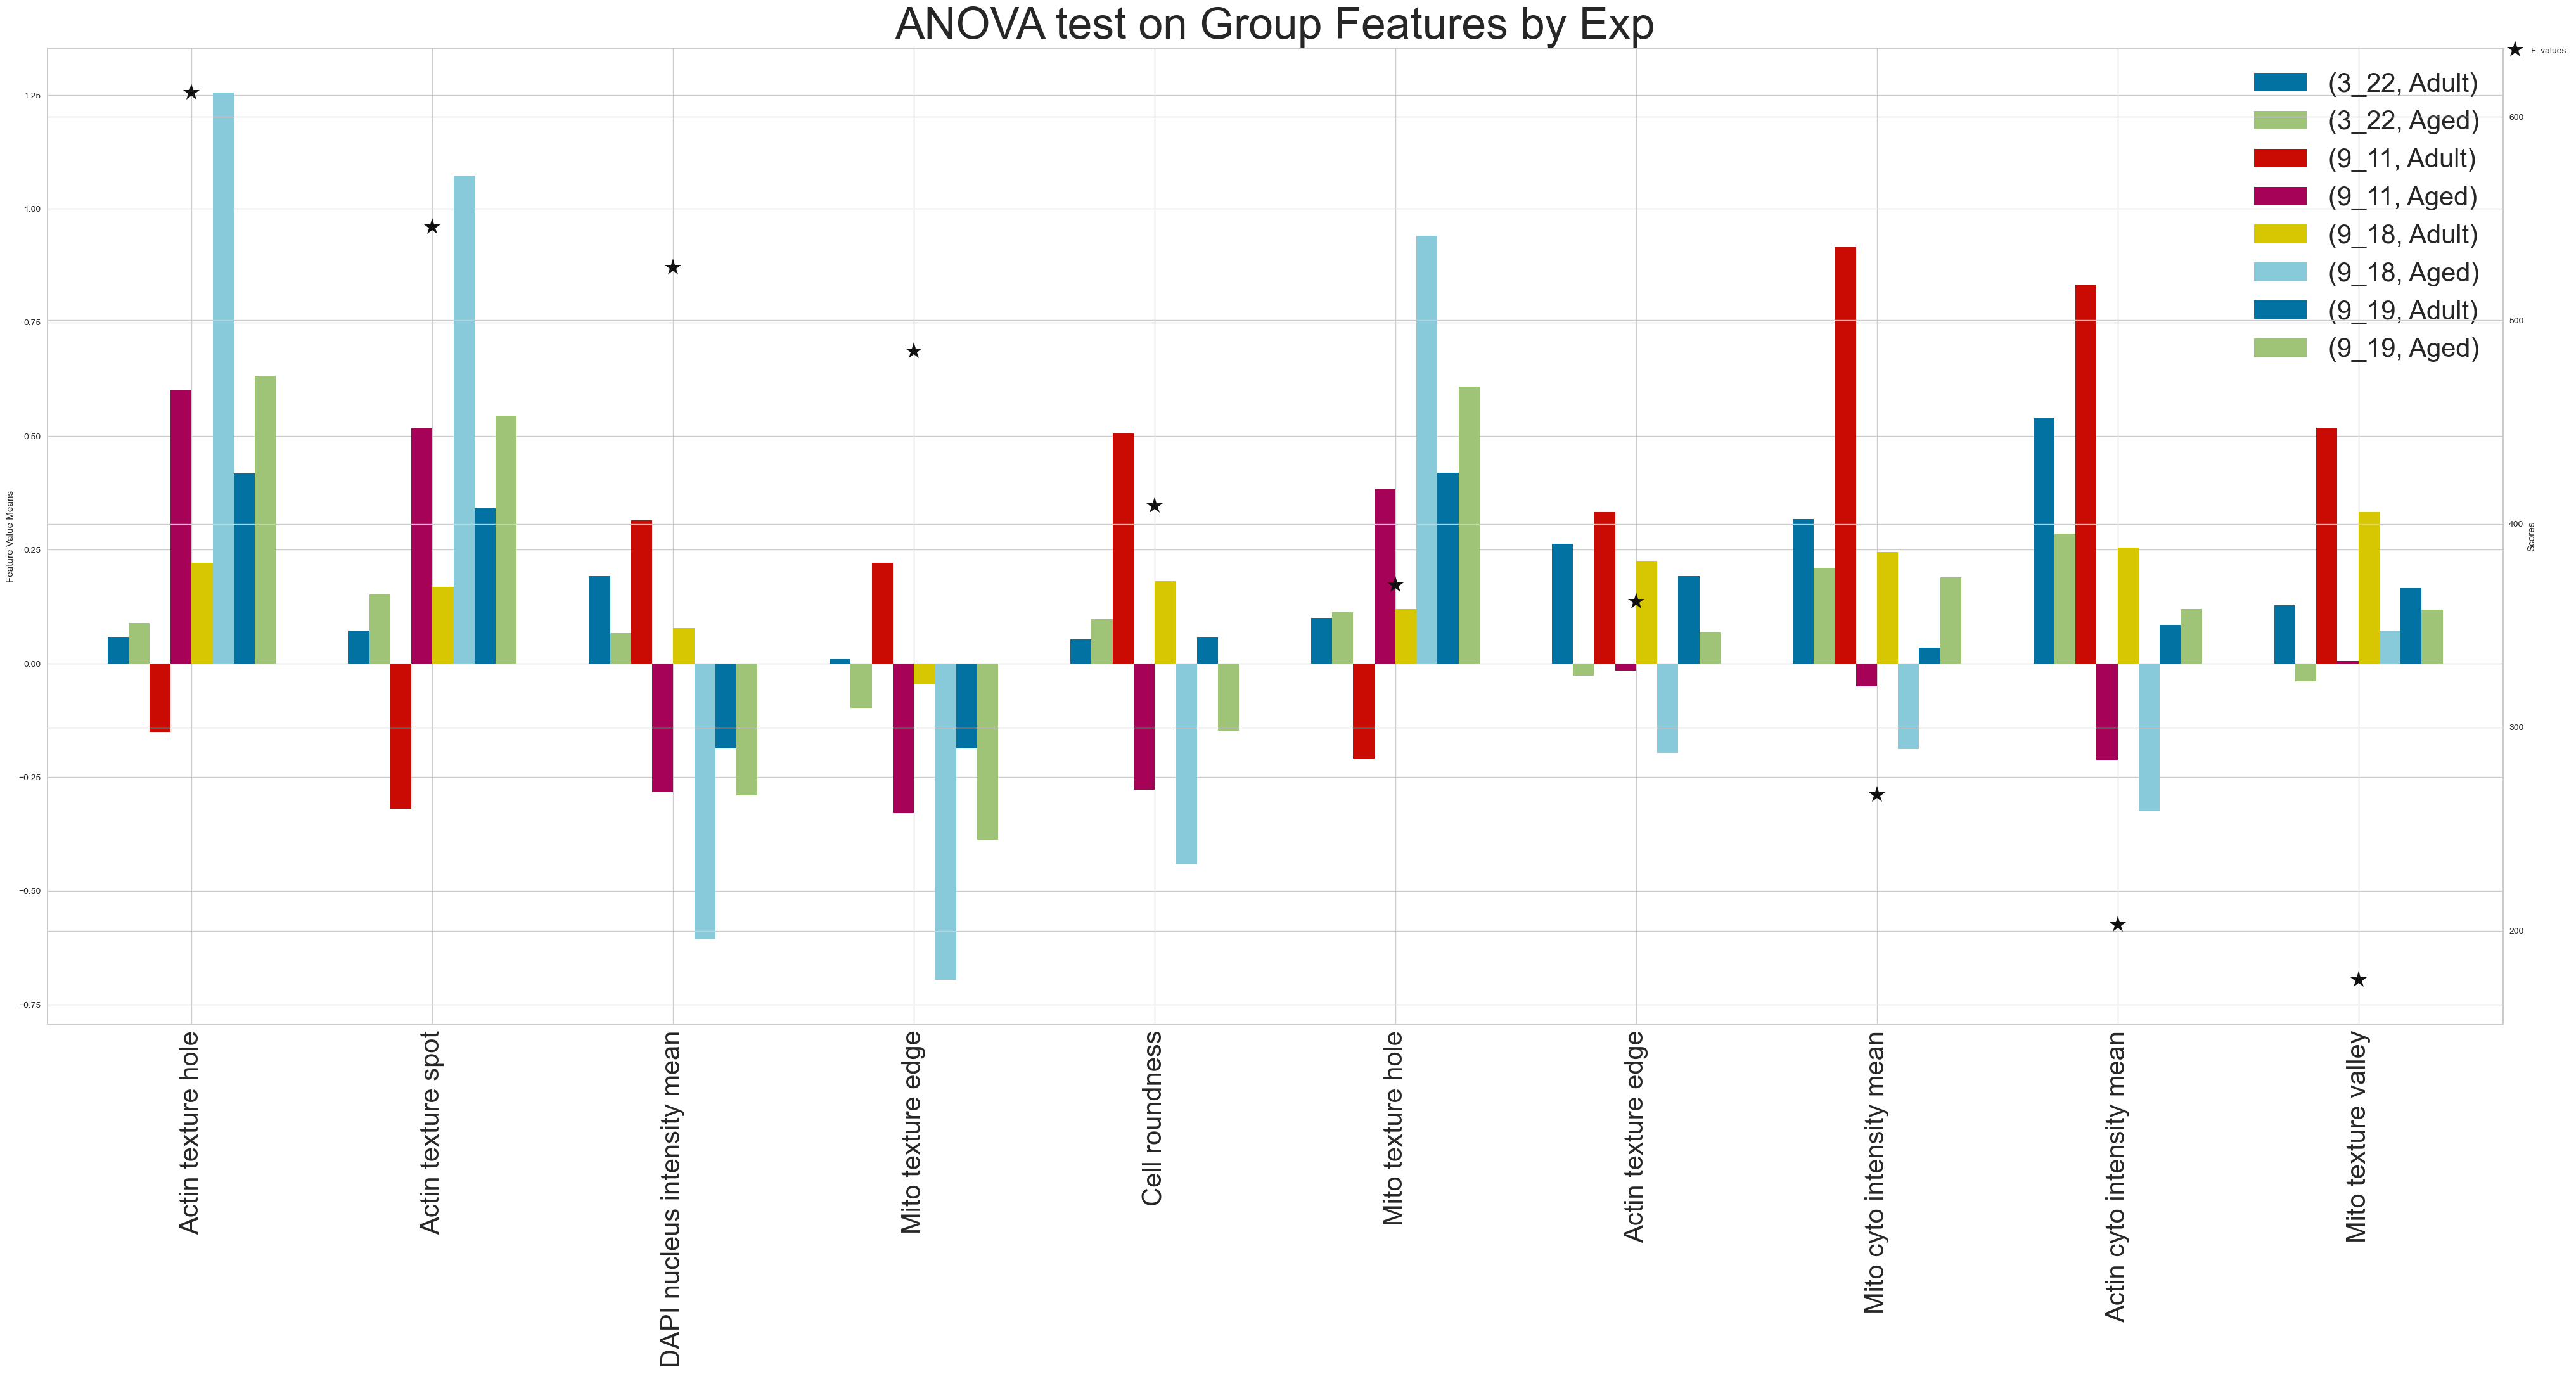

In [80]:
#CHANGED NORMALIZATION TO PYCYTOMINER 

viz_df, selected_features = ANOVA_feat_ranking(data_combined_norm, num_features=20)
viz_ANOVA_feat_ranking_group(viz_df, selected_features, "ANOVA test on Group Features")
viz_ANOVA_feat_ranking_exp(data_combined_norm, viz_df, selected_features, "ANOVA test on Group Features by Exp")

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

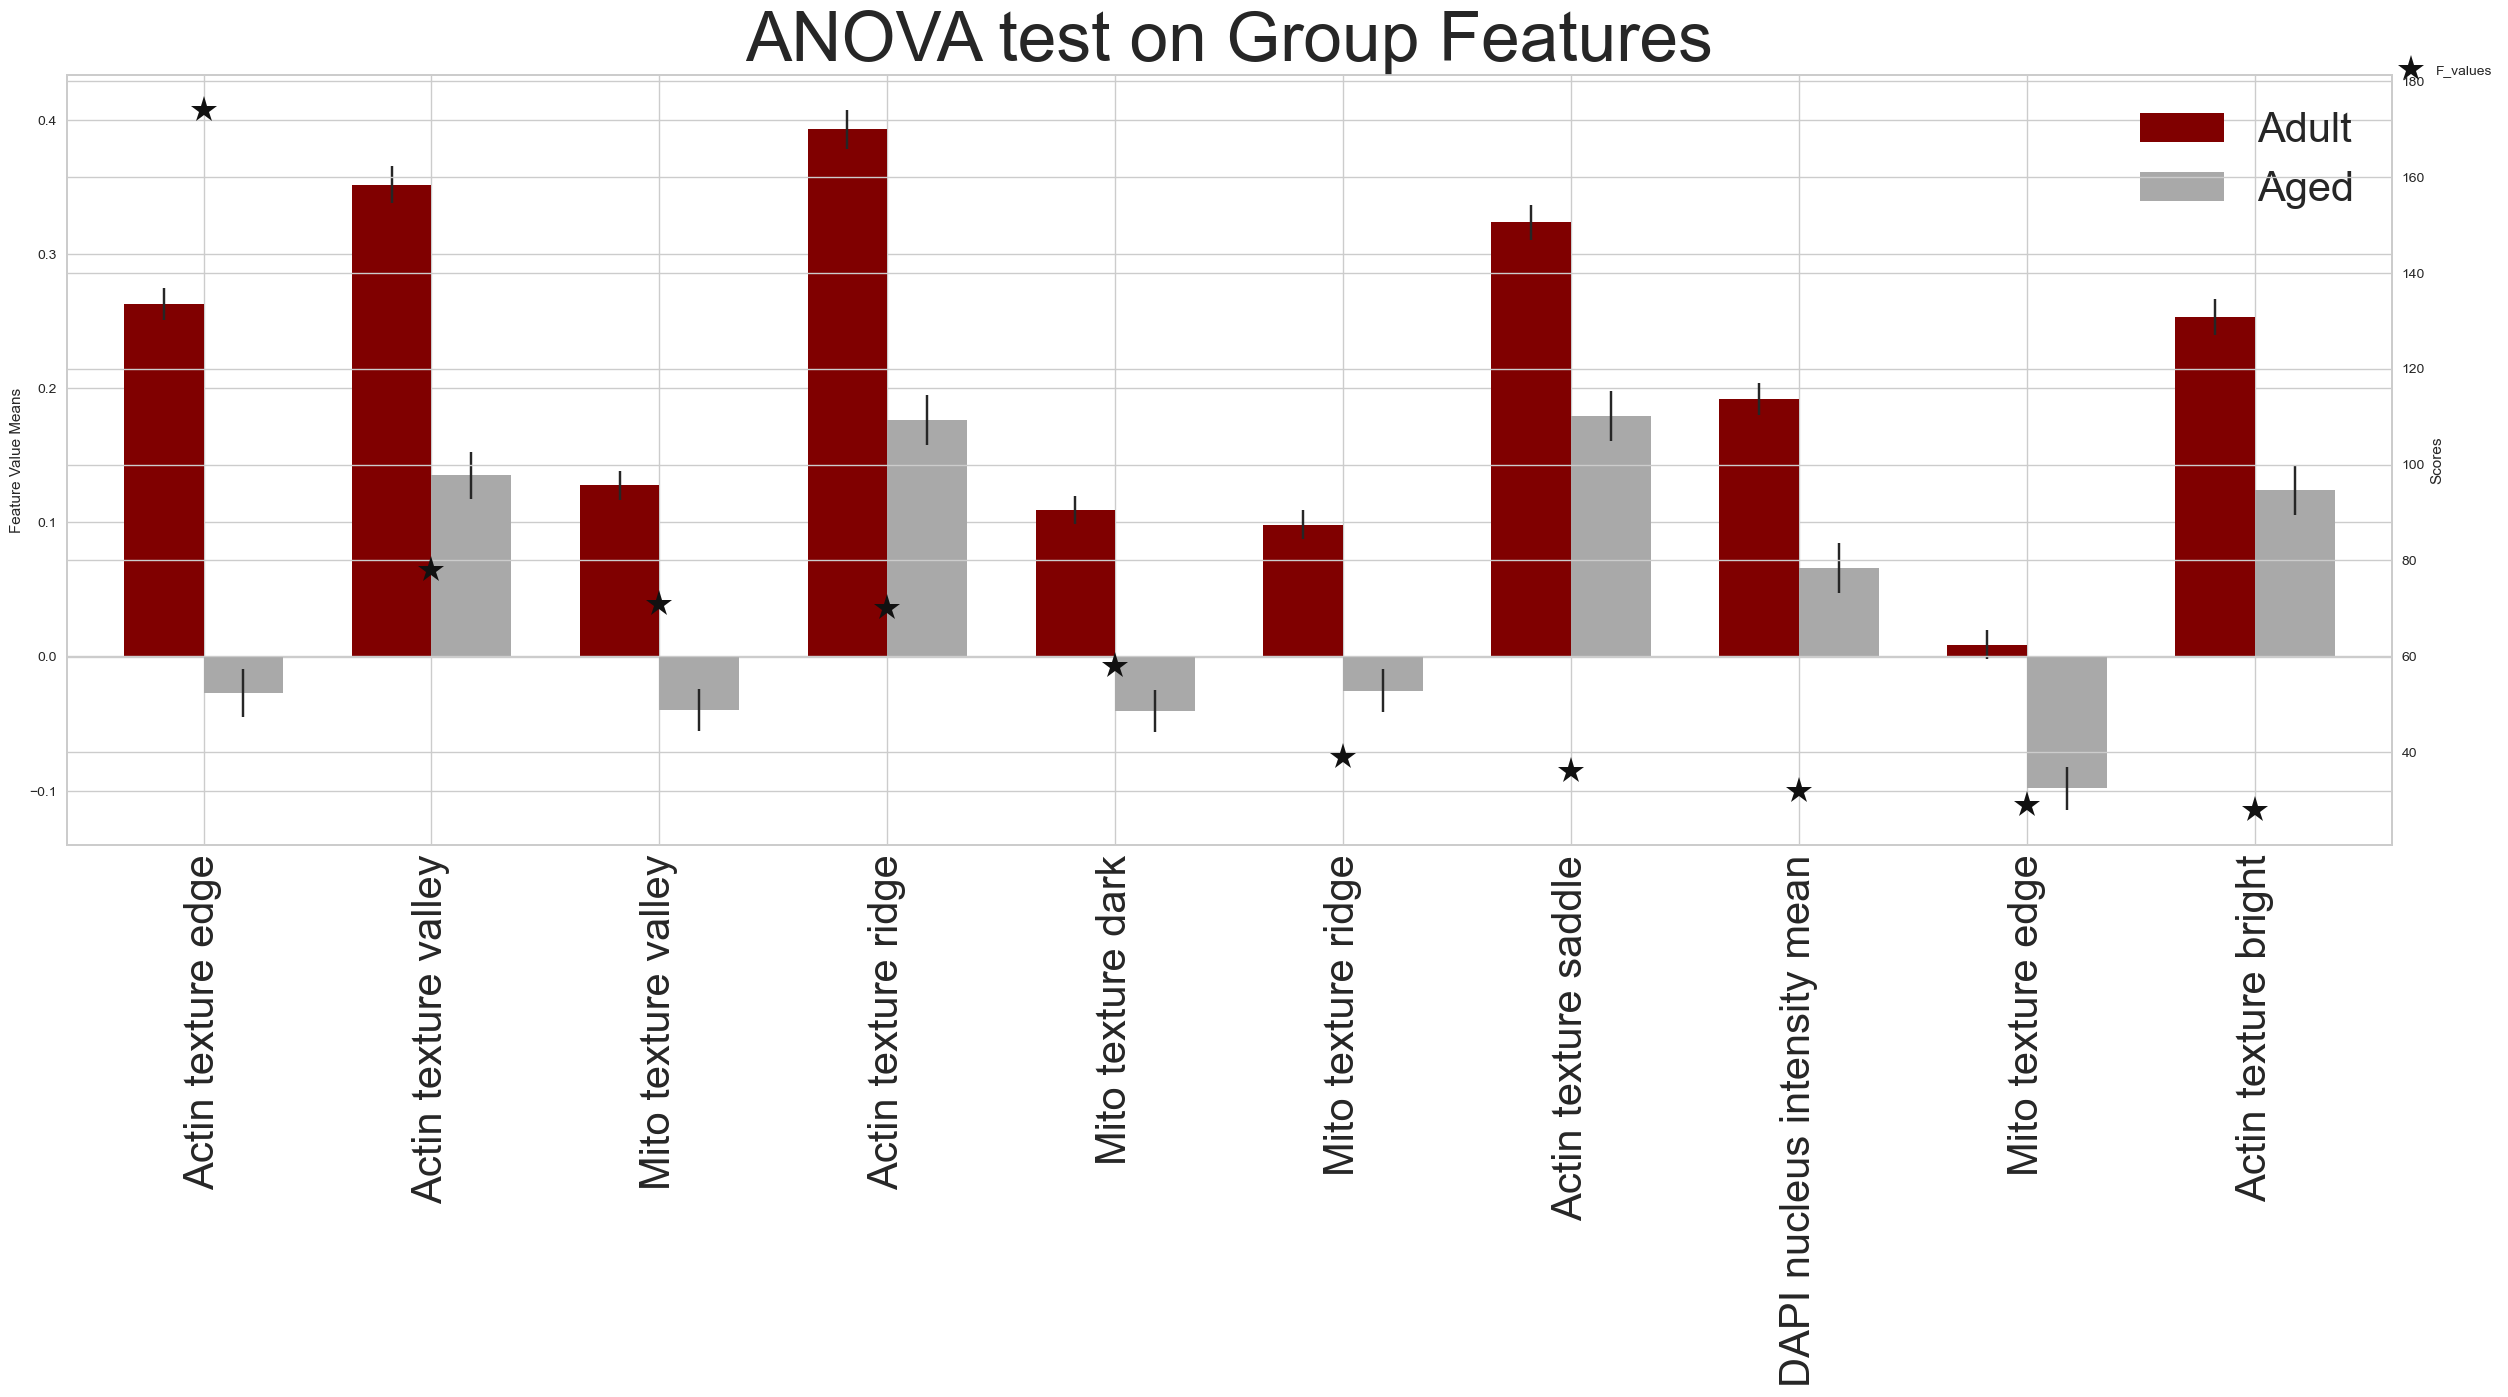

<Figure size 5000x2000 with 0 Axes>

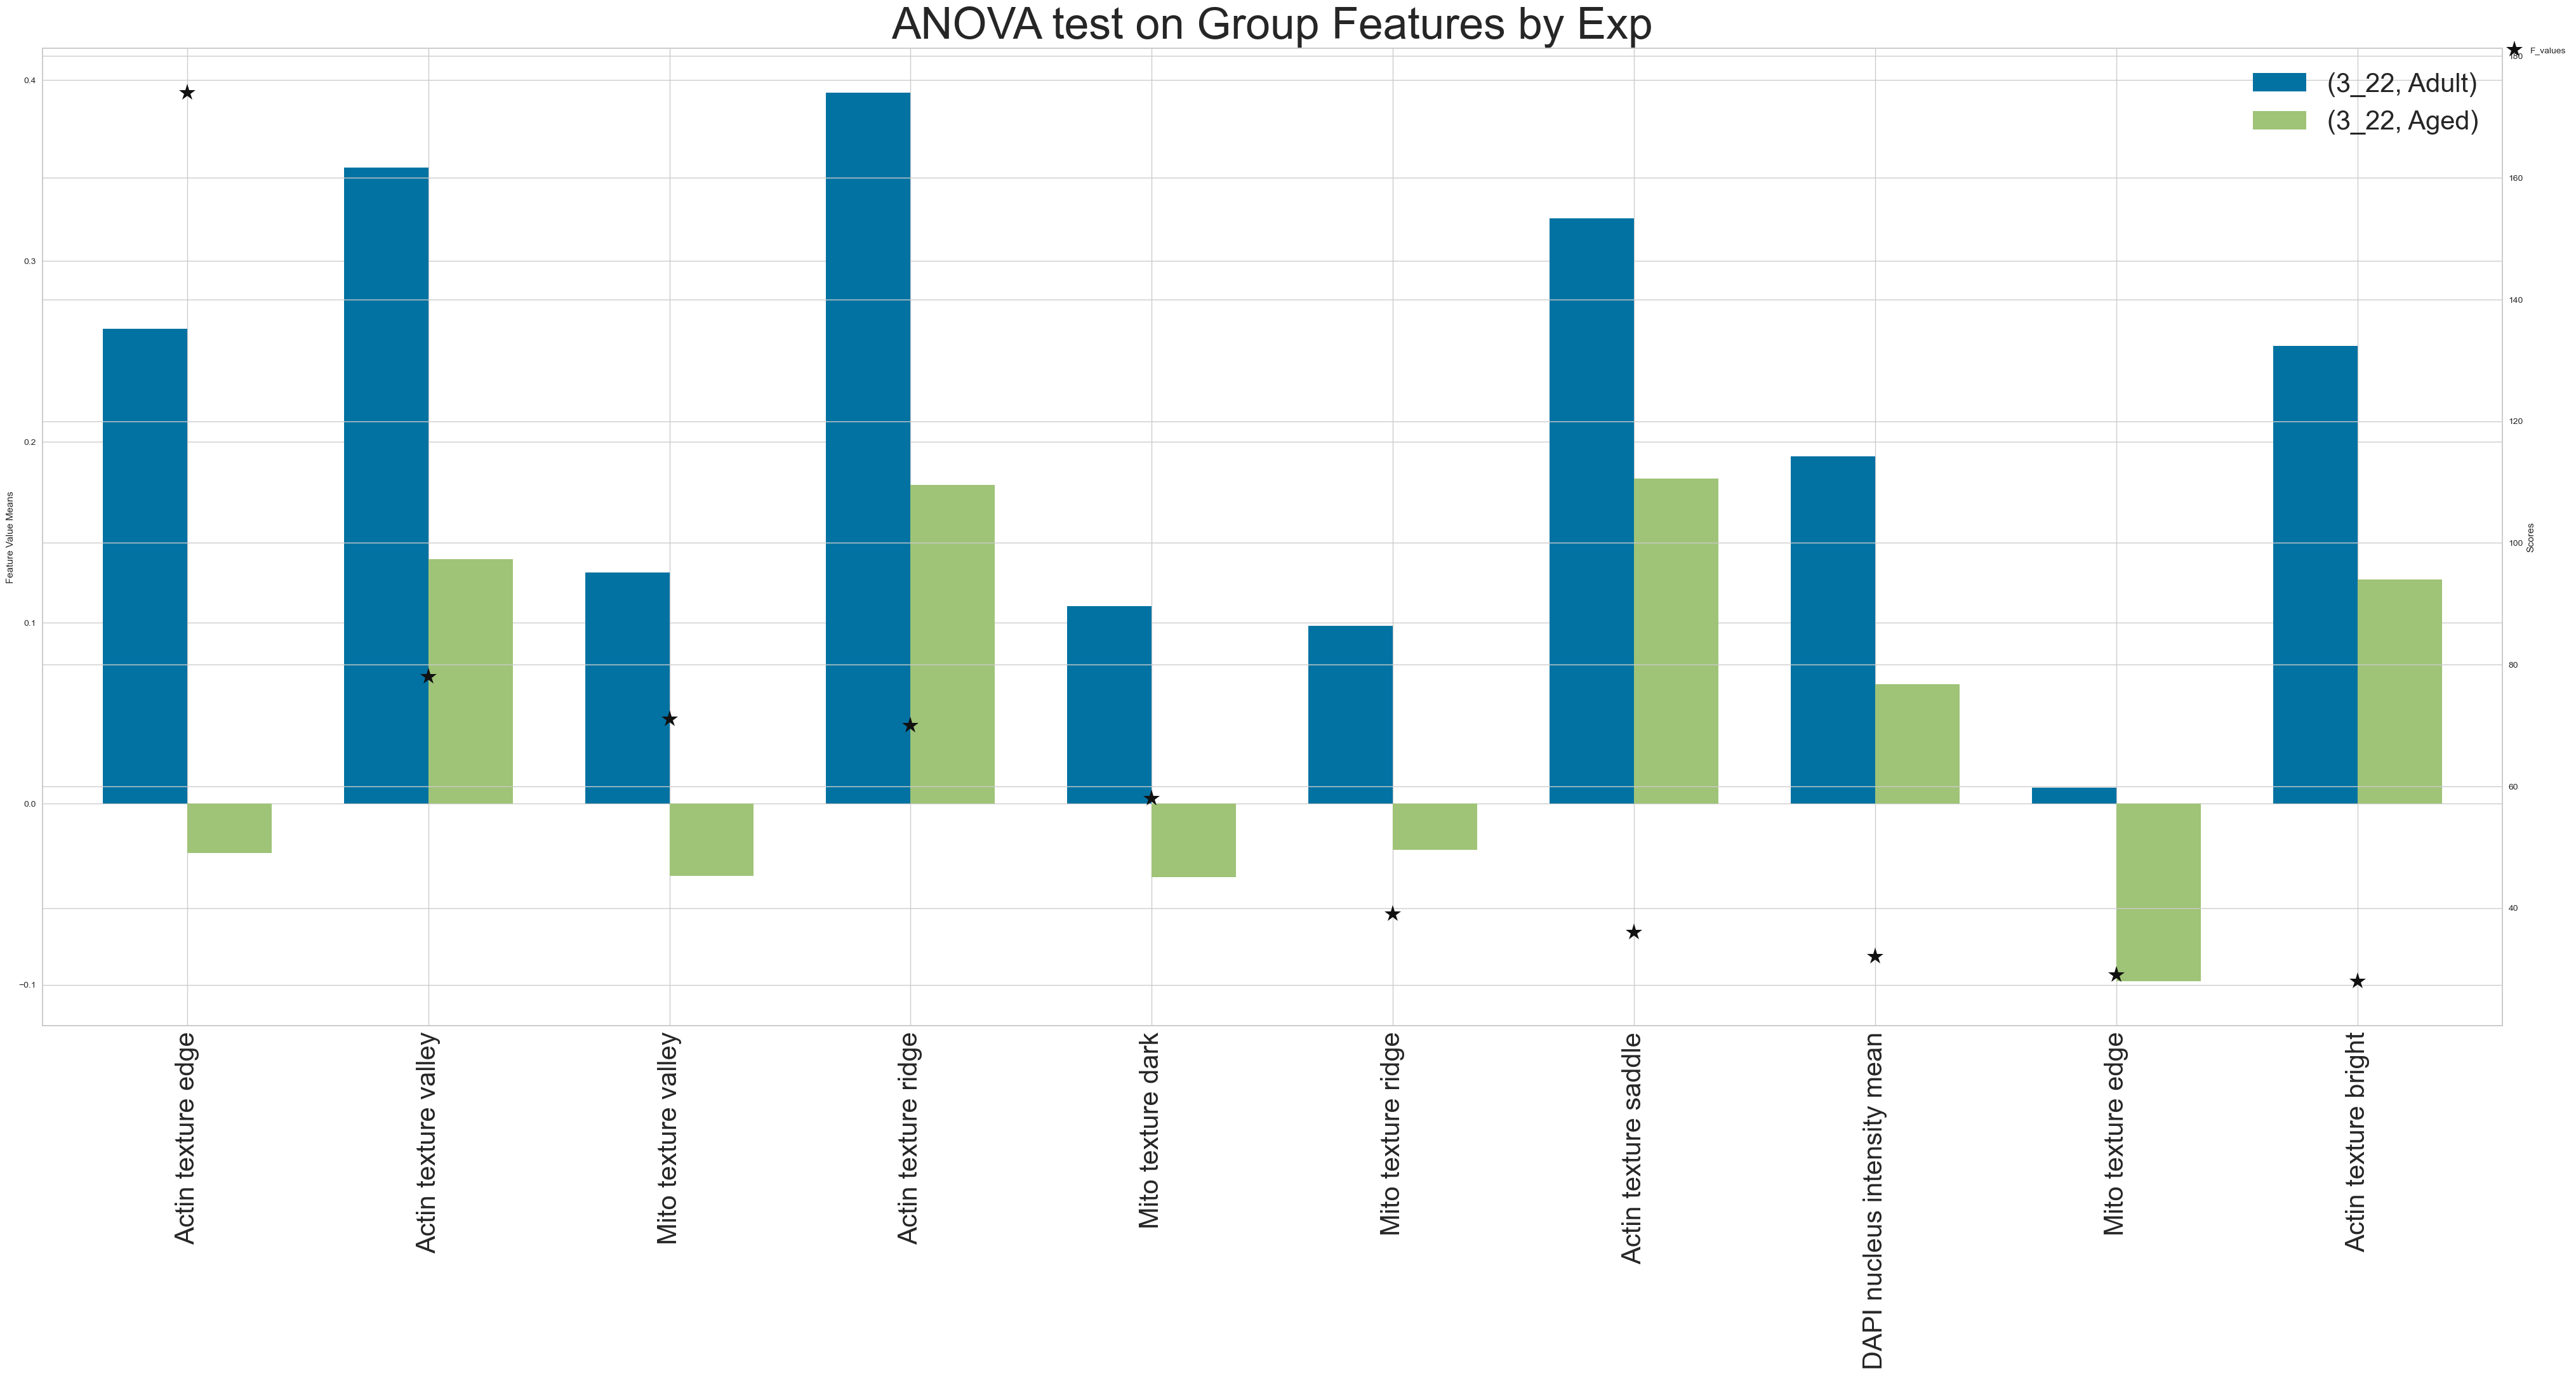

In [50]:
viz_df, selected_features = ANOVA_feat_ranking(df_3_22_norm, num_features=20)
viz_ANOVA_feat_ranking_group(viz_df, selected_features, "ANOVA test on Group Features")
viz_ANOVA_feat_ranking_exp(df_3_22_norm, viz_df, selected_features, "ANOVA test on Group Features by Exp")

In [ ]:
data_df = pd.DataFrame({"Metadata_plate": ["a", "a", "a", "a", "b", "b", "b", "b"],
                        "Metadata_treatment": ["drug", "drug", "control", "control", "drug", "drug", "control", "control"],
                          "x": [1, 2, 8, 2, 5, 5, 5, 1], "y": [3, 1, 7, 4, 5, 9, 6, 1], 
                          "z": [1, 8, 2, 5, 6, 22, 2, 2], "zz": [14, 46, 1, 6, 30, 100, 2, 2]})

normalized_df = normalize(
profiles=data_df, features=["x", "y", "z", "zz"], 
                            meta_features=["Metadata_plate", "Metadata_treatment"], 
                                           samples="Metadata_treatment == 'control'", 
                                           method="standardize")

In [ ]:
data_df_combined_f

## Feature Analysis 

### Pie plot age count distribution

Text(0.5, 1.0, 'cell_painting_combined cell distribution pie plot')

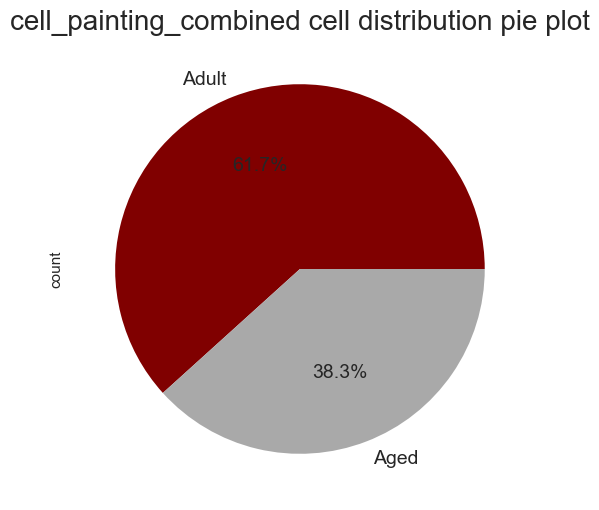

In [13]:
"""
Plots the fraction of number of cells for each Age group
"""
#TODO: change the pie into a histogram, make for loop for each experiment or add dictionary color mapping

# plt.rcParams["figure.figsize"] = (8,6)
# plt.figure()
# plot_title = f"cell_painting_3_22 cell distribution pie plot"
# data_df_3_22.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','lightskyblue','darkgray'])
# plt.title(plot_title, fontsize=20)


# plt.rcParams["figure.figsize"] = (8,6)
# plt.figure()
# plot_title = f"cell_painting_3_24 cell distribution pie plot"
# data_df_3_24.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['lightskyblue', 'maroon', 'darkgray'])
# plt.title(plot_title, fontsize=20)

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plot_title = f"cell_painting_combined cell distribution pie plot"
data_df_combined.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','darkgray'])
plt.title(plot_title, fontsize=20)

In [21]:
data_df_combined.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type', 'Field']).mean().reset_index()

Exp Well ID    Age         Sample     Type  Field  \
0     3_22  (2, 2)  Adult  3_22 Adult S1  3_22 S1      1   
1     3_22  (2, 2)  Adult  3_22 Adult S1  3_22 S1      2   
2     3_22  (2, 2)  Adult  3_22 Adult S1  3_22 S1      3   
3     3_22  (2, 2)  Adult  3_22 Adult S1  3_22 S1      4   
4     3_22  (2, 2)  Adult  3_22 Adult S1  3_22 S1      5   
...    ...     ...    ...            ...      ...    ...   
2156  9_19  (4, 4)   Aged   9_19 Aged S2  9_19 S2    120   
2157  9_19  (4, 4)   Aged   9_19 Aged S2  9_19 S2    121   
2158  9_19  (4, 4)   Aged   9_19 Aged S2  9_19 S2    122   
2159  9_19  (4, 4)   Aged   9_19 Aged S2  9_19 S2    123   
2160  9_19  (4, 4)   Aged   9_19 Aged S2  9_19 S2    131   

      DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                       -0.055200                    0.596749   
1                        0.035586                   -0.781123   
2                        0.355258                   -0.427997   
3                        0.058671                   -0.517094   
4                        0.161780                   -0.370078   
...                           ...                         ...   
2156                     0.240214                    0.173660   
2157                     0.030758                    0.143757   
2158                     0.170545                    0.776789   
2159                    -0.352972                   -0.315161   
2160                     0.252878                    0.270841   

      Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               0.121676            0.113400  ...             0.432727   
1               0.321593            0.611223  ...            -0.210094   
2               0.441889            0.558998  ...            -0.265838   
3              -0.091352            0.091493  ...             0.423372   
4               0.143256            0.302454  ...            -0.522712   
...                  ...                 ...  ...                  ...   
2156           -0.102481           -0.104895  ...            -0.425150   
2157            0.342823            0.482005  ...            -0.003240   
2158           -0.045517            0.135005  ...             0.003909   
2159            0.480999            0.427751  ...             0.257737   
2160            0.010757           -0.076010  ...             0.251520   

      Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              0.419841                   0.035351                  0.235608   
1             -0.184517                  -0.406191                  0.680323   
2             -0.291867                  -0.224396                  0.828127   
3              0.398909                  -0.200545                  0.107489   
4             -0.524825                  -0.336587                  0.533651   
...                 ...                        ...                       ...   
2156          -0.526995                   0.334359                  0.458916   
2157          -0.029812                  -0.421723                  2.067652   
2158           0.026661                   0.009093                  1.025435   
2159          -0.514599                  -0.465726                  6.747050   
2160           0.167360                  -0.053896                  0.157551   

      Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                     0.157971                 0.335842   0.262420   
1                    -0.325611                 0.543539   1.197763   
2                    -0.368068                 0.492444   0.883129   
3                    -0.002112                 0.137294   0.198295   
4                    -0.122883                 0.773444   0.888369   
...                        ...                      ...        ...   
2156                  0.448154                 0.527457   0.458559   
2157                 -0.298034                 1.364681   3.384913   
2158                  0.1

In [66]:
well_df = data_df_combined.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop(['Field', 'Exp', 
                                                                                                'Well ID','Type', 'Age'], axis=1)
well_df.head()

Sample  DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0  3_22 Adult S1                     0.237044                    0.026926   
1  3_22 Adult S2                    -0.068600                    0.341373   
2   3_22 Aged S1                     0.143475                    0.097793   
3   3_22 Aged S2                     0.139075                   -0.097048   
4  3_24 Adult S1                    -0.337171                    0.274251   

   Actin texture spot  Actin texture hole  Actin texture edge  \
0            0.229958            0.304686            0.136809   
1           -0.102566           -0.269765            0.123017   
2            0.138003            0.293150           -0.013878   
3           -0.107873           -0.303681            0.312883   
4           -0.018625           -0.164947            0.204881   

   Actin texture ridge  Actin texture valley  Actin texture saddle  \
0             0.238818              0.337207              0.305778   
1             0.212853              0.026756              0.035242   
2             0.136047              0.225044              0.212547   
3             0.269057              0.108237              0.174118   
4             0.225440              0.149168              0.210357   

   Actin texture bright  ...  Mito texture bright  Mito texture dark  \
0              0.215822  ...            -0.034913          -0.014700   
1              0.099492  ...             0.146244           0.122331   
2              0.109056  ...            -0.028796           0.001003   
3              0.124610  ...             0.099725           0.110869   
4              0.122054  ...             0.180478           0.172905   

   Actin cyto intensity mean  Actin cyto intensity sum  \
0                  -0.036701                  0.458000   
1                   0.799604                  0.481177   
2                  -0.059570                  0.390279   
3                   0.791479                  0.488294   
4                   0.538049                  0.100883   

   Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                  0.006422                 0.455587   0.543124   
1                  0.454950                 0.268190   0.065552   
2                  0.060688                 0.369627   0.449974   
3                  0.399853                 0.256385   0.068247   
4                  0.308770                 0.006475  -0.006846   

   Cell roundness  Cell width  Cell length  
0       -0.261617    0.250456     0.286865  
1        0.436650    0.280292     0.029316  
2       -0.210095    0.185288     0.256176  
3        0.427977    0.130341     0.097471  
4        0.431524    0.260747    -0.112453  

[5 rows x 26 columns]

In [71]:
well_df = well_df.set_index('Sample')

In [73]:
well_df

DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
Sample                                                                   
3_22 Adult S1                     0.237044                    0.026926   
3_22 Adult S2                    -0.068600                    0.341373   
3_22 Aged S1                      0.143475                    0.097793   
3_22 Aged S2                      0.139075                   -0.097048   
3_24 Adult S1                    -0.337171                    0.274251   
3_24 Adult S2                     0.457722                   -0.370592   
3_24 Aged S1                     -0.009526                   -0.146151   
3_24 Aged S2                      0.018317                   -0.250505   
9_11 Adult S1                     0.011330                    0.034777   
9_11 Adult S2                    -0.241722                   -0.409791   
9_11 Aged S1                      0.794666                    0.621527   
9_11 Aged S2                      0.120367                    0.136598   
9_18 Adult S1                    -0.260865                   -0.409314   
9_18 Adult S2                     0.003792                   -0.002822   
9_18 Aged S1                     -0.310960                   -0.348960   
9_18 Aged S2                     -0.030312                   -0.014912   
9_19 Adult S1                    -0.121457                   -0.122262   
9_19 Adult S2                    -0.174316                    0.039310   
9_19 Aged S1                     -0.045573                   -0.027654   
9_19 Aged S2                     -0.242684                   -0.311535   

               Actin texture spot  Actin texture hole  Actin texture edge  \
Sample                                                                      
3_22 Adult S1            0.229958            0.304686            0.136809   
3_22 Adult S2           -0.102566           -0.269765            0.123017   
3_22 Aged S1             0.138003            0.293150           -0.013878   
3_22 Aged S2            -0.107873           -0.303681            0.312883   
3_24 Adult S1           -0.018625           -0.164947            0.204881   
3_24 Adult S2            0.289316            0.293031            0.185221   
3_24 Aged S1             0.068729           -0.012141            0.283750   
3_24 Aged S2             0.161979            0.137848            0.036021   
9_11 Adult S1            0.068858            0.060582            0.203949   
9_11 Adult S2            0.488731            0.542835           -0.036385   
9_11 Aged S1            -0.336160           -0.491778            0.811696   
9_11 Aged S2             0.197077           -0.010569            0.337183   
9_18 Adult S1            0.454827            0.643950           -0.083178   
9_18 Adult S2            0.276081            0.269387            0.148263   
9_18 Aged S1             0.314428            0.420219           -0.145358   
9_18 Aged S2             0.103016            0.111195            0.205266   
9_19 Adult S1            0.333546            0.432804            0.148817   
9_19 Adult S2            0.213861            0.138915            0.135552   
9_19 Aged S1             0.069375            0.106532            0.163072   
9_19 Aged S2             0.382347            0.411034           -0.083367   

               Actin texture ridge  Actin texture valley  \
Sample                                                     
3_22 Adult S1             0.238818              0.337207   
3_22 Adult S2             0.212853              0.026756   
3_22 Aged S1              0.136047              0.225044   
3_22 Aged S2              0.269057              0.108237   
3_24 Adult S1             0.225440              0.149168   
3_24 Adult S2             0.331260              0.387139   
3_24 Aged S1              0.396426              0.327703   
3_24 Aged S2              0.222143              0.209947   
9_11 Adult S1            -0.055607              0.004581   
9_11 Adult S2             0.285

In [78]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = squareform(pdist(well_df, metric='euclidean'))

distance_df = pd.DataFrame(distance_matrix, index=well_df.index, columns=well_df.index)

distance_df

Sample         3_22 Adult S1  3_22 Adult S2  3_22 Aged S1  3_22 Aged S2  \
Sample                                                                    
3_22 Adult S1       0.000000       1.674096      0.352361      1.586185   
3_22 Adult S2       1.674096       0.000000      1.541100      0.583797   
3_22 Aged S1        0.352361       1.541100      0.000000      1.518355   
3_22 Aged S2        1.586185       0.583797      1.518355      0.000000   
3_24 Adult S1       1.664834       0.713440      1.510598      0.905822   
3_24 Adult S2       0.598286       1.966449      0.828253      1.727982   
3_24 Aged S1        1.007266       0.995551      1.019400      0.806757   
3_24 Aged S2        0.631765       1.367803      0.568730      1.237502   
9_11 Adult S1       1.230463       1.209587      1.159128      1.259703   
9_11 Adult S2       1.065285       2.284987      1.142125      2.177139   
9_11 Aged S1        2.414748       1.720133      2.383214      1.668037   
9_11 Aged S2        1.101476       1.755412      1.247833      1.621406   
9_18 Adult S1       1.004712       2.176550      1.047821      2.103379   
9_18 Adult S2       0.845508       1.451177      0.837983      1.424956   
9_18 Aged S1        1.067941       1.844821      0.960875      1.809903   
9_18 Aged S2        1.045628       1.241174      0.867342      1.195616   
9_19 Adult S1       0.949701       1.950920      1.054958      1.885944   
9_19 Adult S2       1.004537       1.213462      0.830268      1.182140   
9_19 Aged S1        1.175361       0.939775      0.980058      0.928211   
9_19 Aged S2        1.028936       2.166676      1.033438      2.079201   

Sample         3_24 Adult S1  3_24 Adult S2  3_24 Aged S1  3_24 Aged S2  \
Sample                                                                    
3_22 Adult S1       1.664834       0.598286      1.007266      0.631765   
3_22 Adult S2       0.713440       1.966449      0.995551      1.367803   
3_22 Aged S1        1.510598       0.828253      1.019400      0.568730   
3_22 Aged S2        0.905822       1.727982      0.806757      1.237502   
3_24 Adult S1       0.000000       1.987653      0.953120      1.280138   
3_24 Adult S2       1.987653       0.000000      1.200782      0.833554   
3_24 Aged S1        0.953120       1.200782      0.000000      0.675983   
3_24 Aged S2        1.280138       0.833554      0.675983      0.000000   
9_11 Adult S1       1.365986       1.483947      0.986366      1.003687   
9_11 Adult S2       2.111062       1.067081      1.532890      1.082701   
9_11 Aged S1        2.004544       2.534721      2.013005      2.353620   
9_11 Aged S2        1.569704       1.271822      1.037057      1.118514   
9_18 Adult S1       2.066411       1.119026      1.495721      1.024050   
9_18 Adult S2       1.445060       1.038673      0.907489      0.754986   
9_18 Aged S1        1.694907       1.236486      1.265486      0.818039   
9_18 Aged S2        1.209626       1.241287      0.965807      0.783458   
9_19 Adult S1       1.959780       1.034488      1.303585      1.029604   
9_19 Adult S2       0.931805       1.297288      0.836486      0.680090   
9_19 Aged S1        0.848970       1.426192      0.790922      0.789293   
9_19 Aged S2        2.037423       1.073439      1.514461      1.018274   

Sample         9_11 Adult S1  9_11 Adult S2  9_11 Aged S1  9_11 Aged S2  \
Sample                                                                    
3_22 Adult S1       1.230463       1.065285      2.414748      1.101476   
3_22 Adult S2       1.209587       2.284987      1.720133      1.755412   
3_22 Aged S1        1.159128       1.142125      2.383214      1.247833   
3_22 Aged S2        1.259703       2.177139      1.668037      1.621406   
3_24 Adult S1       1.365986       2.111062      2.004544      1.569704   
3_24 Adult S2       1.483947       1.067081      2.534721      1.271822   
3_24 Aged S1        0.986366       1.532890      2.013005      1.037057   
3_24 Aged S2        1.0

<Axes: xlabel='Sample', ylabel='Sample'>

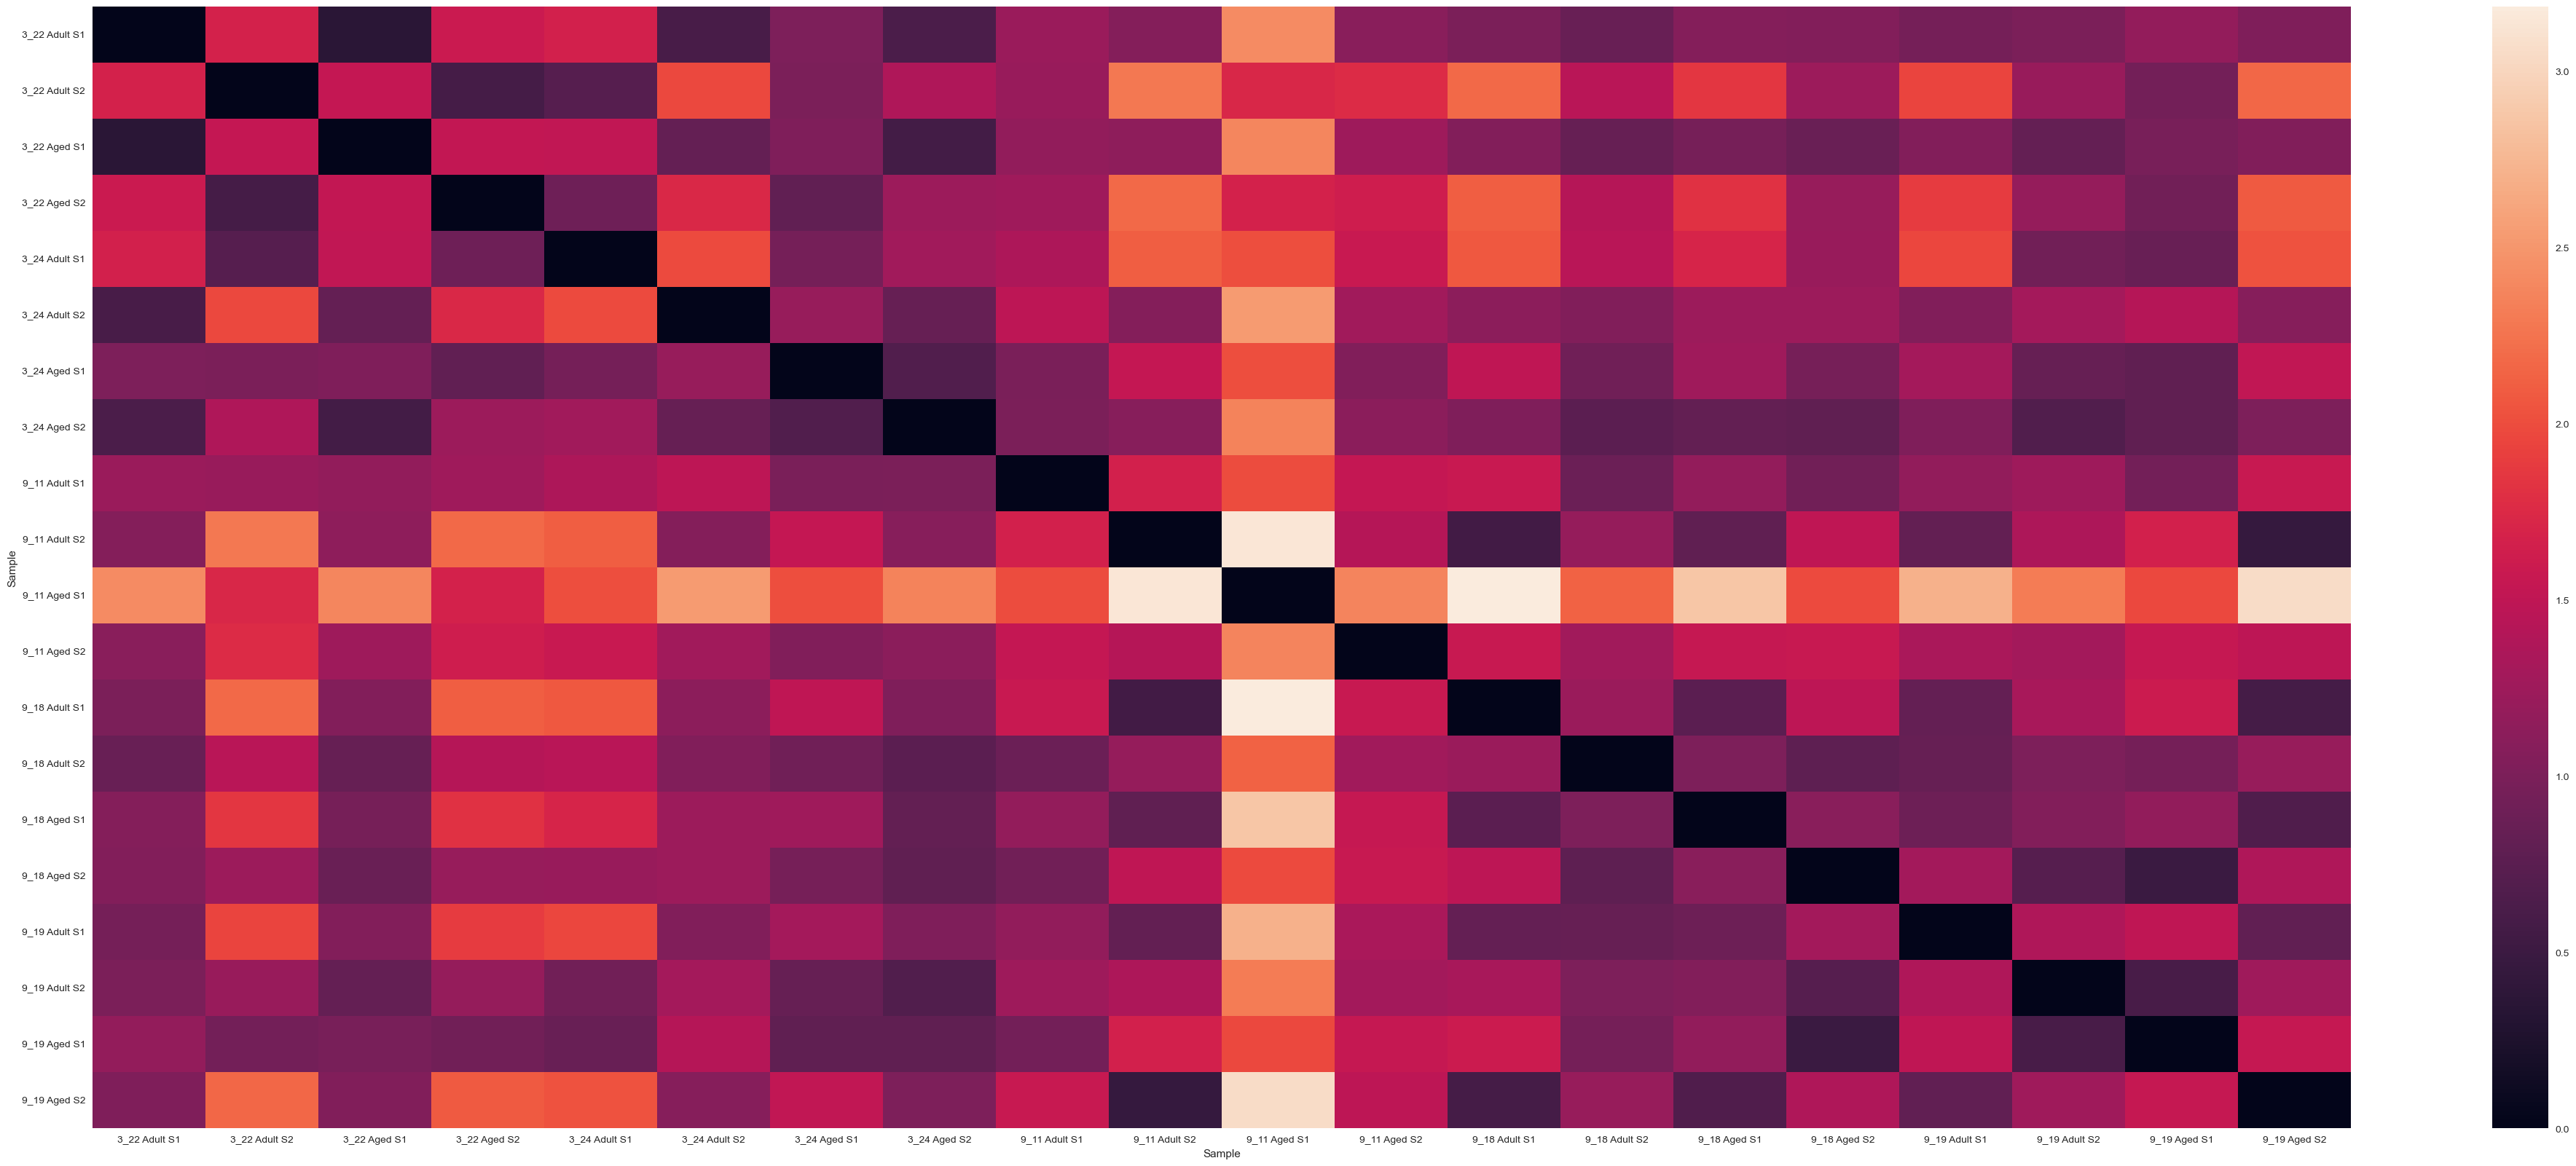

In [79]:
sns.heatmap(distance_df)

### PCA visualization

In [33]:
def PCA_calc(data_df):
    
    relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index().drop('Field', axis=1)
    # if curr_exp == "cell painting combination":
    #     style_type = 'Exp'
    # else:
    # # relevant_data_df = data_df.groupby(['Well ID','Age']).mean().reset_index()
    #     style_type = None
    age_label = relevant_data_df['Age']

    relevant_np = np.array(relevant_data_df.loc[:, relevant_features])

    pca = PCA(n_components=2)
    pca_np = pca.fit_transform(relevant_np)

    relevant_data_df["pca_dim1"] = pca_np[:, 0]
    relevant_data_df["pca_dim2"] = pca_np[:, 1]
    relevant_data_df["Age"] = age_label

    return relevant_data_df

def PCA_viz(relevant_data_df, plot_title):

    plt.figure(figsize=(10,10))
    plt.title(plot_title)
    ax = sns.scatterplot(
        x="pca_dim1", y ="pca_dim2", 
        hue="Age",
        style='Exp',
        data=relevant_data_df,
        legend="full",
        palette=age_color_map,
        s = 50)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    plt.legend(fontsize=15)
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    plt.tick_params(direction='out',length=3, width=1, colors='black')
    legend = ax.legend(fontsize=15, bbox_to_anchor=(1, 0.6))
    legend.set_title(None)
    plt.show()


def TSNE_calc(data_df):
    #NO AGE EXP MAP

    #relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type']).mean().reset_index()
    relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample', 'Type', 'Field']).mean().reset_index()
    age_label = relevant_data_df['Age']
    relevant_np = np.array(relevant_data_df.loc[:, relevant_features])
    tsne = TSNE(n_components=2)
    tsne_np = tsne.fit_transform(relevant_np)
    relevant_data_df["tsne_dim1"] = tsne_np[:, 0]
    relevant_data_df["tsne_dim2"] = tsne_np[:, 1]
    relevant_data_df["Age"] = age_label
    return relevant_data_df

def TSNE_viz(relevant_data_df, plot_title):
    style_type = "Exp"
    plt.figure(figsize=(10,10))
    plt.title(plot_title)
    ax = sns.scatterplot(
        x="tsne_dim1", y="tsne_dim2",
        hue="Age",
        style=style_type,
        data=relevant_data_df,
        legend="full",
        palette=age_color_map,
        s = 50,
        marker='o')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    plt.tick_params(direction='out',length=3, width=1, colors='black')
    legend = ax.legend(fontsize=15, bbox_to_anchor=(1, 0.6))
    legend.set_title(None)
    plt.show()
        

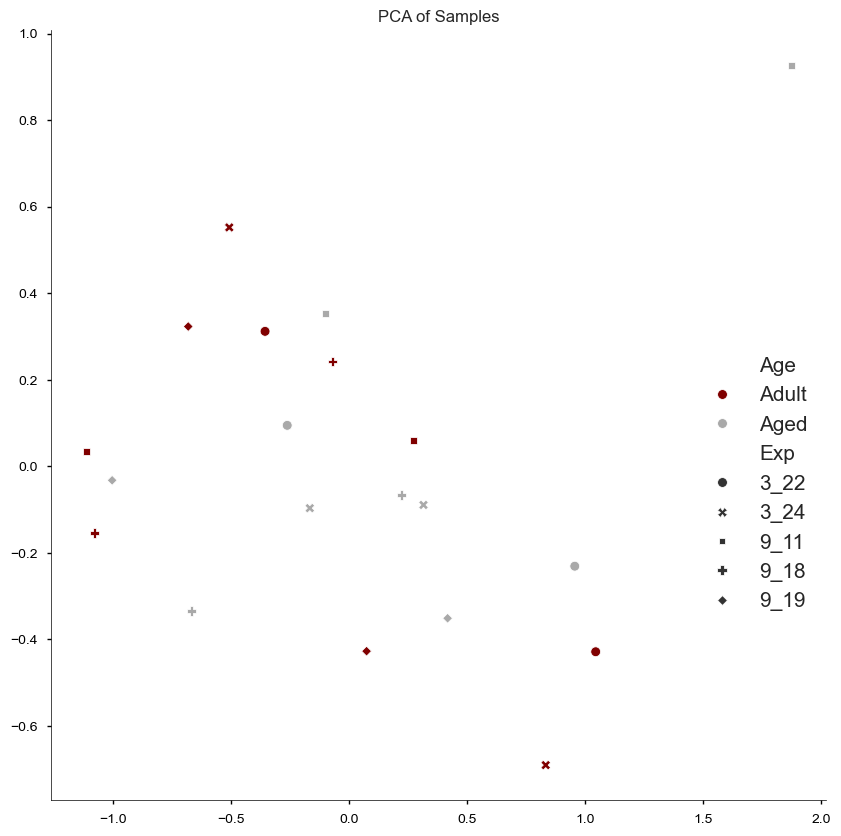

In [23]:
pca_df = PCA_calc(data_df_combined)
PCA_viz(pca_df, "PCA of Samples")

In [34]:
tsne_df = TSNE_calc(data_df_combined)

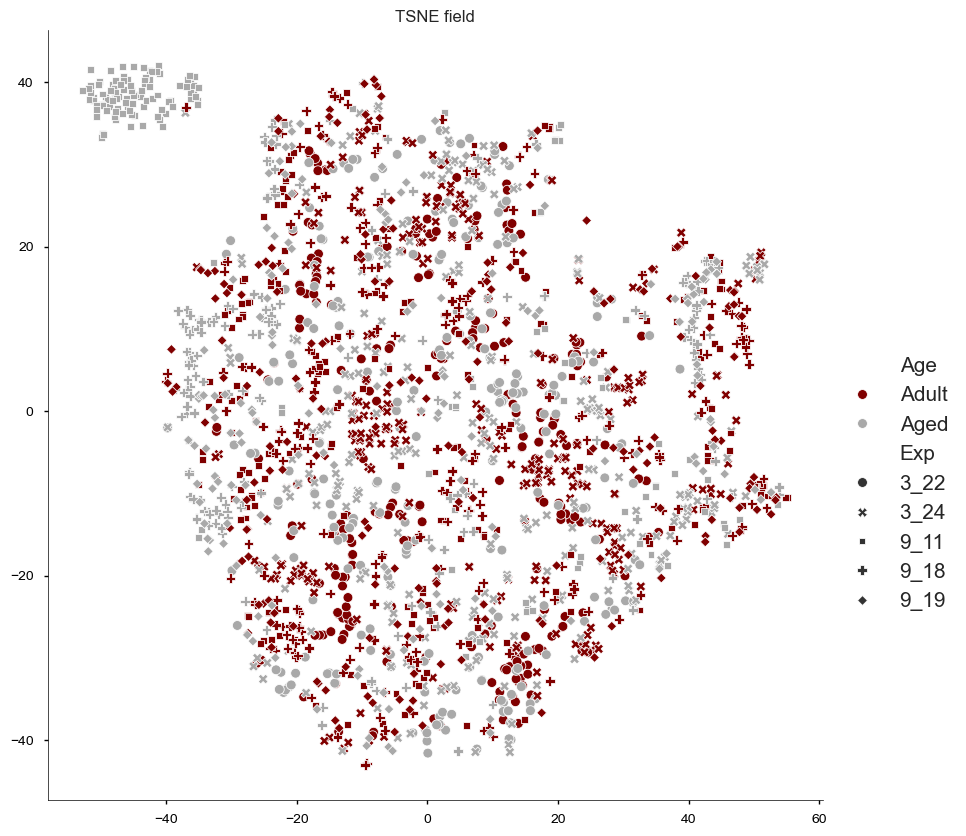

In [41]:
TSNE_viz(tsne_df, "TSNE field")

In [44]:
age_experiment_map = {
    
    "Adult vs Aged": ['Ad', 'Ag']
    
}

### Anova feature importance

In [50]:
"""
Plots the mean value for each feature grouped by age
Features are ranked by their ANOVA F-value importance
The plot also shows the F-value
"""

def viz_ANOVA_feat_ranking(data_df, curr_exp, num_features=20):



     for age_exp in age_experiment_map:

        #data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
    
        relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
        age_label = list(data_df['Age'])
        y = age_label
        X = deepcopy(relevant_data_df)
        X = RobustScaler().fit_transform(X)
        univariate_selector = SelectKBest().fit(X,y)
        idx = univariate_selector.get_support(True)
        selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                        index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
        selected_features = selected_features[: num_features]
        print(f"Number of features selected: {len(selected_features)}")
        # Modify relevant_columbus_visualization
        relevant_data_df = relevant_data_df.loc[:, selected_features.index.tolist()]
        # scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(relevant_data_df, columns=relevant_data_df.columns)
        vis_df['Age'] = y
        yerr = vis_df.groupby('Age').sem().T

        plt.rcParams["figure.figsize"] = (30,10)
        plt.figure()
        plot_title = f"{age_exp} {curr_exp} feature ranking and F-value"
        # ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, width=0.7, color=age_color_map)
        ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7, color=age_color_map)
        plt.legend(fontsize=30)
        ax.set_ylabel('Feature Value Means')
        plt.xticks(fontsize=30, rotation=90)
        plt.title(plot_title, fontsize=50)
        ax = ax.twinx()
        #selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
        vis_df.plot(ax=ax, style='k*',  markersize=20,alpha=1)
        ax.set_ylabel('Scores')
        plt.legend(fontsize=10,loc=(1,.99))
        plt.show()



        if curr_exp == "cell painting combination":
            vis_df['Exp'] = list(data_df['Exp'])
            plt.rcParams["figure.figsize"] = (50,20)
            plt.figure()
            plot_title = f"{age_exp} {curr_exp} feature ranking grouped by experiment and F-value"
            # ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, width=0.7)
            ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7)
            plt.legend(fontsize=30)
            ax.set_ylabel('Feature Value Means')
            plt.xticks(fontsize=30, rotation=90)
            plt.title(plot_title, fontsize=50)
            ax = ax.twinx()
            selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
            ax.set_ylabel('Scores')
            plt.legend(fontsize=10,loc=(1,.99))
            plt.show()


    

In [47]:
def ANOVA_feat_ranking(data_df, num_features=20):
    relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
    age_label = list(data_df['Age'])
    y = age_label
    X = deepcopy(relevant_data_df)
    X = RobustScaler().fit_transform(X)
    univariate_selector = SelectKBest().fit(X,y)
    idx = univariate_selector.get_support(True)
    selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                     index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
    selected_features = selected_features[: num_features]
    print(f"Number of features selected: {len(selected_features)}")
    # Modify relevant_columbus_visualization
    relevant_data_df = relevant_data_df.loc[:, selected_features.index.tolist()]
    # scaled_features = StandardScaler().fit_transform(relevant_data_df)
    vis_df = pd.DataFrame(relevant_data_df, columns=relevant_data_df.columns)
    vis_df['Age'] = y
    return vis_df, selected_features 

def viz_ANOVA_feat_ranking_group(vis_df, selected_features, plot_title):
    
    plt.rcParams["figure.figsize"] = (30,10)
    plt.figure()
    # ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, width=0.7, color=age_color_map)
    yerr = vis_df.groupby('Age').sem().T
    ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7, color=age_color_map)
    plt.legend(fontsize=30)
    ax.set_ylabel('Feature Value Means')
    plt.xticks(fontsize=30, rotation=90)
    plt.title(plot_title, fontsize=50)
    ax = ax.twinx()
    selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
    ax.set_ylabel('Scores')
    plt.legend(fontsize=10,loc=(1,.99))
    plt.show()
    
    
def viz_ANOVA_feat_ranking_exp(data_df, vis_df, selected_features, plot_title):
    
    vis_df['Exp'] = list(data_df['Exp'])
    plt.rcParams["figure.figsize"] = (50,20)
    plt.figure()
    # ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, width=0.7)
    yerr = vis_df.groupby('Age').sem().T
    ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7)
    plt.legend(fontsize=30)
    ax.set_ylabel('Feature Value Means')
    plt.xticks(fontsize=30, rotation=90)
    plt.title(plot_title, fontsize=50)
    ax = ax.twinx()
    selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
    ax.set_ylabel('Scores')
    plt.legend(fontsize=10,loc=(1,.99))
    plt.show()


Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

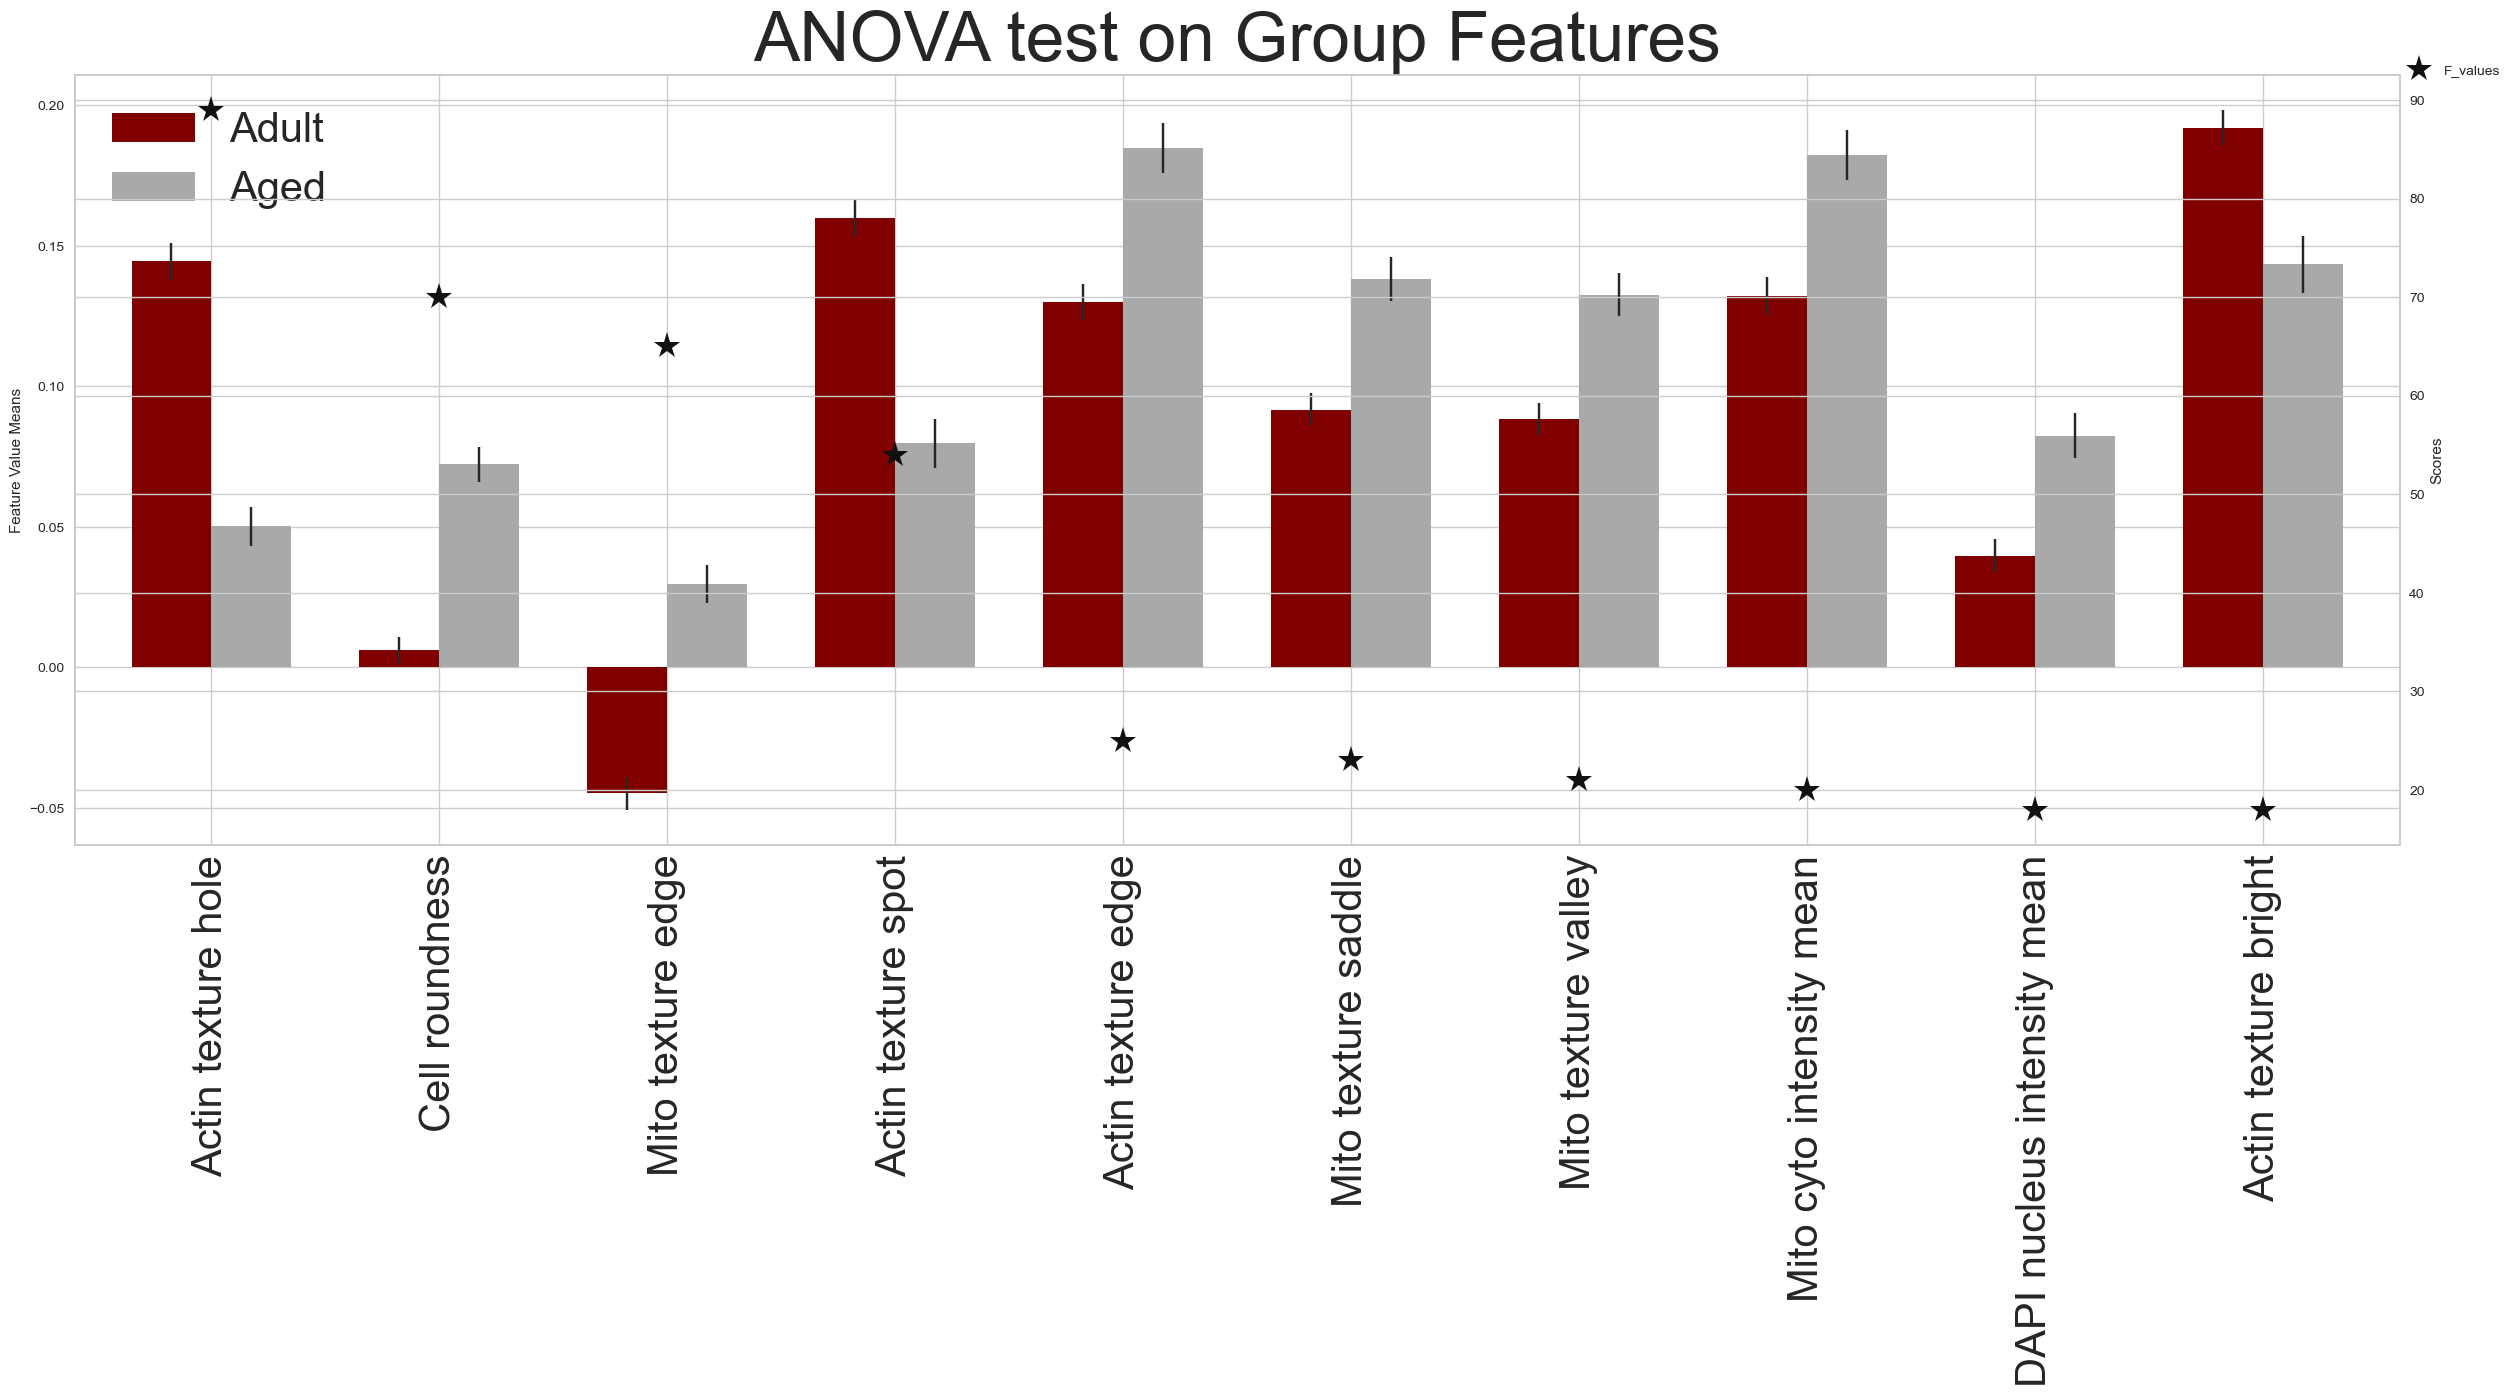

<Figure size 5000x2000 with 0 Axes>

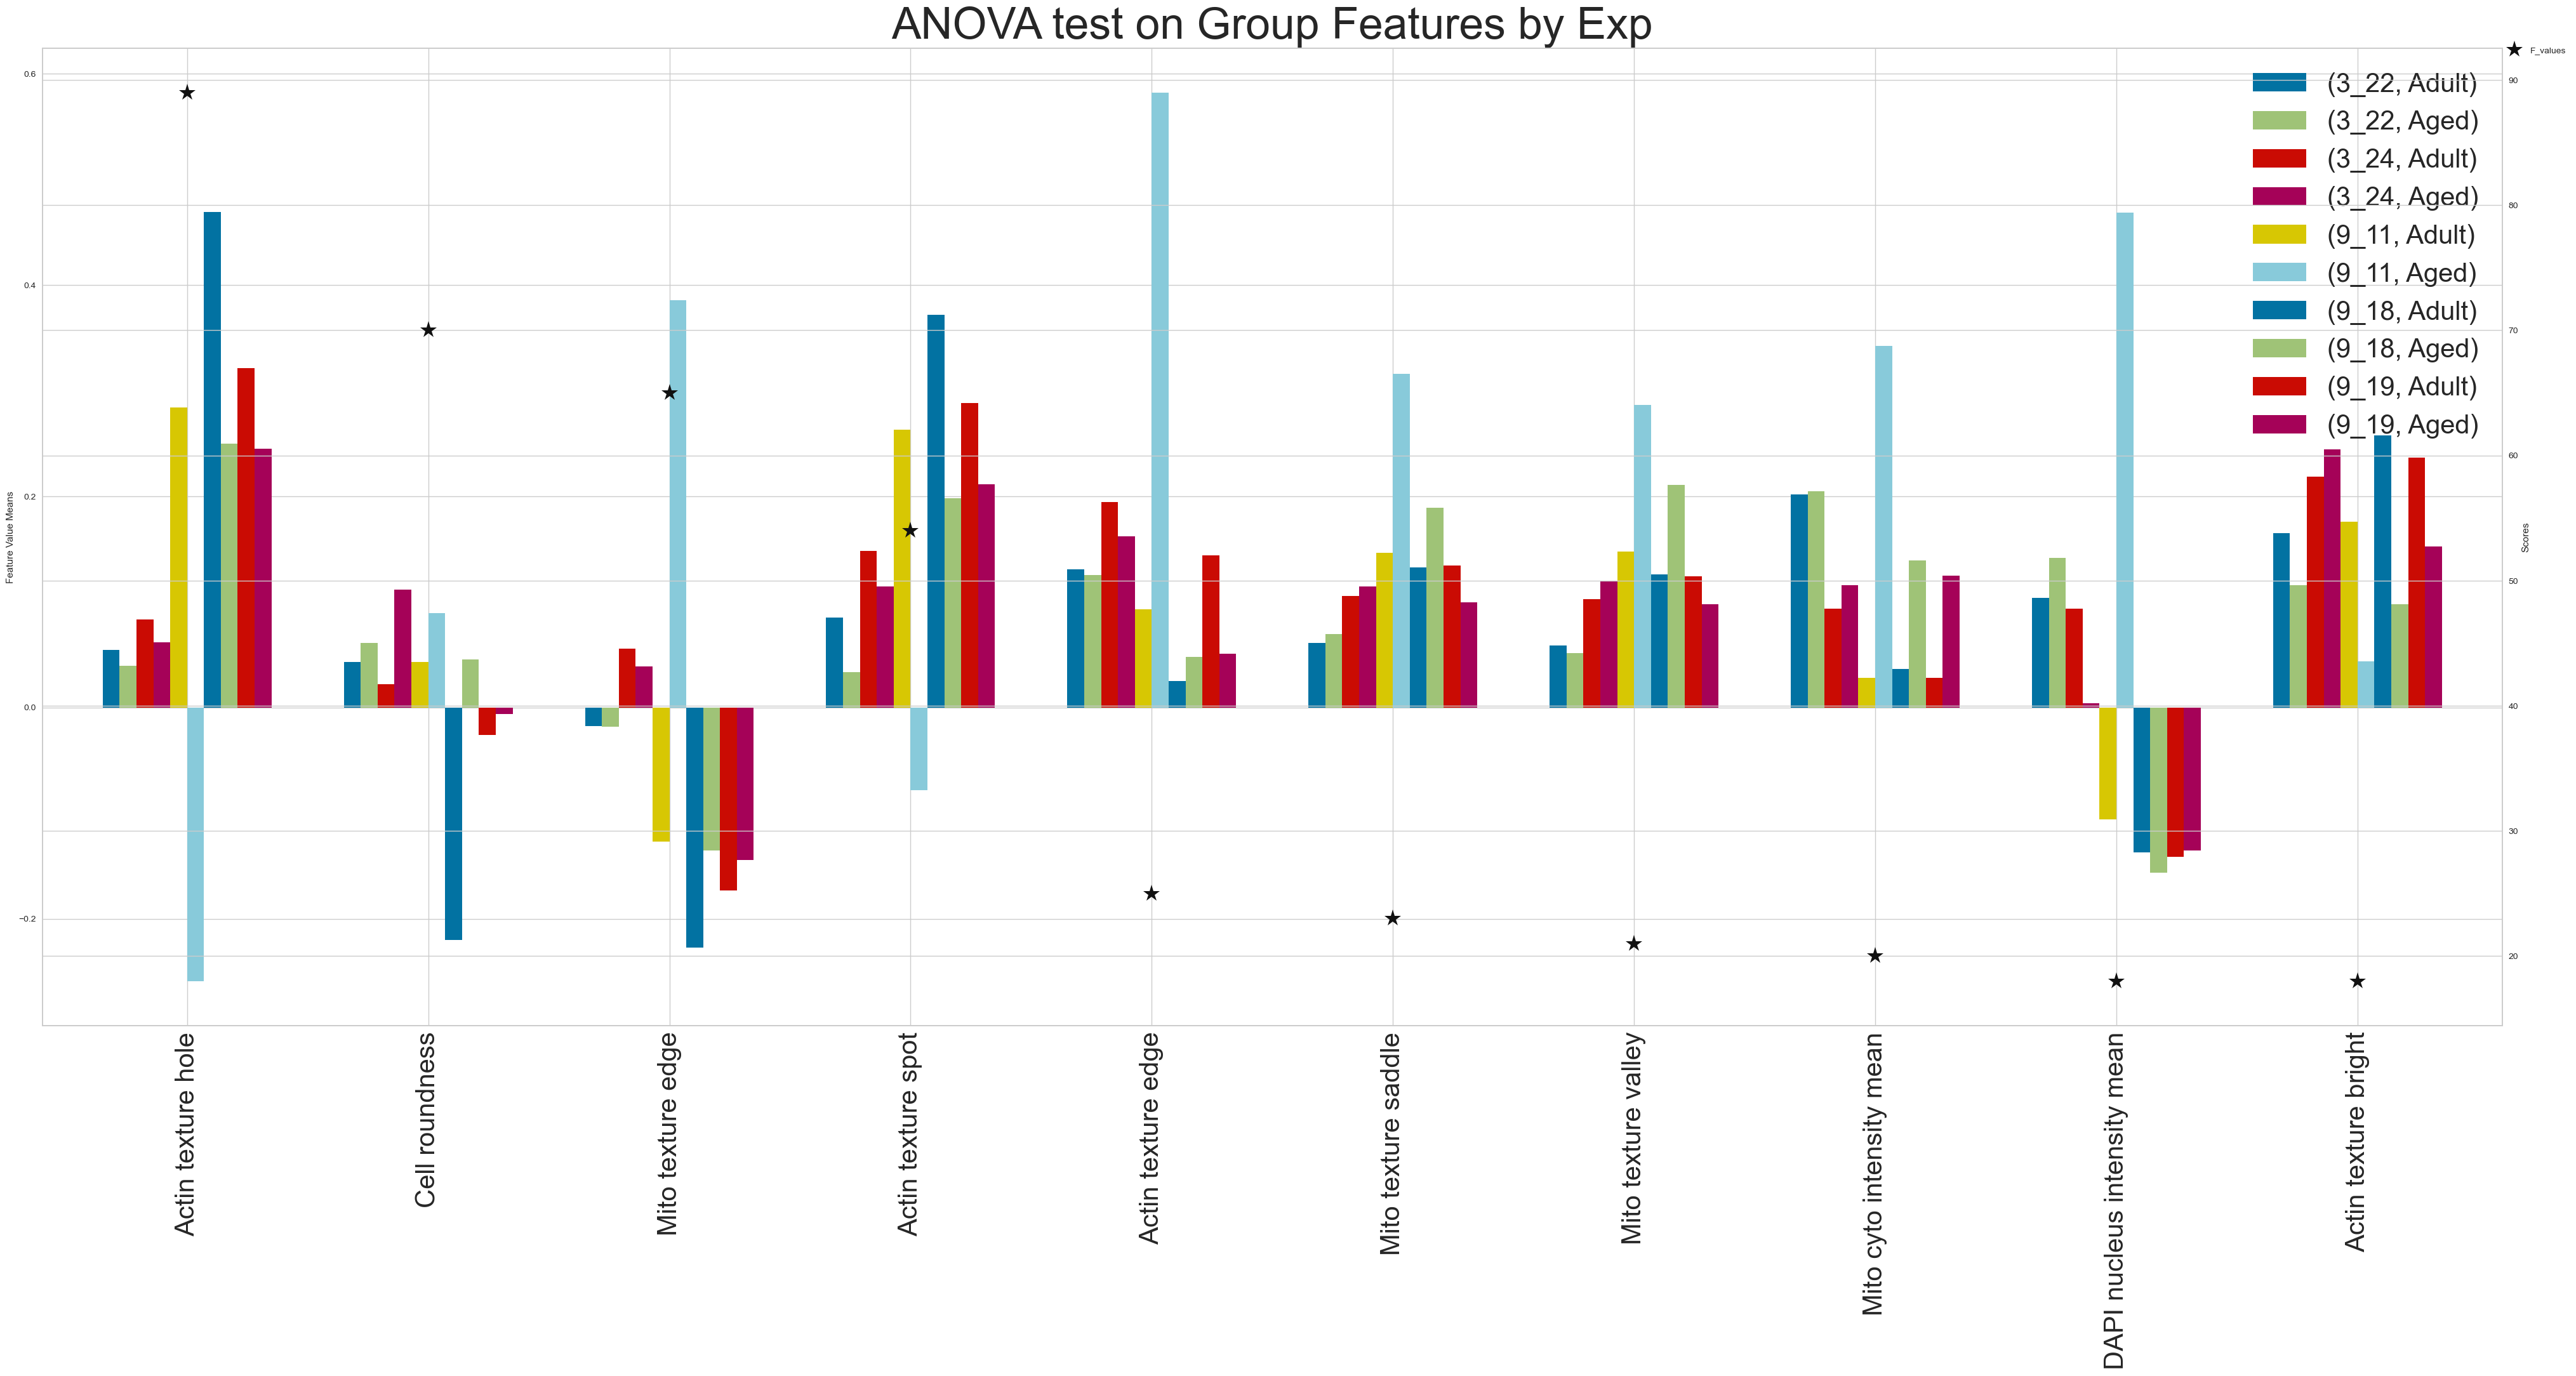

In [61]:
viz_df, selected_features = ANOVA_feat_ranking(data_df_combined, num_features=20)
viz_ANOVA_feat_ranking_group(viz_df, selected_features, "ANOVA test on Group Features")
viz_ANOVA_feat_ranking_exp(data_df_combined, viz_df, selected_features, "ANOVA test on Group Features by Exp")

In [57]:
selected_features

F_values
Actin texture hole                 89
Cell roundness                     70
Mito texture edge                  65
Actin texture spot                 54
Actin texture edge                 25
Mito texture saddle                23
Mito texture valley                21
Mito cyto intensity mean           20
DAPI nucleus intensity mean        18
Actin texture bright               18

In [ ]:
def viz_ANOVA_feat_ranking(data_df, curr_exp, num_features=20):
    relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
    age_label = list(data_df['Age'])
    y = age_label
    X = deepcopy(relevant_data_df)
    X = RobustScaler().fit_transform(X)
    univariate_selector = SelectKBest().fit(X,y)
    idx = univariate_selector.get_support(True)
    selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                     index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
    selected_features = selected_features[: num_features]
    print(f"Number of features selected: {len(selected_features)}")
    # Modify relevant_columbus_visualization
    relevant_data_df = relevant_data_df.loc[:, selected_features.index.tolist()]
    # scaled_features = StandardScaler().fit_transform(relevant_data_df)
    vis_df = pd.DataFrame(relevant_data_df, columns=relevant_data_df.columns)
    vis_df['Age'] = y

    
    yerr = vis_df.groupby('Age').sem().T

        plt.rcParams["figure.figsize"] = (30,10)
        plt.figure()
        plot_title = f"{age_exp} {curr_exp} feature ranking and F-value"
        # ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, width=0.7, color=age_color_map)
        ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7, color=age_color_map)
        plt.legend(fontsize=30)
        ax.set_ylabel('Feature Value Means')
        plt.xticks(fontsize=30, rotation=90)
        plt.title(plot_title, fontsize=50)
        ax = ax.twinx()
        #selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
        vis_df.plot(ax=ax, style='k*',  markersize=20,alpha=1)
        ax.set_ylabel('Scores')
        plt.legend(fontsize=10,loc=(1,.99))
        plt.show()



        if curr_exp == "cell painting combination":
            vis_df['Exp'] = list(data_df['Exp'])
            plt.rcParams["figure.figsize"] = (50,20)
            plt.figure()
            plot_title = f"{age_exp} {curr_exp} feature ranking grouped by experiment and F-value"
            # ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, width=0.7)
            ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7)
            plt.legend(fontsize=30)
            ax.set_ylabel('Feature Value Means')
            plt.xticks(fontsize=30, rotation=90)
            plt.title(plot_title, fontsize=50)
            ax = ax.twinx()
            selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
            ax.set_ylabel('Scores')
            plt.legend(fontsize=10,loc=(1,.99))
            plt.show()

In [42]:
data_df_combined

Exp Well ID  Field    Age         Sample     Type  \
0      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
1      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
2      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
3      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
4      3_22  (2, 2)      1  Adult  3_22 Adult S1  3_22 S1   
...     ...     ...    ...    ...            ...      ...   
28943  9_19  (4, 4)    123   Aged   9_19 Aged S2  9_19 S2   
28944  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   
28945  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   
28946  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   
28947  9_19  (4, 4)    131   Aged   9_19 Aged S2  9_19 S2   

       DAPI nucleus intensity mean  DAPI nucleus intensity sum  \
0                        -0.551728                    4.603804   
1                        -0.653592                   -0.654524   
2                        -0.800411                    0.102936   
3                        -0.065392                    0.356169   
4                         0.414287                    0.322815   
...                            ...                         ...   
28943                     0.014084                    0.212258   
28944                     0.059642                    0.324385   
28945                     0.266119                    0.277447   
28946                     0.381816                    0.233105   
28947                     0.303935                    0.248429   

       Actin texture spot  Actin texture hole  ...  Mito texture bright  \
0               -0.659380           -0.410470  ...            -0.253857   
1                1.644321            0.815784  ...             1.078635   
2                0.597449            0.429114  ...             0.145450   
3               -0.104486           -0.021137  ...             1.194069   
4               -0.673020           -0.564213  ...             0.077728   
...                   ...                 ...  ...                  ...   
28943            0.673417            0.933268  ...            -0.337488   
28944            0.124237            0.000000  ...             0.502869   
28945           -0.220682           -0.189808  ...             0.345650   
28946           -0.103694           -0.368378  ...             0.364761   
28947            0.243166            0.254145  ...            -0.207199   

       Mito texture dark  Actin cyto intensity mean  Actin cyto intensity sum  \
0              -0.253574                   1.761702                  3.085083   
1               0.986686                  -0.409930                 -0.479359   
2               0.127086                   1.168038                  0.795241   
3               0.558204                   0.450016                 -0.309129   
4               0.143658                   1.044714                 -0.038483   
...                  ...                        ...                       ...   
28943          -0.215573                  -0.613669                 14.303295   
28944           0.445661                  -0.134617                  0.361803   
28945           0.070515                  -0.001266                 -0.296913   
28946           0.393638                   0.293037                 -0.506515   
28947          -0.240375                  -0.372739                  1.071827   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.718117                 3.183574   1.476258   
1                     -0.674686                -0.560473  -0.245810   
2                      0.633632                 0.519892   0.243556   
3                      0.297146                -0.289947  -0.351467   
4                      0.128350                -0.287763  -0.366523   
...                         ...                      ...        ...   
28943                 -0.491079                 8.033772  25.137229   
28944                 -0.305190         

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

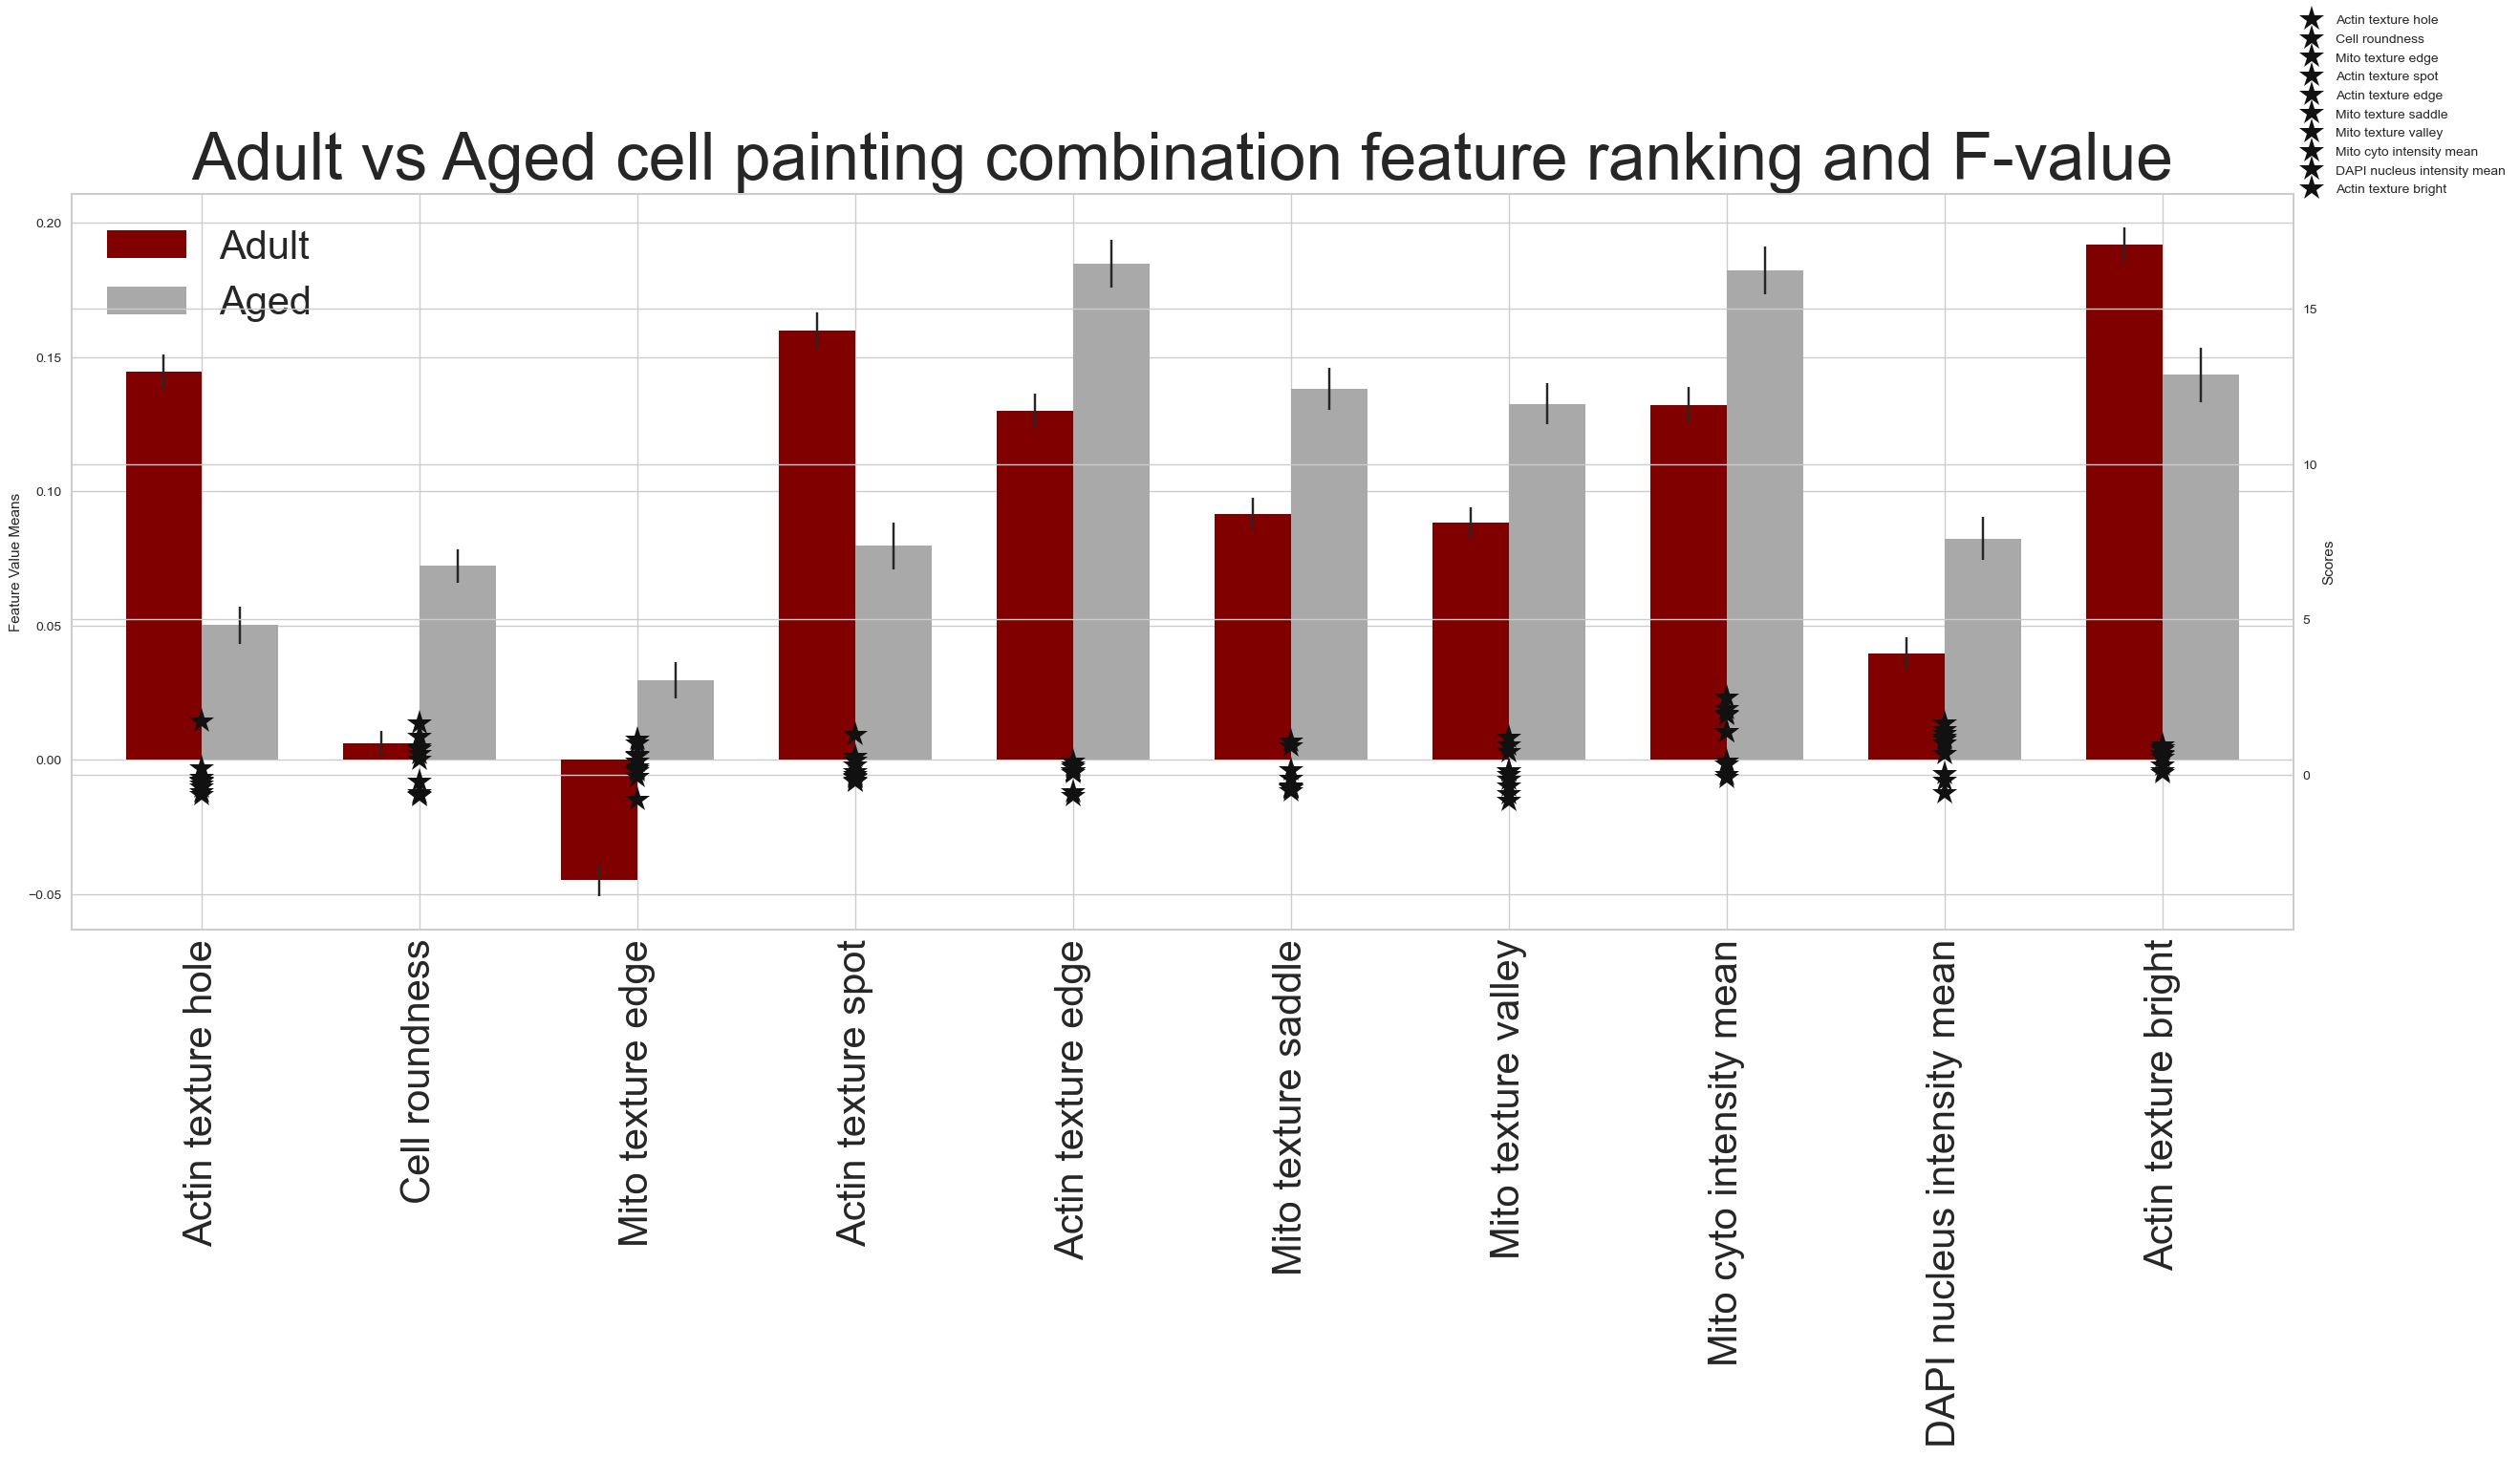

<Figure size 5000x2000 with 0 Axes>

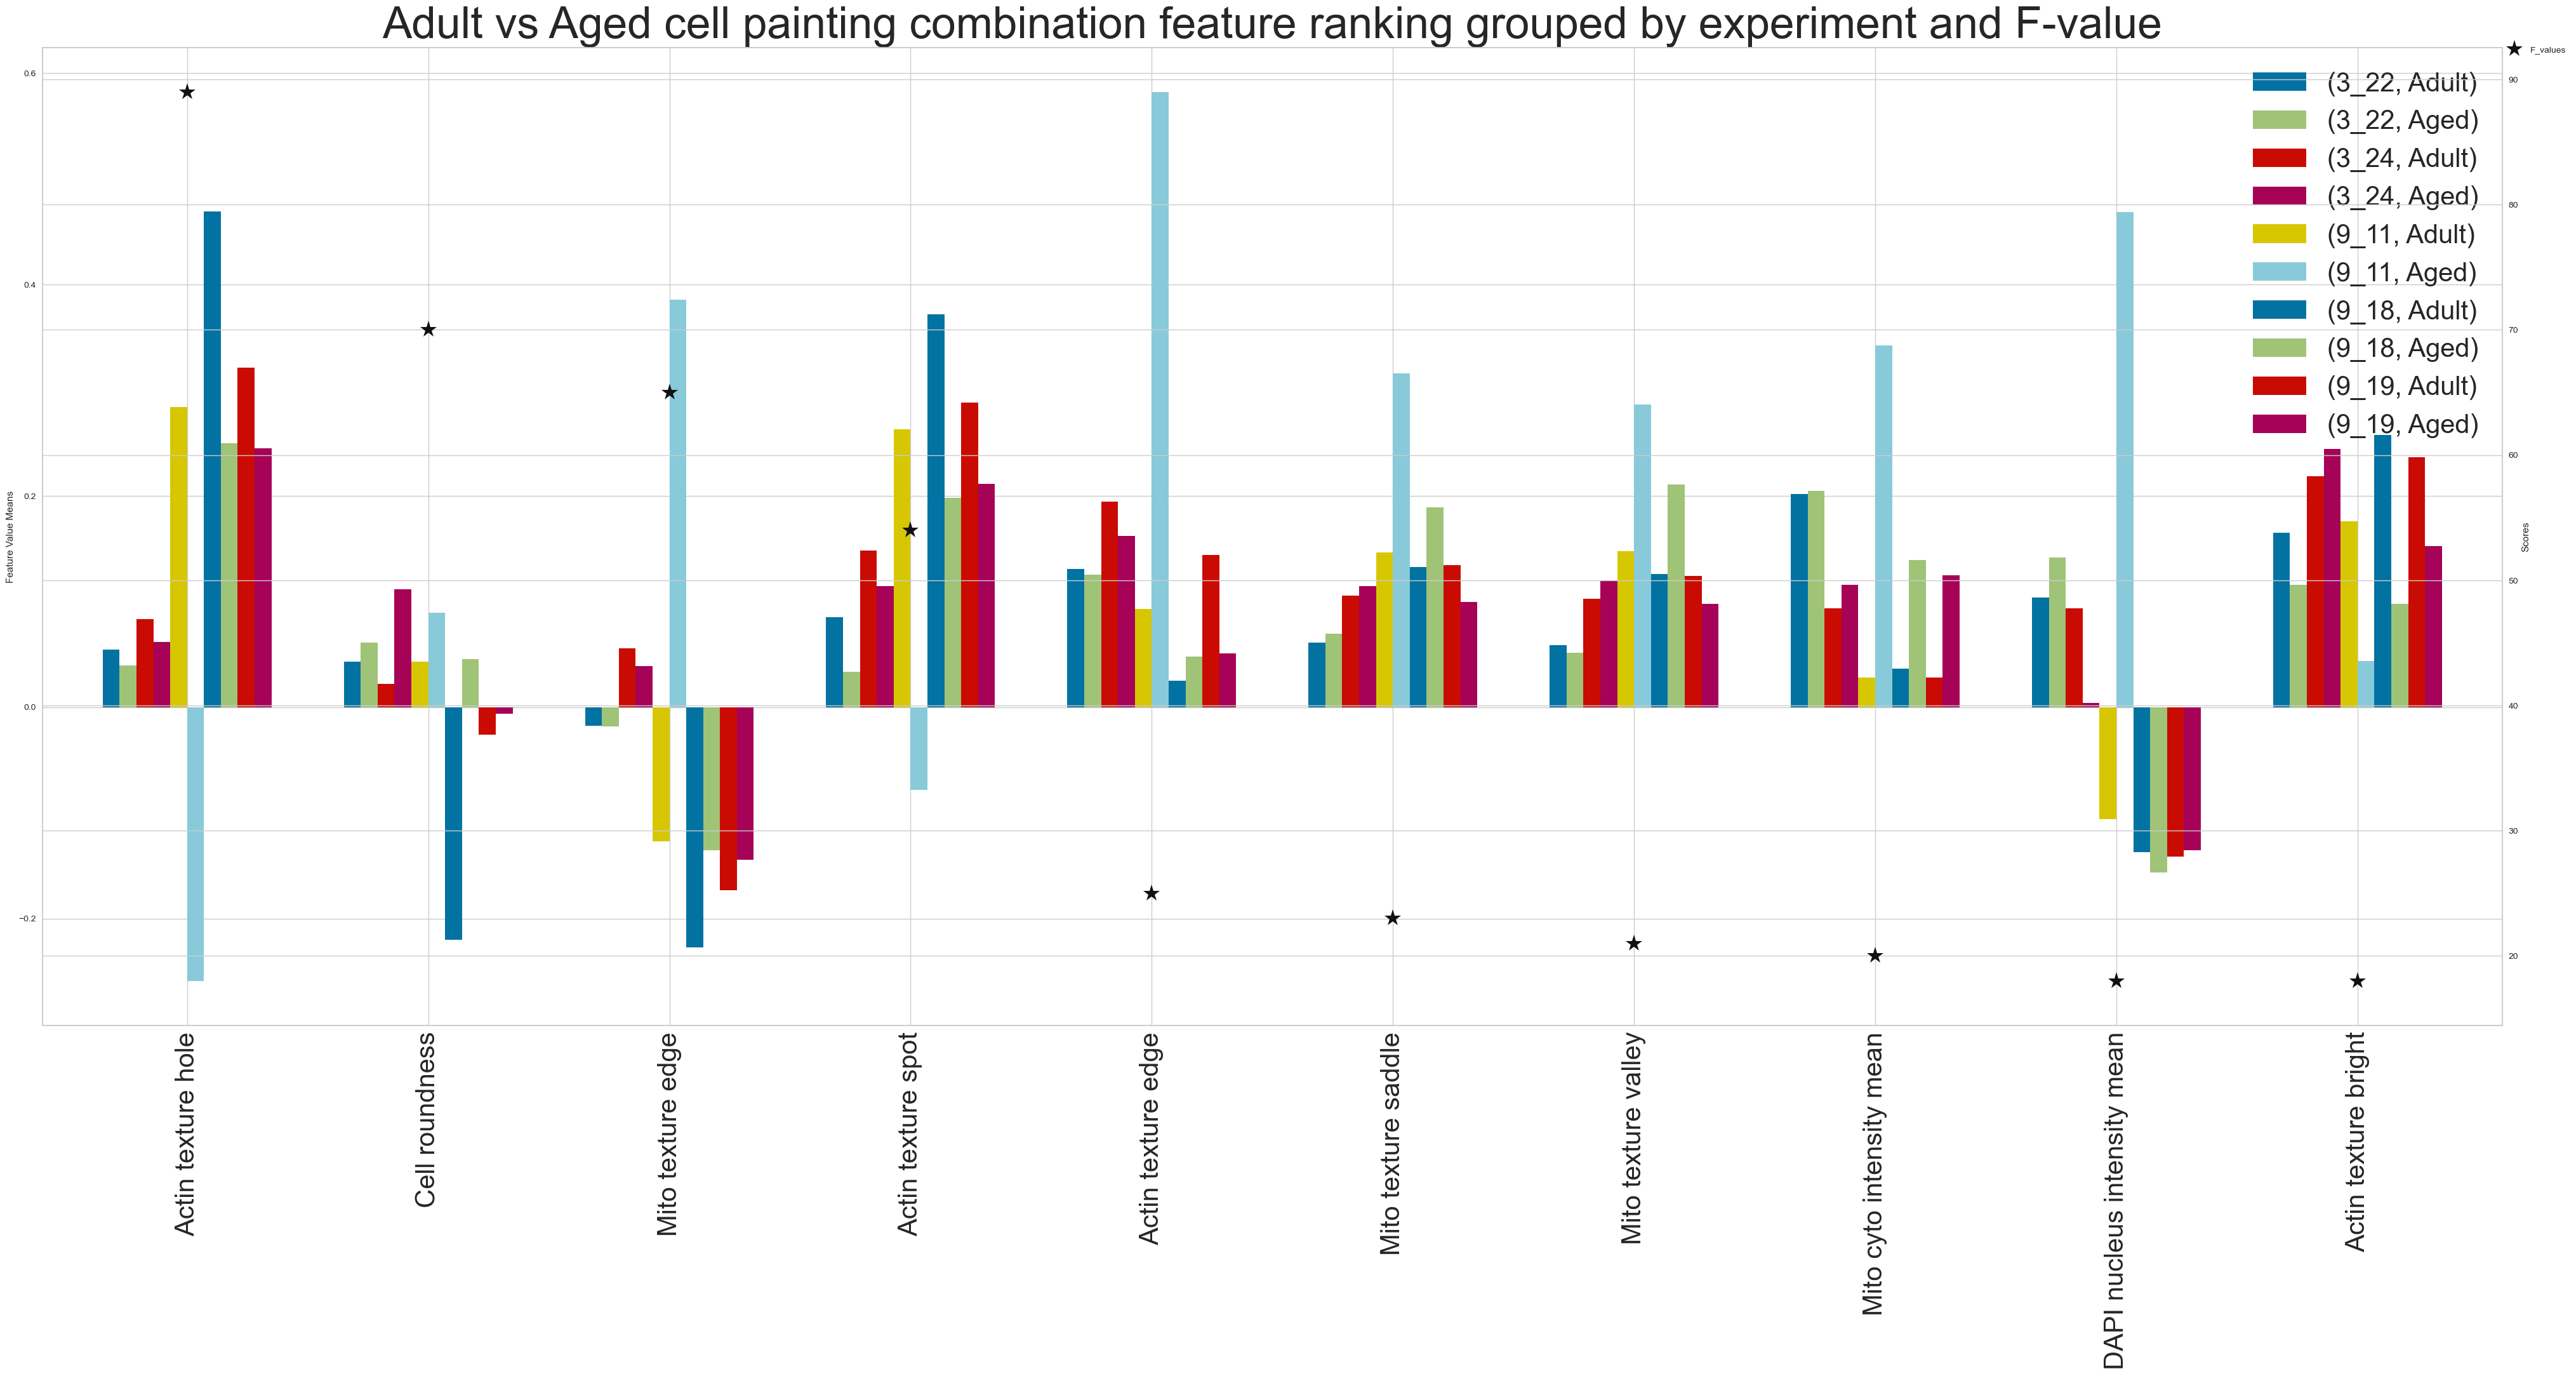

In [51]:
#viz_ANOVA_feat_ranking(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#viz_ANOVA_feat_ranking(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
viz_ANOVA_feat_ranking(data_df=data_df_combined, curr_exp="cell painting combination")

## Clustering Analysis

### Kmeans clustering and percentage

In [17]:
def viz_clustering_analysis(data_df_all, curr_exp):


    return_df = None

    ## NO AGE EXP MAP
    for age_exp in age_experiment_map:
        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
        clustering_data_df = deepcopy(data_df)
        relevant_data_df = deepcopy(data_df.loc[:, relevant_features])

        plot_title = f"{age_exp} KMeans clustering elbow for {curr_exp}"
        plt.rcParams["figure.figsize"] = (6,4)
        plt.figure()
        X = deepcopy(relevant_data_df)
        X = StandardScaler().fit_transform(X)

        """
        Viz 1: Elbow plot
        """
        elbow_vis = KElbowVisualizer(KMeans(), title=plot_title).fit(X)
        plt.title(plot_title)
        elbow_vis.show()

        


        """
        Viz 2: KMeans count pie plot
        """
        num_clusters = elbow_vis.elbow_value_  #min(elbow_vis.elbow_value_, 3)
        kmeans = KMeans(num_clusters, random_state=23).fit(X)
            
        plt.rcParams["figure.figsize"] = (5,5)
        plot_title = f'{age_exp} Distribution of Cluster categories for {curr_exp}'
        clustering_data_df['kmeans_clustering'] = kmeans.labels_
        clustering_data_df['kmeans_clustering'] = ["Cluster "+str(int(item)+1) for item in clustering_data_df['kmeans_clustering']]
        clustering_data_df.kmeans_clustering.value_counts().plot.pie(fontsize=14, autopct='%.1f%%')
        plt.title(plot_title, fontsize=20)


        """
        Viz 3: Cluster distribution plot
        """
        plt.rcParams["figure.figsize"] = (15,10)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by age per cluster'
        ax = clustering_data_df.groupby('Age').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50, color=age_color_map)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=15, rotation=0)
        plt.yticks(fontsize=15, rotation=0)
        ax.legend(fontsize=15,bbox_to_anchor=(1, 0.6))



        """
        Viz 4: Cluster distribution per Well ID plot
        """
        plt.rcParams["figure.figsize"] = (15,10)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by Well per cluster'
        if curr_exp == 'cell painting combination':
            ax = clustering_data_df.groupby(['Exp', 'Age']).kmeans_clustering.value_counts().unstack(2).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        else:
            ax = clustering_data_df.groupby('Well ID').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=15, rotation=0)
        plt.yticks(fontsize=15, rotation=0)
        ax.legend(fontsize=15,bbox_to_anchor=(1, 0.6))

        if age_exp == "All groups":
            return_df = clustering_data_df

    return return_df 

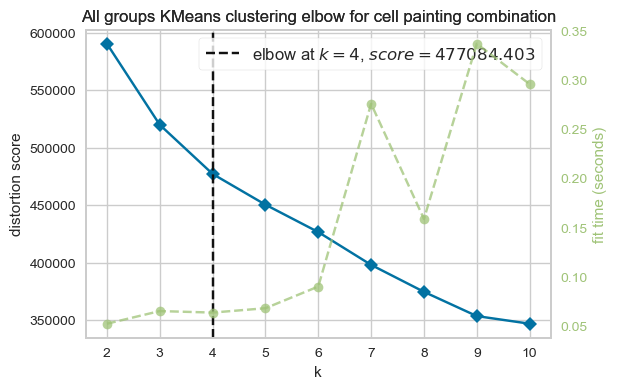

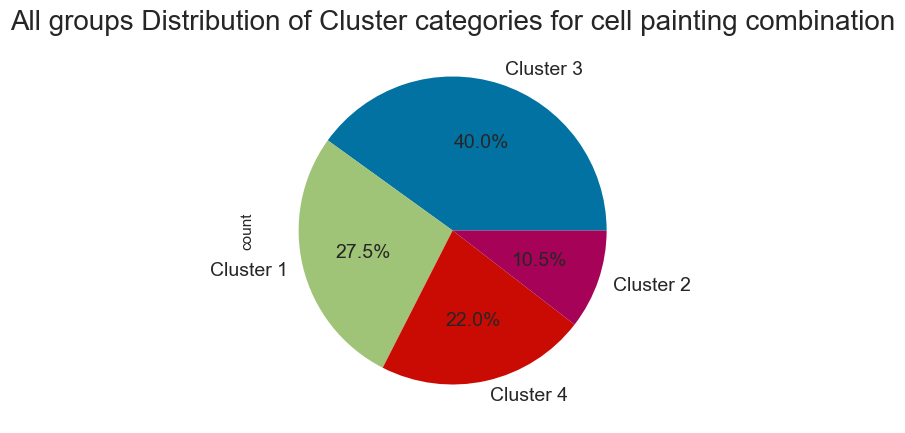

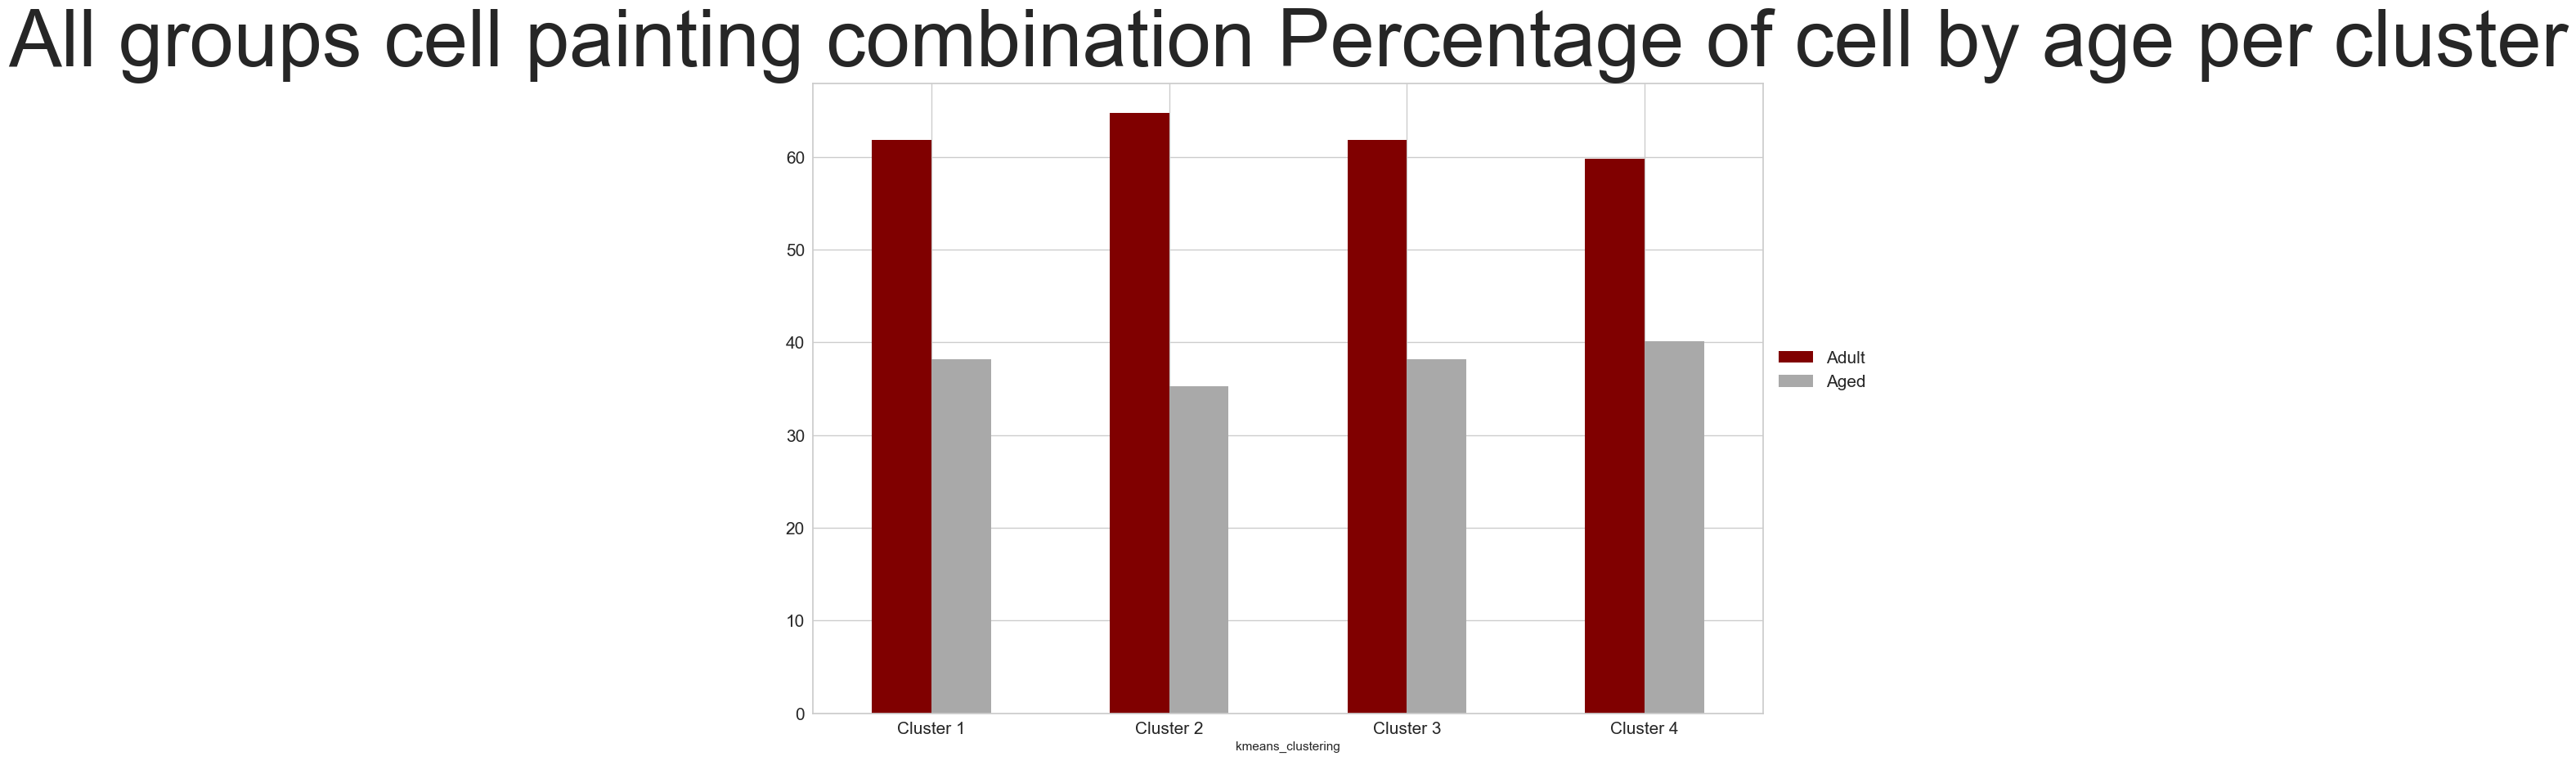

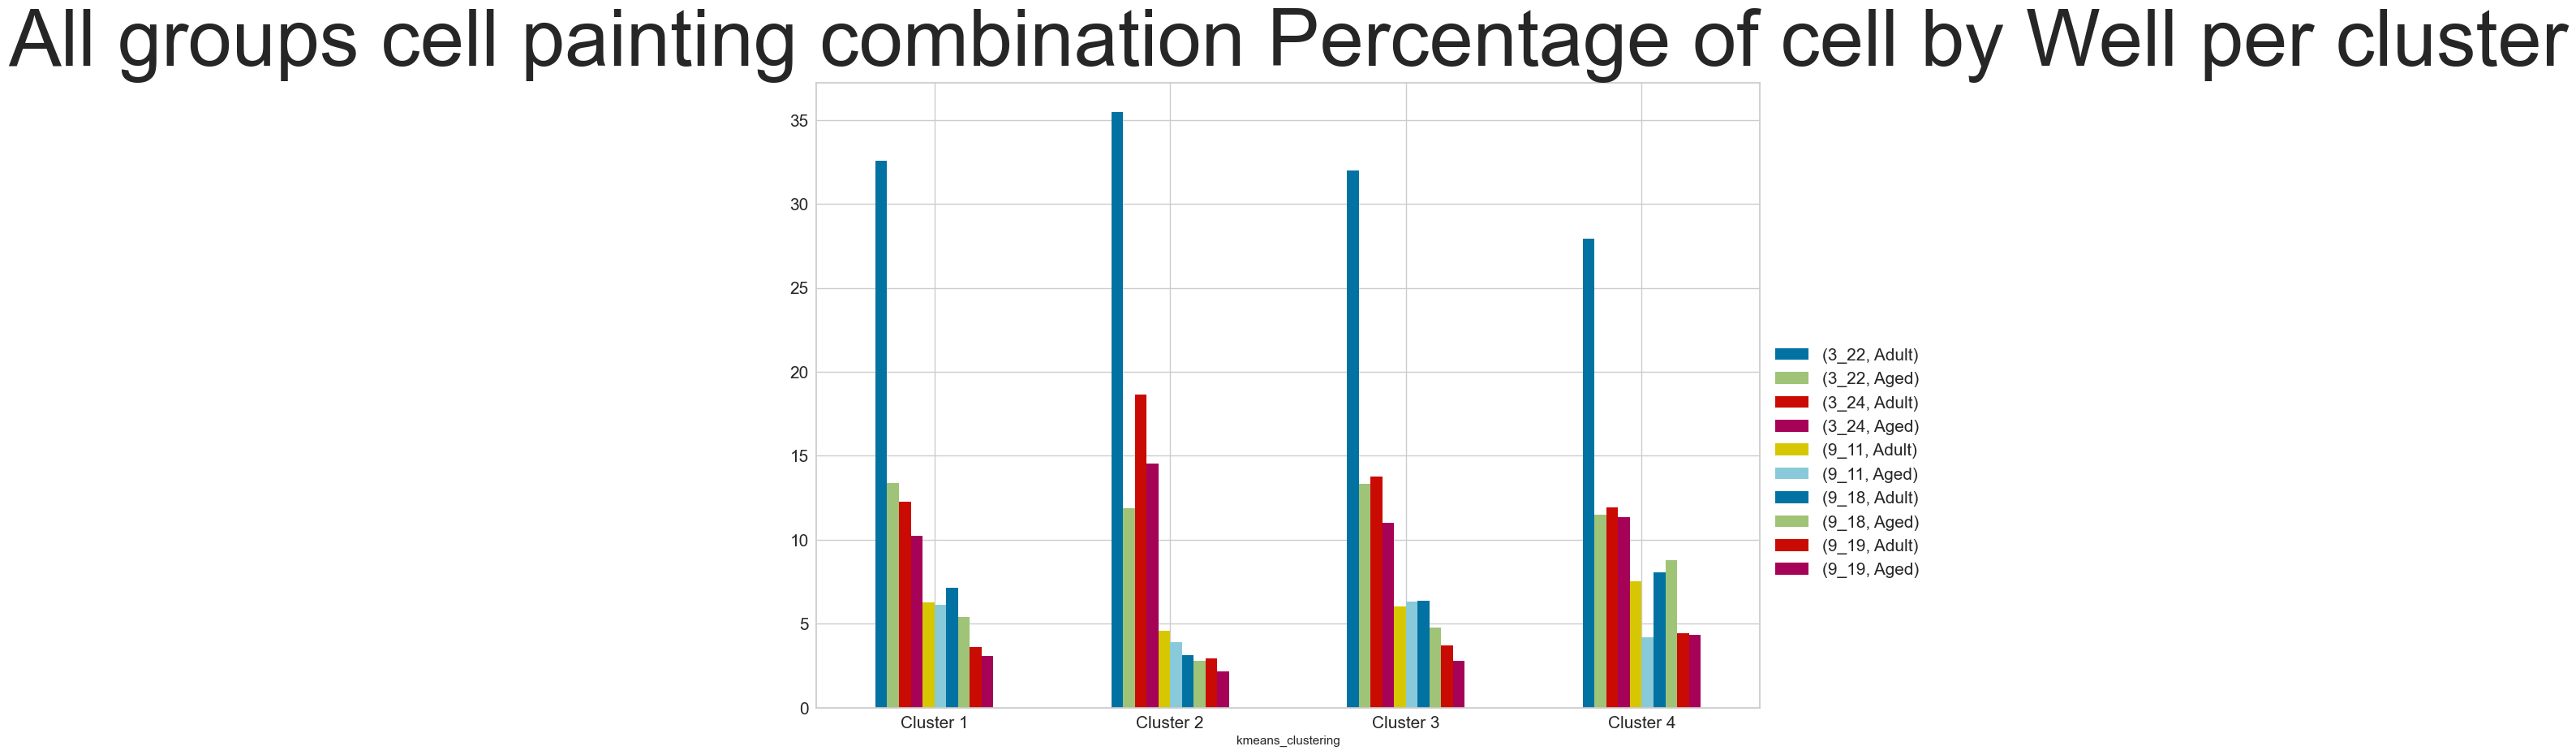

In [18]:
#clustering_data_df_3_22 = viz_clustering_analysis(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#clustering_data_df_3_24 = viz_clustering_analysis(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
clustering_data_df_combined = viz_clustering_analysis(data_df_all=data_df_combined, curr_exp="cell painting combination")

In [19]:
data_df_combined

Exp Well ID  Field    Age   Sample  DAPI nucleus intensity mean  \
0      3_22  (2, 2)      1  Adult  3_22 S1                    -0.551728   
1      3_22  (2, 2)      1  Adult  3_22 S1                    -0.653592   
2      3_22  (2, 2)      1  Adult  3_22 S1                    -0.800411   
3      3_22  (2, 2)      1  Adult  3_22 S1                    -0.065392   
4      3_22  (2, 2)      1  Adult  3_22 S1                     0.414287   
...     ...     ...    ...    ...      ...                          ...   
28943  9_19  (4, 4)    123   Aged  9_19 S2                     0.014084   
28944  9_19  (4, 4)    131   Aged  9_19 S2                     0.059642   
28945  9_19  (4, 4)    131   Aged  9_19 S2                     0.266119   
28946  9_19  (4, 4)    131   Aged  9_19 S2                     0.381816   
28947  9_19  (4, 4)    131   Aged  9_19 S2                     0.303935   

       DAPI nucleus intensity sum  Actin texture spot  Actin texture hole  \
0                        4.603804           -0.659380           -0.410470   
1                       -0.654524            1.644321            0.815784   
2                        0.102936            0.597449            0.429114   
3                        0.356169           -0.104486           -0.021137   
4                        0.322815           -0.673020           -0.564213   
...                           ...                 ...                 ...   
28943                    0.212258            0.673417            0.933268   
28944                    0.324385            0.124237            0.000000   
28945                    0.277447           -0.220682           -0.189808   
28946                    0.233105           -0.103694           -0.368378   
28947                    0.248429            0.243166            0.254145   

       Actin texture edge  ...  Mito texture bright  Mito texture dark  \
0               -0.088995  ...            -0.253857          -0.253574   
1               -0.232516  ...             1.078635           0.986686   
2                1.018482  ...             0.145450           0.127086   
3               -0.235089  ...             1.194069           0.558204   
4                0.307566  ...             0.077728           0.143658   
...                   ...  ...                  ...                ...   
28943           -0.724692  ...            -0.337488          -0.215573   
28944            0.061150  ...             0.502869           0.445661   
28945            0.007032  ...             0.345650           0.070515   
28946            0.278857  ...             0.364761           0.393638   
28947            0.077910  ...            -0.207199          -0.240375   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       1.761702                  3.085083   
1                      -0.409930                 -0.479359   
2                       1.168038                  0.795241   
3                       0.450016                 -0.309129   
4                       1.044714                 -0.038483   
...                          ...                       ...   
28943                  -0.613669                 14.303295   
28944                  -0.134617                  0.361803   
28945                  -0.001266                 -0.296913   
28946                   0.293037                 -0.506515   
28947                  -0.372739                  1.071827   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.718117                 3.183574   1.476258   
1                     -0.674686                -0.560473  -0.245810   
2                      0.633632                 0.519892   0.243556   
3                      0.297146                -0.289947  -0.351467   
4                      0.128350                -0.287763  -0.366523   
...                         ...                      ...        ...   
28943                 -0.491079                 8.0

### Cluster feature importance

In [311]:
def cluster_feat_importance_data(clustering_data_df):

    dict_data = {}
    
    num_features=5

    for cluster in sorted(list(np.unique(clustering_data_df['kmeans_clustering']))):
        y = np.where(clustering_data_df.kmeans_clustering==cluster, 1, 0)

        clf = RandomForestClassifier(random_state=1)
        clf.fit(clustering_data_df.loc[:, relevant_features], y)

        base_imp = pd.DataFrame(clf.feature_importances_,index=relevant_features)#relevant_data_df.columns)
        base_imp = base_imp.reset_index()
        base_imp.columns=["Features", "MDI"]
        base_imp = base_imp.sort_values("MDI", ascending=False)
        list_of_cluster_features = list(base_imp['Features'][:num_features])

        relevant_data_df = clustering_data_df[clustering_data_df['kmeans_clustering']==cluster]
        age_labels = list(relevant_data_df['Age'])
        sample_labels = list(relevant_data_df['Sample'])
        exp_labels = list(relevant_data_df['Exp'])
        relevant_data_df = relevant_data_df.loc[:, list_of_cluster_features]
        scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(scaled_features, columns=relevant_data_df.columns)
        vis_df['Age'] = age_labels
        vis_df['Sample'] = sample_labels
        vis_df['Exp'] = exp_labels

        dict_data[cluster] = vis_df
        
    return dict_data


In [312]:
dict_data_cluster_feat = cluster_feat_importance_data(clustering_data_df_combined)

In [313]:
dict_data_cluster_feat.keys()

dict_keys(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [314]:
clust1_data = dict_data_cluster_feat['Cluster 1']
clust2_data = dict_data_cluster_feat['Cluster 2']
clust3_data = dict_data_cluster_feat['Cluster 3']
clust4_data = dict_data_cluster_feat['Cluster 4']
clust5_data = dict_data_cluster_feat['Cluster 5']

In [316]:
def viz_cluster_feat(df,title, save_name):
    age_mapping = {
    'Ad': 'Adult',
    'Ag': 'Aged',
    'AgS': 'Aged Sal'}

    age_color_map = {
    "Adult": 'maroon',
    "Aged": 'darkgray',
    "Aged Sal": 'lightskyblue',}
    
    df['Age'] = df['Age'].replace(age_mapping)

    indiv_data = df.groupby(by=['Age', 'Sample']).mean()

    yerr = df.drop('Sample', axis=1).groupby('Age').sem().T

    bar_val = df.drop('Sample', axis=1).groupby('Age').mean().T

    x = np.arange(len(indiv_data.columns))  

    width = 0.25  
    multiplier = 0

    fig, ax = plt.subplots(figsize=(40, 20), layout='constrained')

    error_bar_settings = dict(
            ecolor='black',         # Edge color of the error bars
            elinewidth=2,         # Line width of the error bars
            capsize=5,           # Width of the caps on the error bars
            capthick=2            # Thickness of the cap lines
        )

    for attribute in bar_val.columns:
        measurement = bar_val[attribute]
        offset = width * multiplier
        # Get the color for the current attribute
        color = age_color_map.get(attribute, 'black')
        rects = ax.bar(
            x + offset, measurement, width, label=attribute,
            yerr=yerr[attribute], capsize=20, color=color, error_kw=error_bar_settings, alpha=0.6
        )
        multiplier += 1

    # Now plot the scatter points (individual data)
    multiplier = 0
    jitter_factor = 0.4
    for attribute in bar_val.columns:
        offset = width * multiplier
        color = age_color_map.get(attribute, 'black')

        
        for i, variable in enumerate(bar_val.index):
            # Check if the attribute exists in the data
            if attribute in indiv_data.index.get_level_values('Age').unique():
                # Get individual data points
                data_points = indiv_data.loc[attribute][variable].values
                x_positions = x[i] + offset + (np.random.rand(len(data_points)) - 0.5) * width * jitter_factor
                ax.scatter(x_positions, data_points, color='black', zorder=10)
        multiplier += 1

    ax.set_xticks(x + width, bar_val.index)
    ax.tick_params(axis='x', labelsize=35)
    ax.legend(fontsize=40, bbox_to_anchor=(1, 0.6))
    plt.yticks(fontsize=30)
    ax.set_ylabel('Mean (+/- SE)', fontsize=40, fontweight="bold")
    plt.title(title, fontsize=50, fontweight="bold")
    plt.show()
    
    file_name = os.getcwd() + '/figures/' + save_name

    fig.savefig(file_name, dpi=600, bbox_inches='tight')


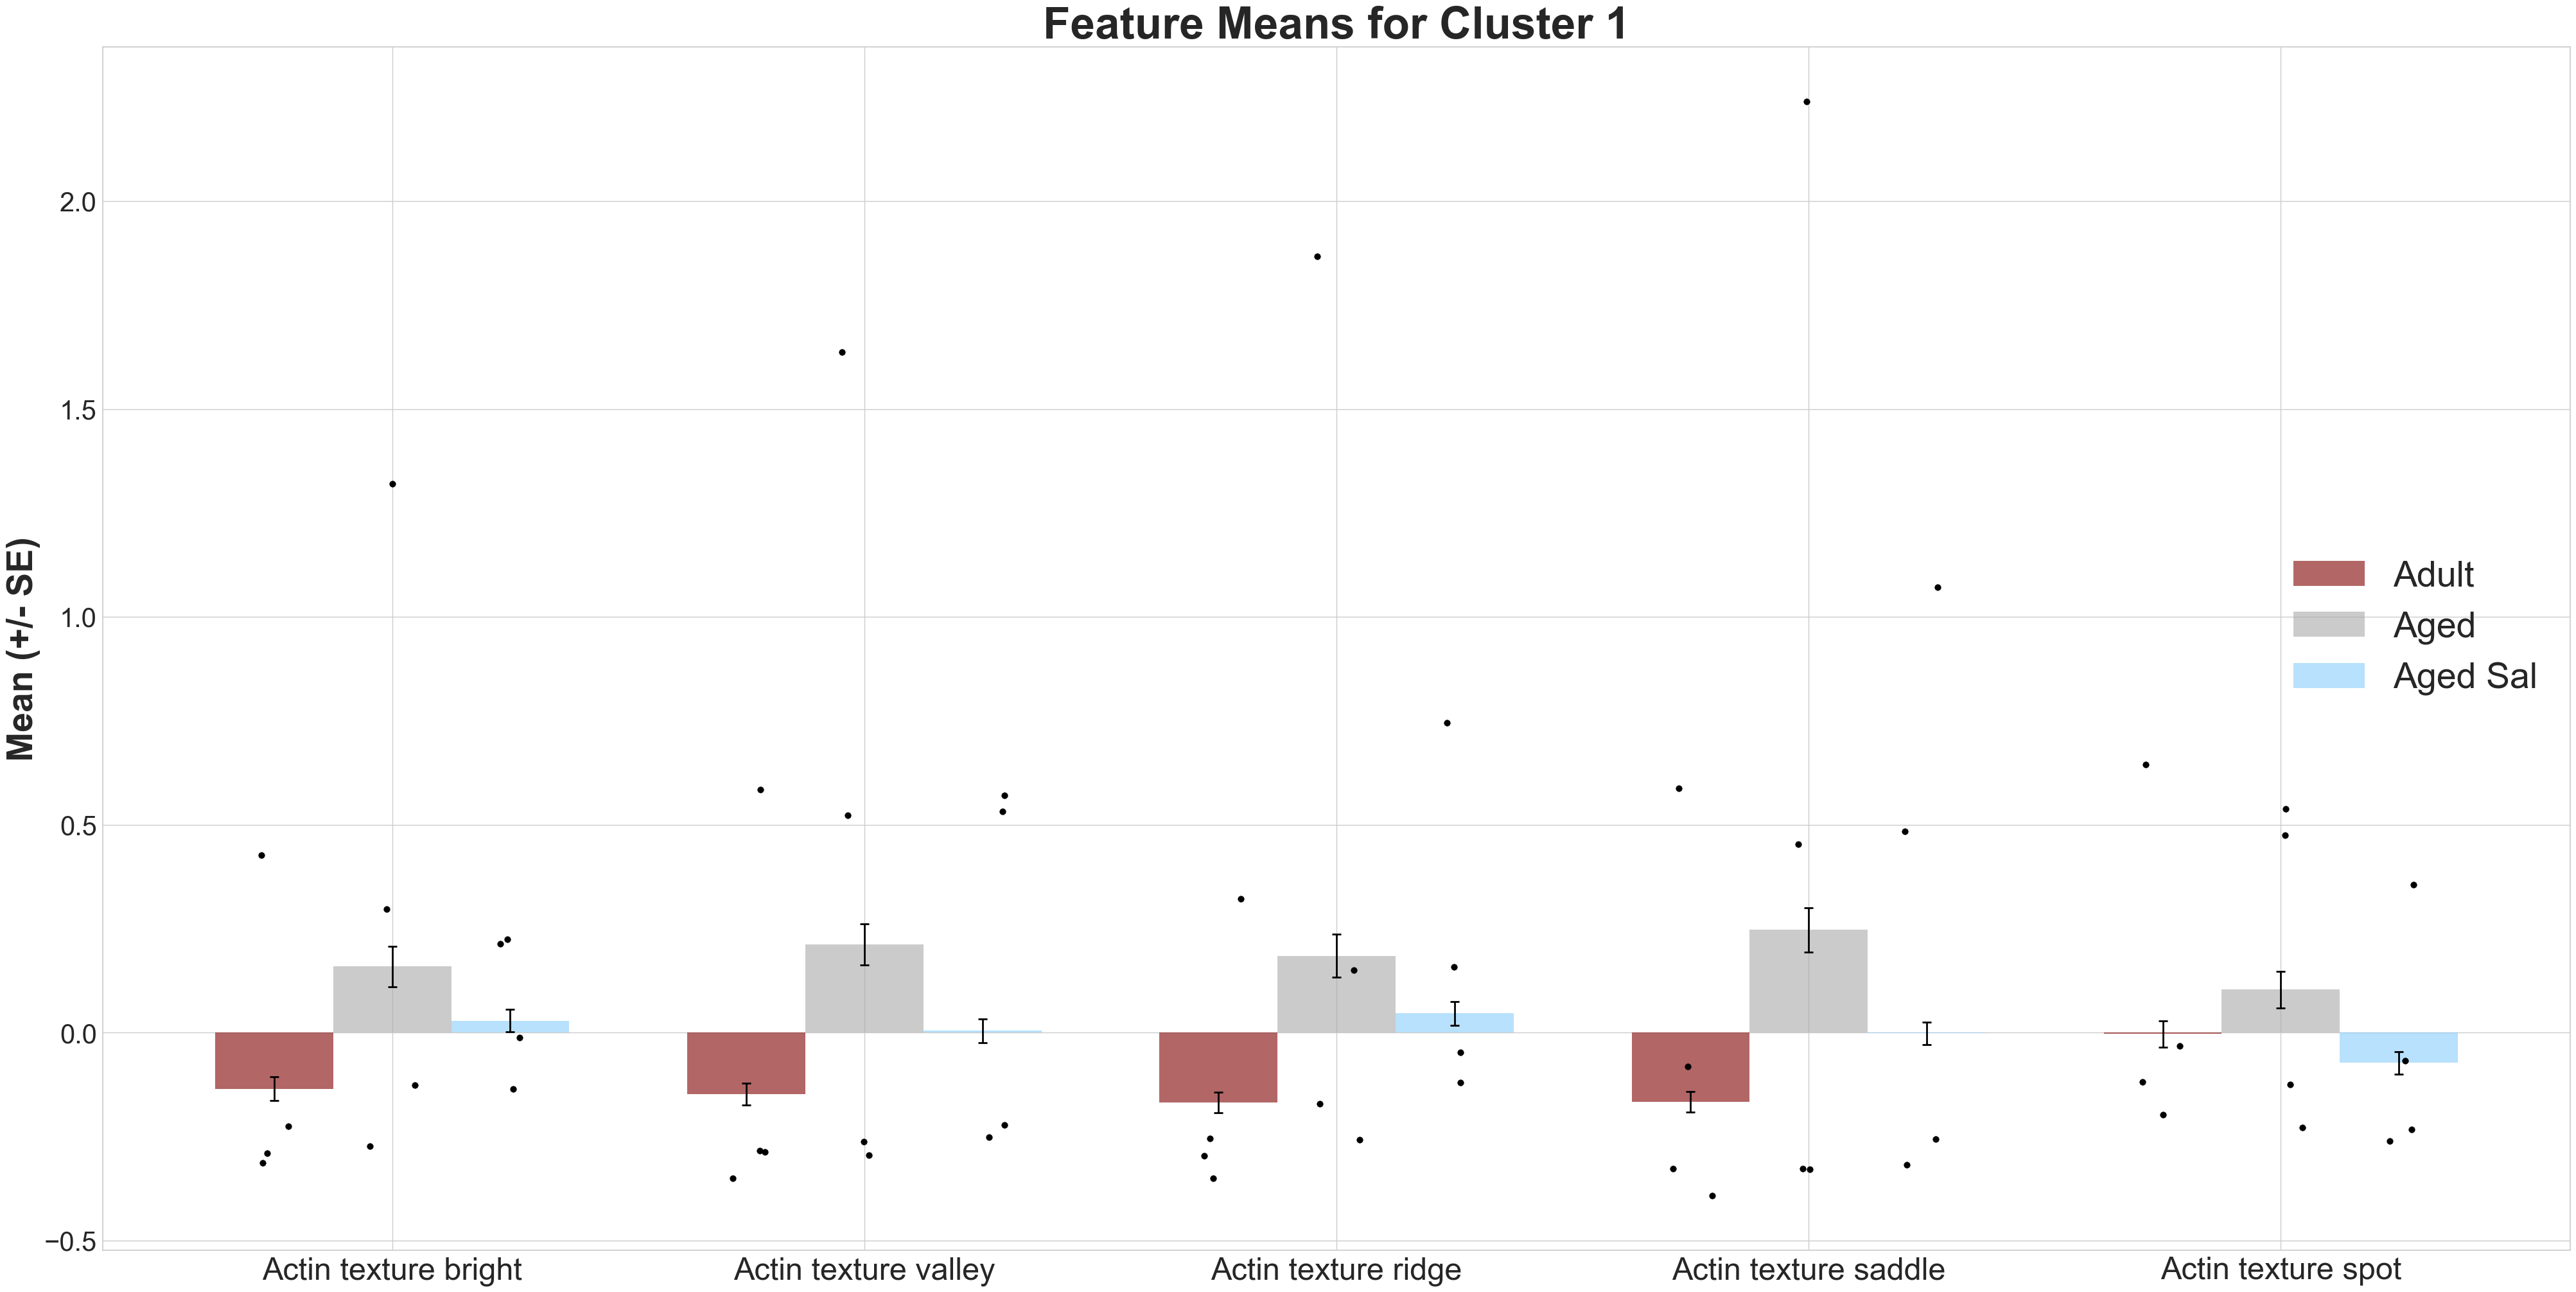

In [317]:
viz_cluster_feat(clust1_data,"Feature Means for Cluster 1","clust1.png")

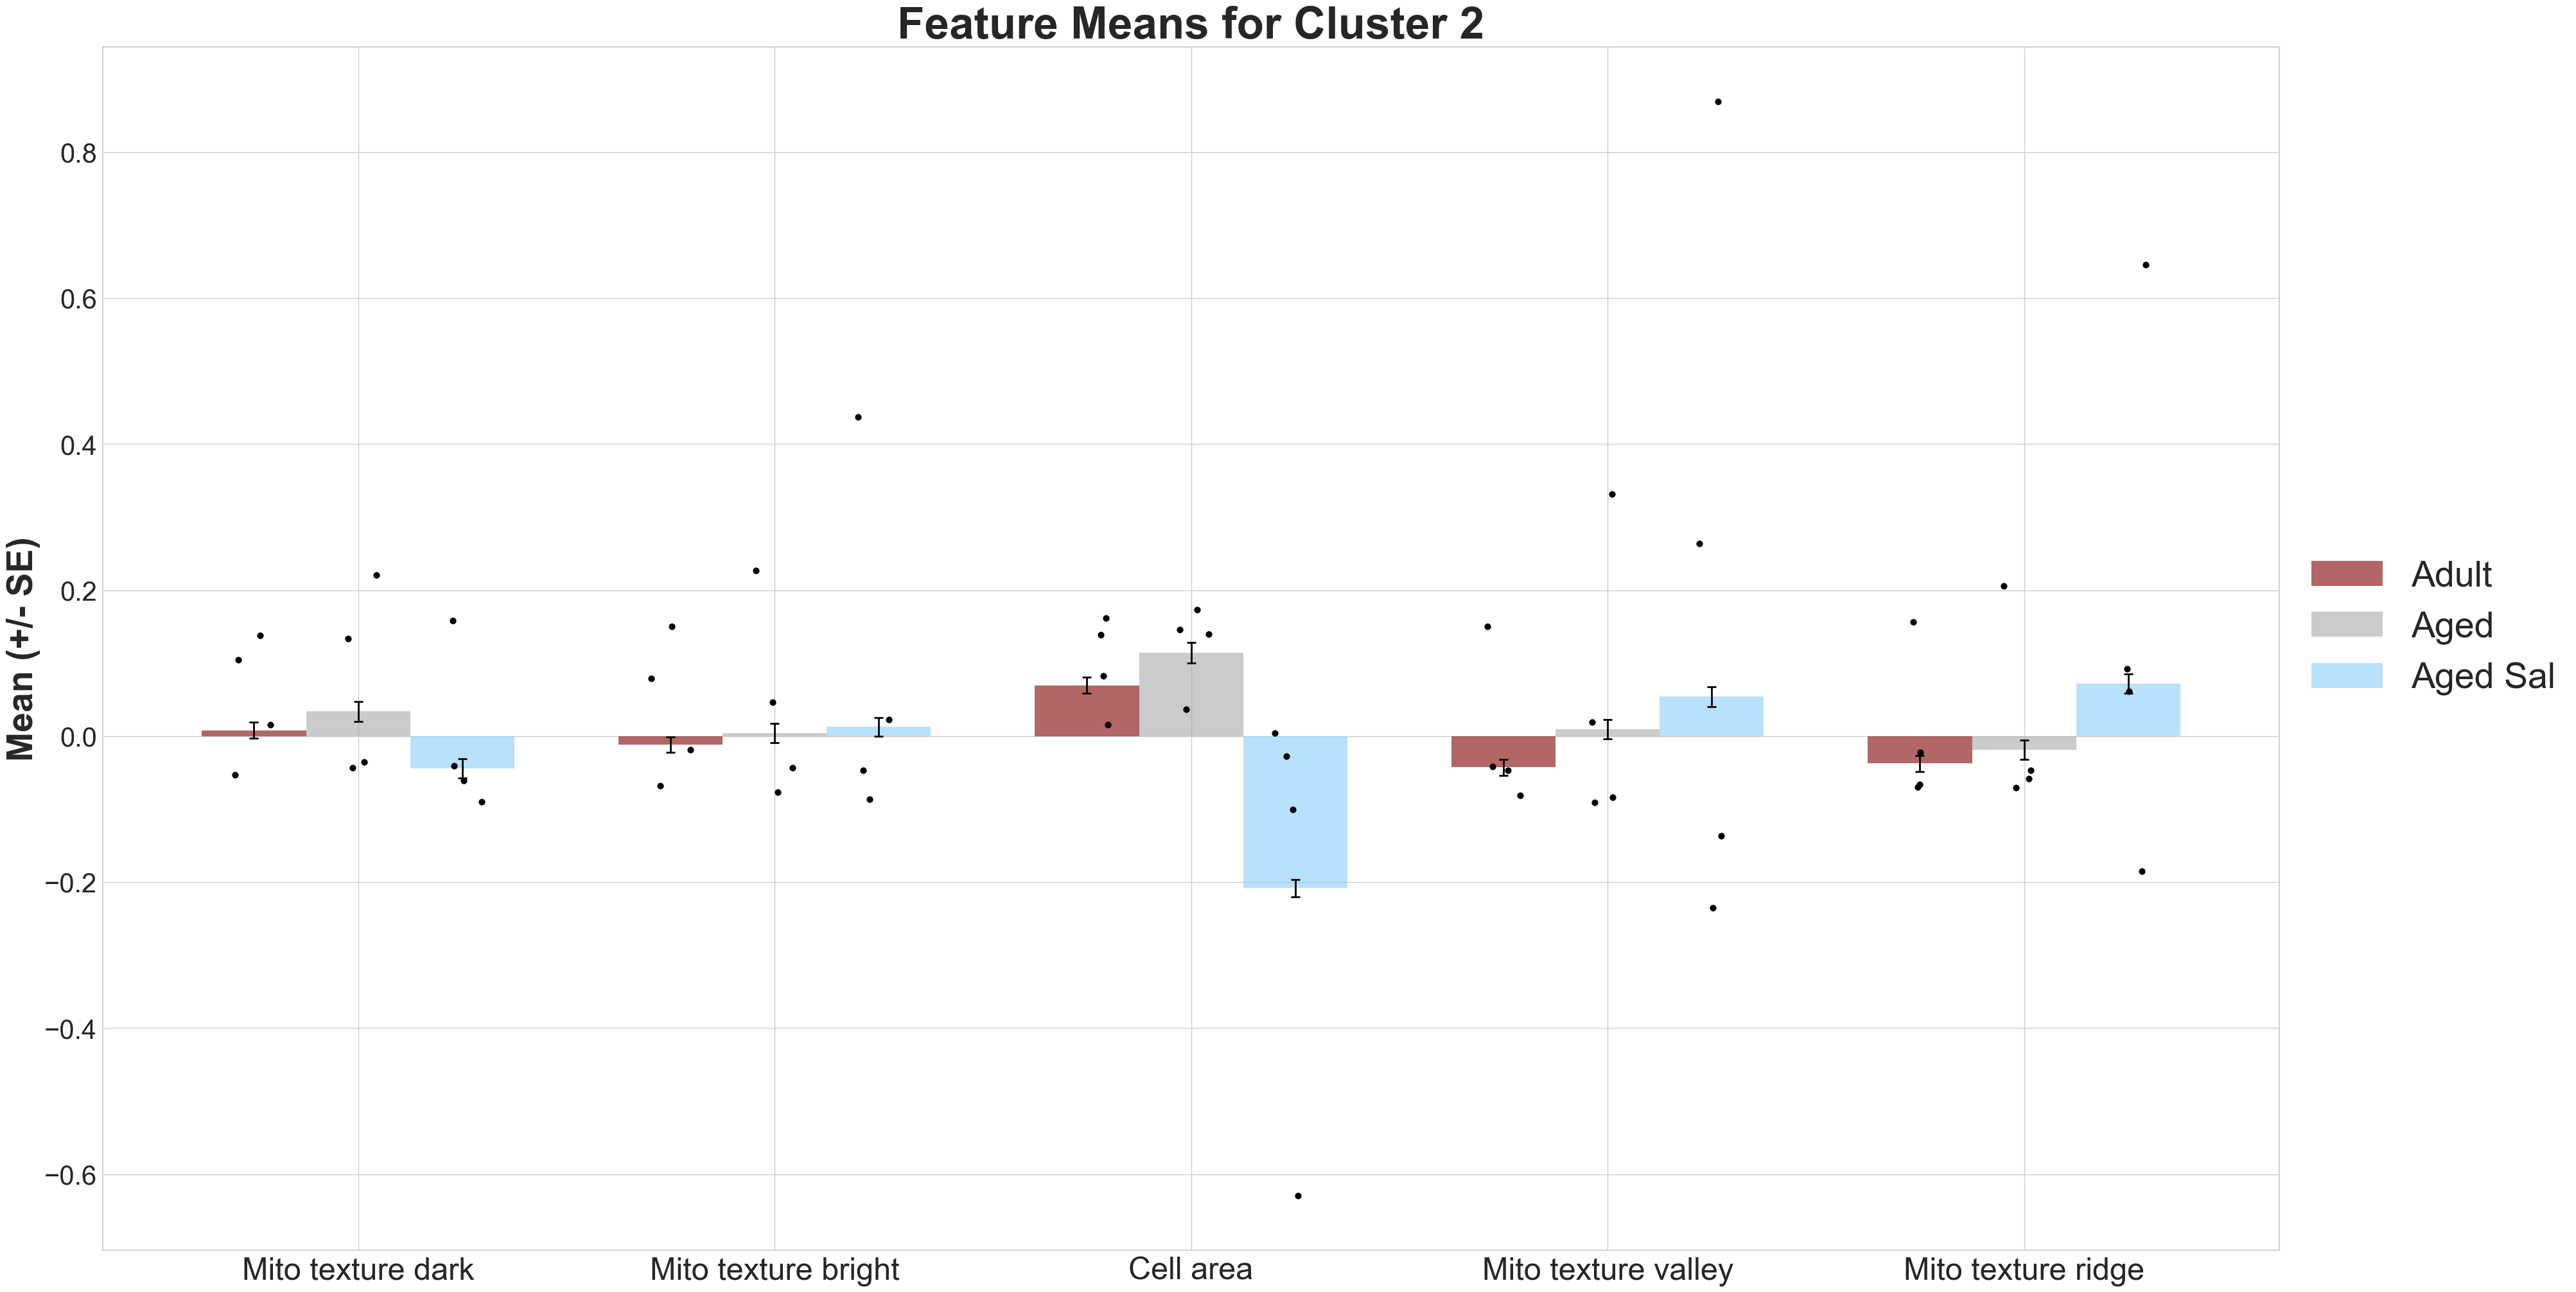

In [318]:
viz_cluster_feat(clust2_data,"Feature Means for Cluster 2","clust2.png")

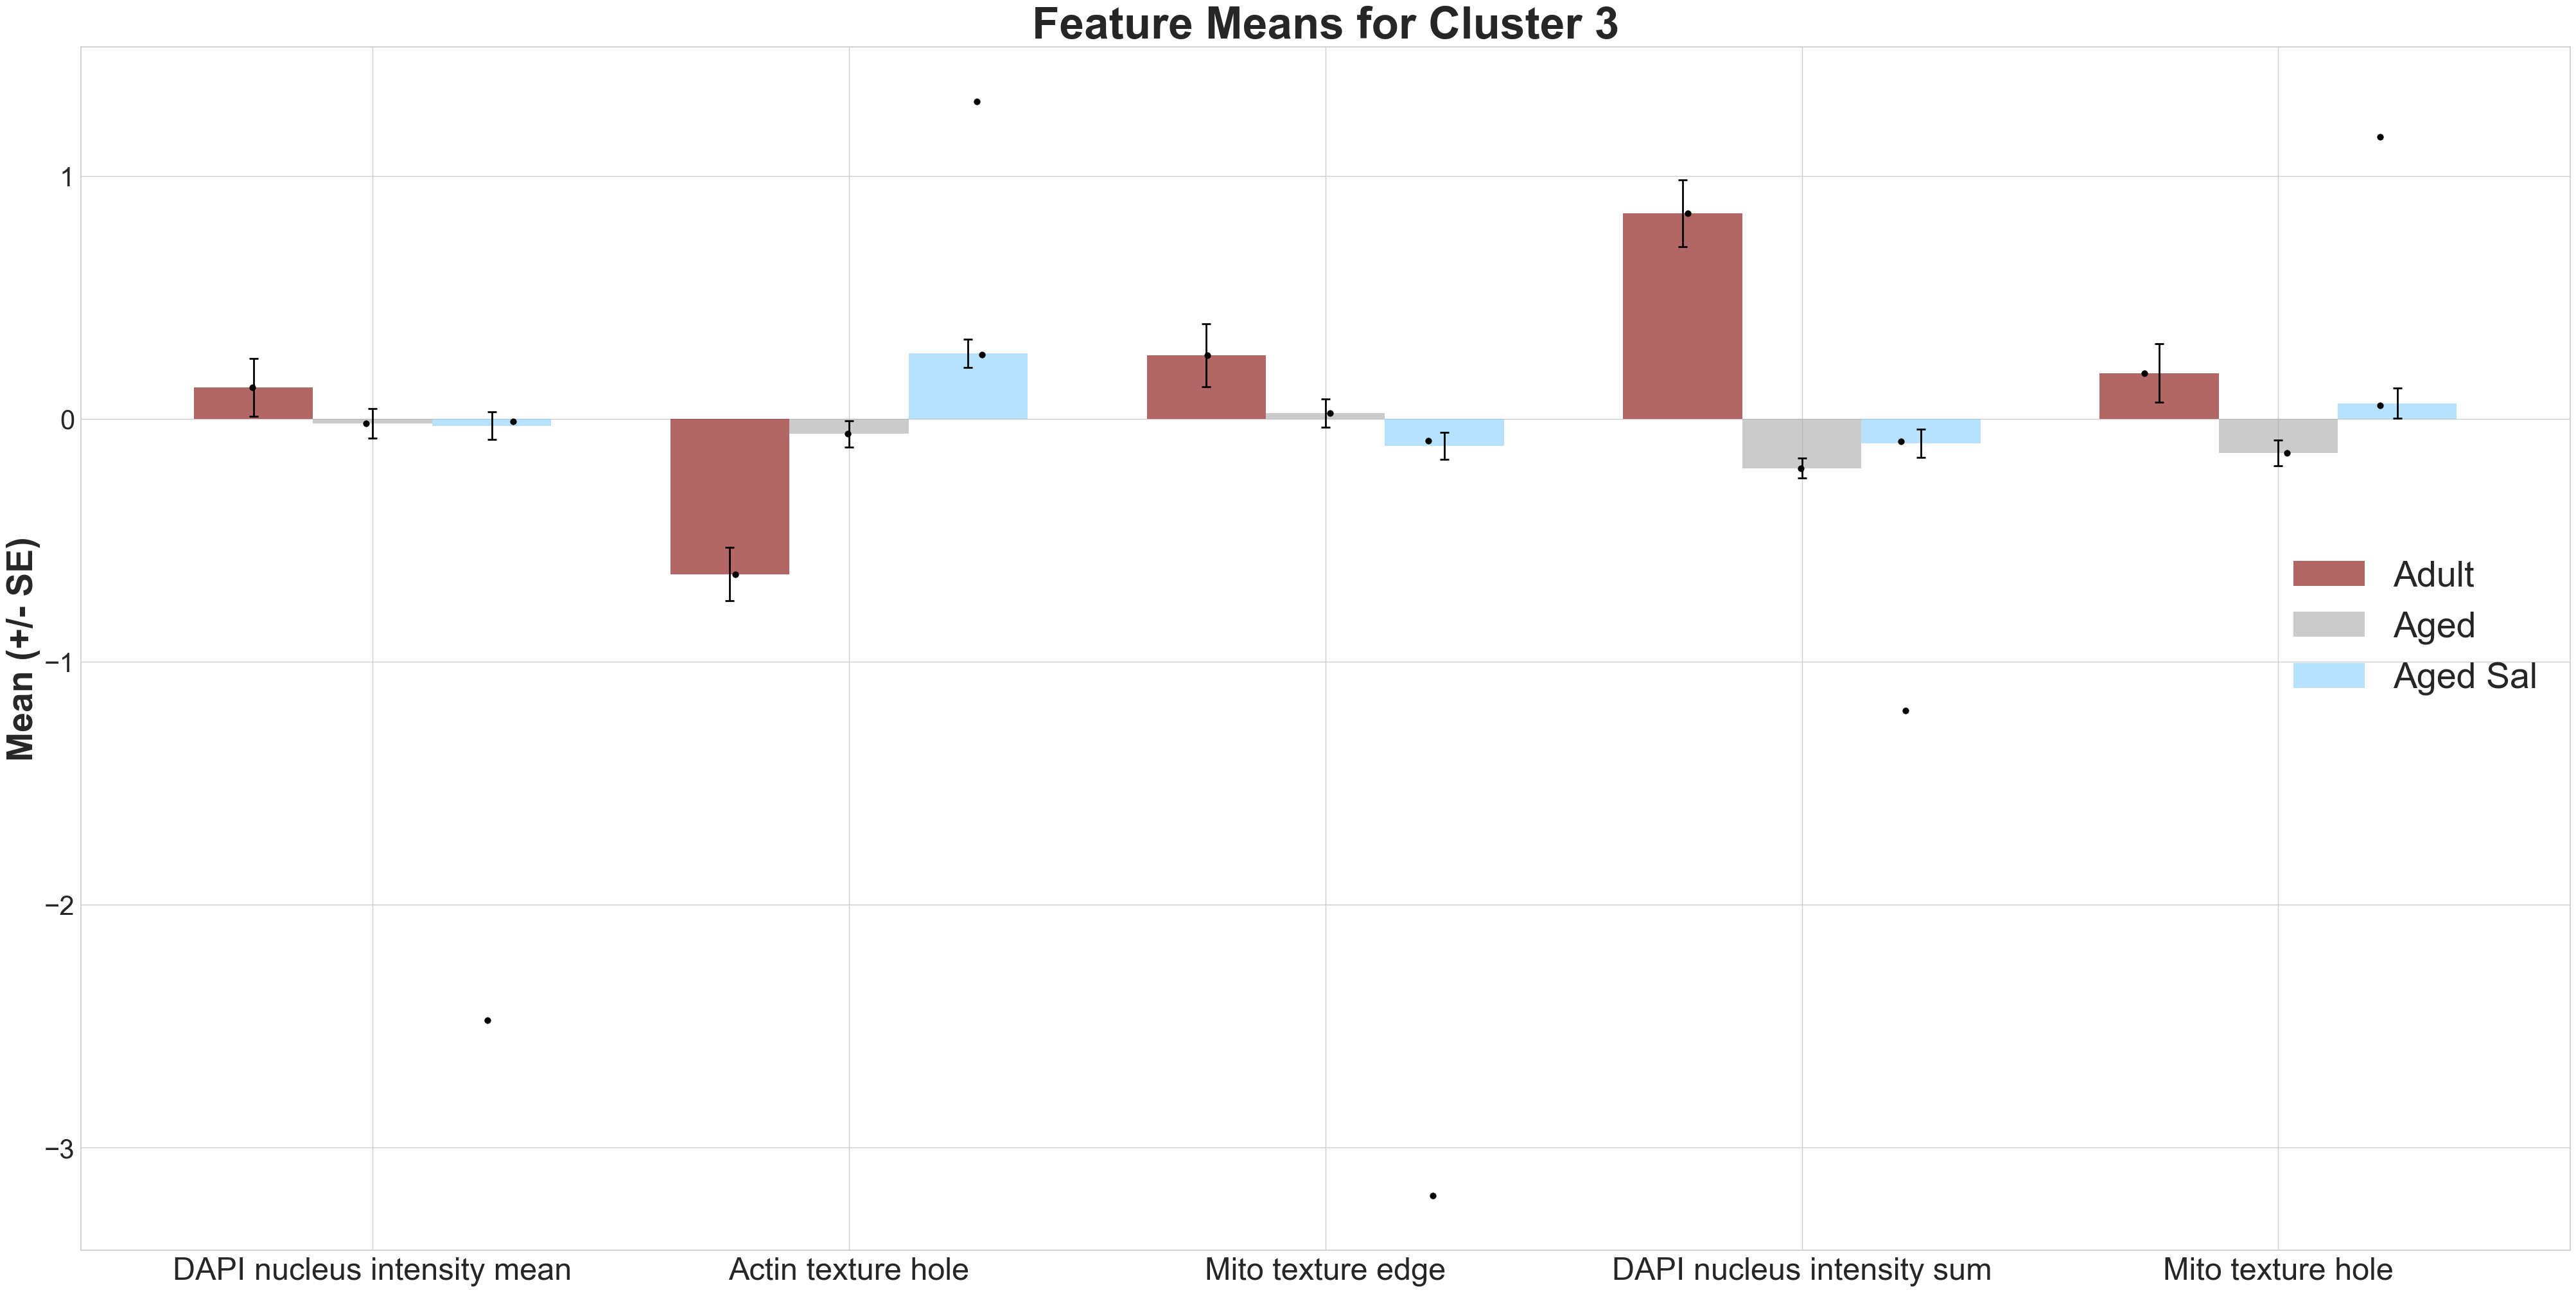

In [319]:
viz_cluster_feat(clust3_data,"Feature Means for Cluster 3","clust3.png")

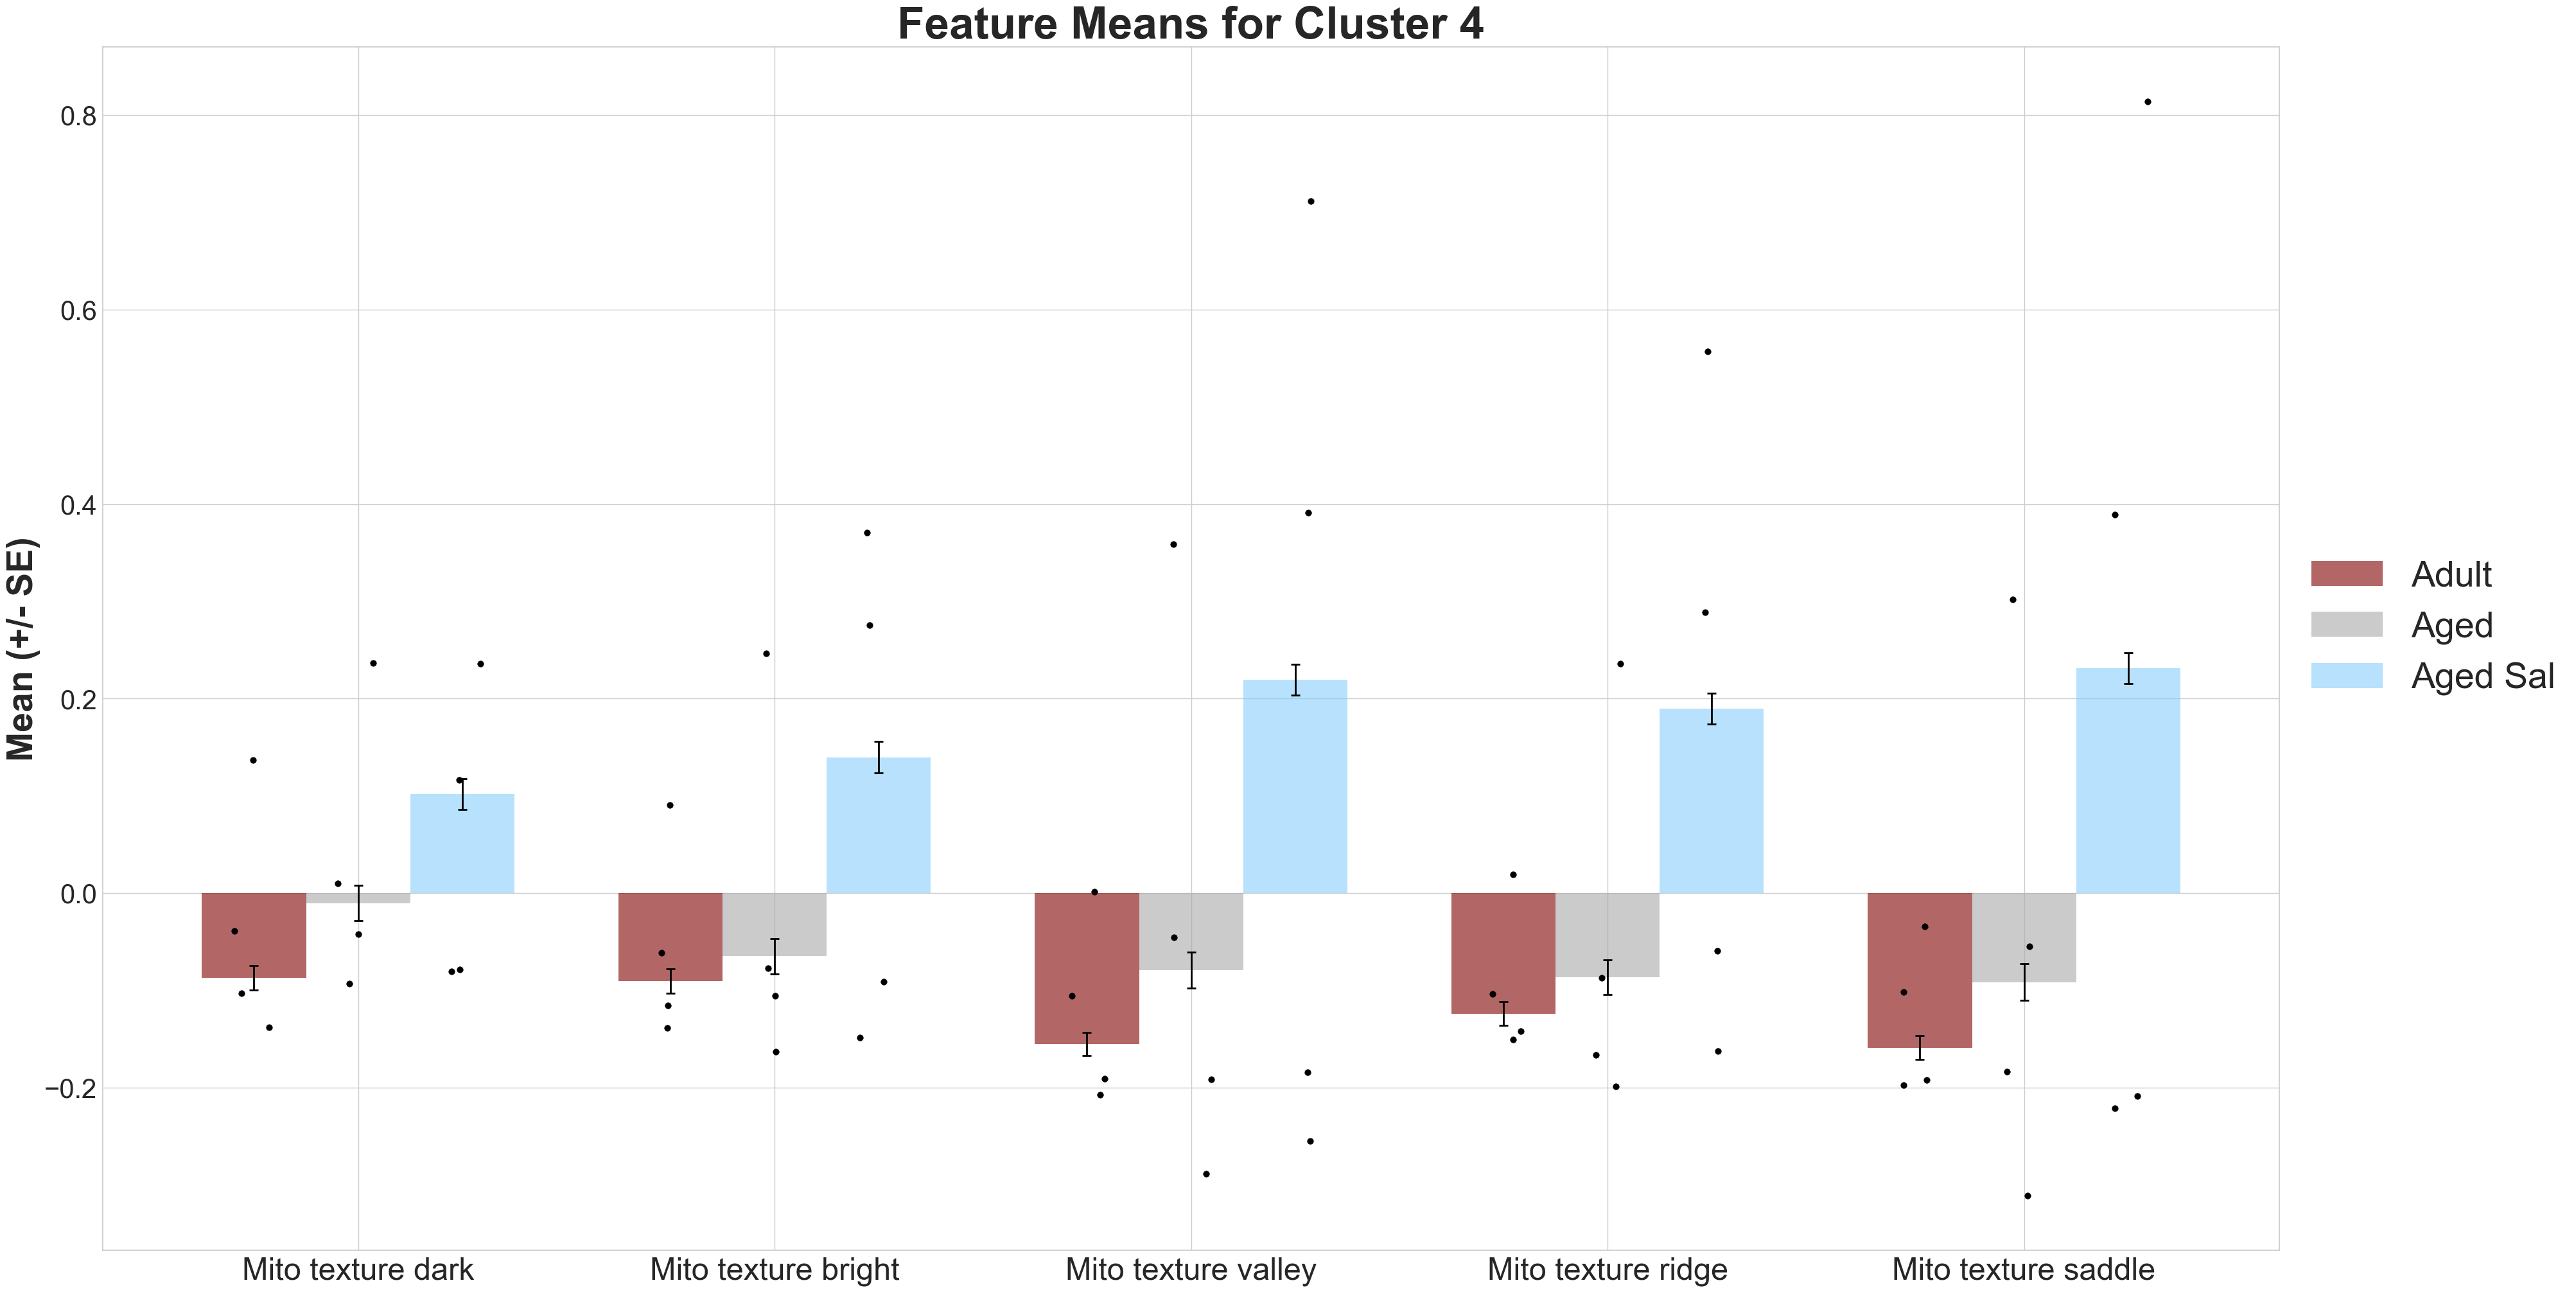

In [320]:
viz_cluster_feat(clust4_data,"Feature Means for Cluster 4","clust4.png")

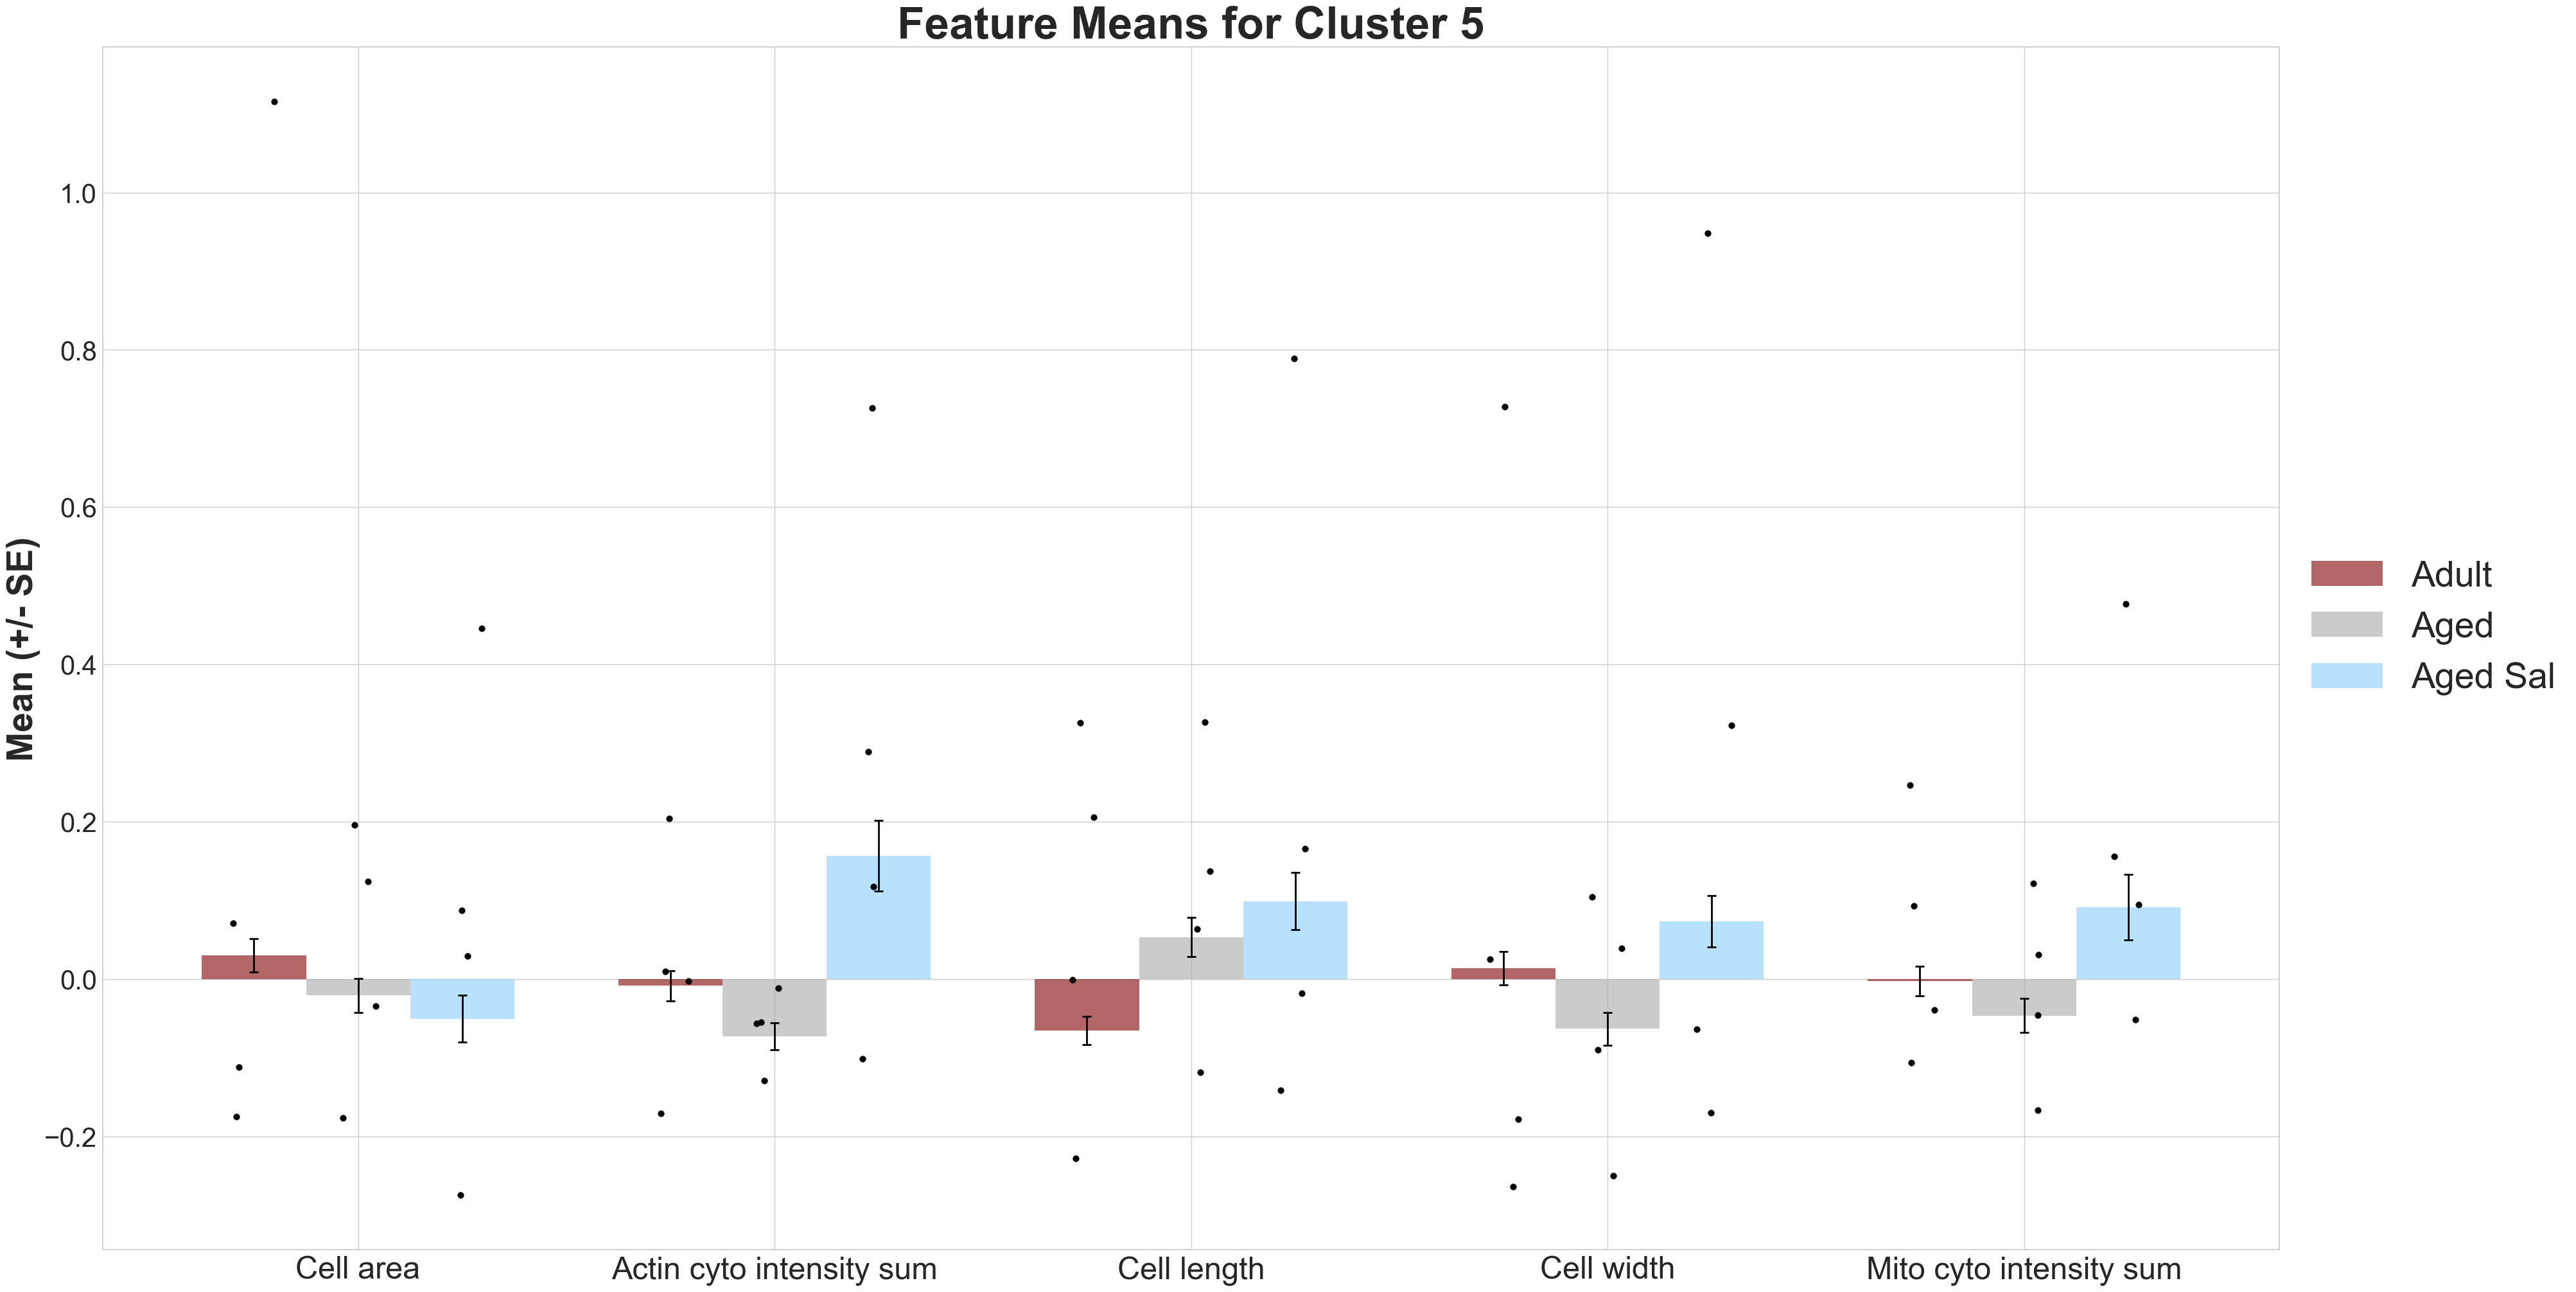

In [321]:
viz_cluster_feat(clust5_data,"Feature Means for Cluster 5","clust5.png")

# IGNORE

In [23]:
# """
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px': 'Nucleoli texture spot',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px': 'Nucleoli texture hole',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px': 'Nucleoli texture edge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px': 'Nucleoli texture ridge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px': 'Nucleoli texture valley',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px': 'Nucleoli texture saddle',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px': 'Nucleoli texture bright',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px': 'Nucleoli texture dark',
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean': ,
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px': 'Actin texture dark',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'ER texture spot',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'ER texture hole',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'ER texture edge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'ER texture ridge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'ER texture valley',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'ER texture saddle',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'ER texture bright',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'ER texture dark'
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'RNA texture spot',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'RNA texture hole',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'RNA texture edge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'RNA texture ridge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'RNA texture valley',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'RNA texture saddle',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'RNA texture bright',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'RNA texture dark',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean': 'ER intensity sum',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum': 'ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA+ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA+ER intensity sum',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA intensity mean',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA intensity sum',
# """